### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
!pip install tensorflow

     |████████████████████████████████| 195.6 MB 94 kB/s s eta 0:00:01
     |████████████████████████████████| 2.9 MB 25.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 36.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 13.6 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 20.9 MB/s eta 0:00:01
     |███████████████████████████████

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME', 'STATUS'])
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0   Association              0                      N     5000              1  
1  Co-operative         1-9999                      N   108590              1  
2   Association              0                      N     5000              0  
3         Trust    10000-24999                      N     6692              1  
4         Trust  100000-499999                      N   142590              1

In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df.APPLICATION_TYPE.value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

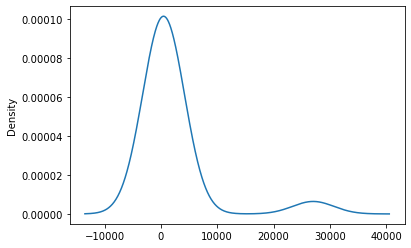

In [8]:
# Visualize the value counts of APPLICATION_TYPE
application_count.plot.density()


In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_count[application_count < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1728        1
C4200        1
C4500        1
C1370        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

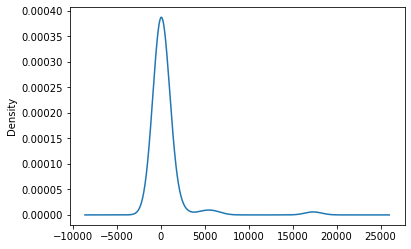

In [11]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                     1.0                   0.0                  0.0   
1                     0.0                   0.0                  1.0   
2                     0.0                   0.0                  0.0   
3                     0.0                   0.0                  1.0   
4                     0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  1.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  AFFILIATION_Family/Parent  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           1.0                        0.0   
3                           1.0                        0.0   
4                           0.0                        0.0   

   AFFILIATION_Independent  AFFILIATION_National  ...  INCOME_AMT_1-9999  \
0                      1.0                   0.0  ...                0.0   
1                      1.0                   0.0  ...                1.0   
2                      0.0                   0.0  ...                0.0   
3                      0.0                   0.0  ...                0.0   
4                      1.0                   0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 36 columns]

In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,
                                     left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T19  \
0     5000              1                     1.0                   0.0   
1   108590              1                     0.0                   0.0   
2     5000              0                     0.0                   0.0   
3     6692              1                     0.0                   0.0   
4   142590              1                     0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  AFFILIATION_CompanySponsored  \
0                  0.0                           0.0   
1                  0.0                           0.0   
2                  0.0                           1.0   
3                  0.0                           1.0   
4                  0.0                           0.0   

   AFFILIATION_Family/Parent  ...  INCOME_AMT_1-9999  INCOME_AMT_10000-24999  \
0                        0.0  ...                0.0                     0.0   
1                        0.0  ...                1.0                     0.0   
2                        0.0  ...                0.0                     0.0   
3                        0.0  ...                0.0                     1.0   
4                        0.0  ...                0.0                     0.0   

   INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  \
0                       0.0                 0.0               0.0   
1                       0.0                 0.0               0.0   
2                       0.0                 0.0               0.0   
3                       0.0                 0.0               0.0   
4                       1.0                 0.0               0.0   

   INCOME_AMT_25000-99999  INCOME_AMT_50M+  INCOME_AMT_5M-10M  \
0                     0.0              0.0                0.0   
1                     0.0              0.0                0.0   
2                     0.0              0.0                0.0   
3                     0.0              0.0                0.0   
4                     0.0              0.0                0.0   

   SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                       1.0                       0.0  
1                       1.0                       0.0  
2                       1.0                       0.0  
3                       1.0                       0.0  
4                       1.0                       0.0  

[5 rows x 38 columns]

In [16]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_node_layer1 = 250
hidden_node_layer2 = 100

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node_layer1,
                            input_dim=number_input_features,
                            activation='sigmoid'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_node_layer2, activation='sigmoid'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='relu'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               9500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 34,701
Trainable params: 34,701
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:

# creating checkpoints

# importing checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# defining the checkpoint path and filename
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# creating callback to save model's weight every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1,
                             save_weights_only=True, save_freq=5)


# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=500,callbacks=[cp_callback])

Epoch 1/500
  1/804 [..............................] - ETA: 5:40 - loss: 10.6047 - accuracy: 0.3125
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 21/804 [..............................] - ETA: 2s - loss: 7.9650 - accuracy: 0.4836   
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 8.2993 - accuracy: 0.4620
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to chec

536/804 [===================>..........] - ETA: 0s - loss: 8.2341 - accuracy: 0.4662
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 8.2238 - accuracy: 0.4668
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 8.2260 - accuracy: 0.4667
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01

252/804 [========>.....................] - ETA: 1s - loss: 8.1983 - accuracy: 0.4685
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 8.1630 - accuracy: 0.4708
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 8.1698 - accuracy: 0.4703
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
314/804 [==========>...................] - ETA: 1s -


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
799/804 [============================>.] - ETA: 0s - loss: 8.2277 - accuracy: 0.4666
Epoch 00002: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 3/500
  1/804 [..............................] - ETA: 1s - loss: 6.7484 - accuracy: 0.5625
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 23/804 [..............................] - ETA: 1s - loss: 8.2783 - accuracy: 0.4633
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00

510/804 [==================>...........] - ETA: 0s - loss: 8.2200 - accuracy: 0.4671
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 8.2263 - accuracy: 0.4667
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 8.2215 - accuracy: 0.4670
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 8.2004 - accuracy: 0.4684
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 8.2128 - accuracy: 0.4676
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 8.1561 - accuracy: 


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
784/804 [============================>.] - ETA: 0s - loss: 8.2369 - accuracy: 0.4660
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 5/500
  1/804 [..............................] - ETA: 1s - loss: 9.1586 - accuracy: 0.4062
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to check

496/804 [=================>............] - ETA: 0s - loss: 8.1556 - accuracy: 0.4713
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 8.1558 - accuracy: 0.4713
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 8.1575 - accuracy: 0.4711
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
555/804 [===================>..........] - ETA: 0s -

219/804 [=======>......................] - ETA: 1s - loss: 8.2429 - accuracy: 0.4656
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 8.2253 - accuracy: 0.4668
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 8.2295 - accuracy: 0.4665
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 8.2246 - accuracy: 0.4668
Epoch 00006: saving model


Epoch 00006: saving model to checkpoints/weights.06.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 8.2188 - accuracy: 0.4672
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 8.2181 - accuracy: 0.4672
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
799/804 [============================>.] - ETA: 0s - loss: 8.2265 - accuracy: 0.4667
Epoch 00006: saving model to checkpoints/weights.06.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 7/500
  1/804 [

467/804 [================>.............] - ETA: 0s - loss: 8.2420 - accuracy: 0.4657
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
492/804 [=================>............] - ETA: 0s - loss: 8.2366 - accuracy: 0.4660
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
507/804 [=================>............] - ETA: 0s - loss: 8.2392 - accuracy: 0.4659
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07

188/804 [======>.......................] - ETA: 1s - loss: 8.2842 - accuracy: 0.4629
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
213/804 [======>.......................] - ETA: 1s - loss: 8.2692 - accuracy: 0.4639
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 8.2655 - accuracy: 0.4641
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
248/804 [========>.....................] - ETA: 1s -


Epoch 00008: saving model to checkpoints/weights.08.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 8.2309 - accuracy: 0.4664
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 8.2298 - accuracy: 0.4665
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 8.2263 - accuracy: 0.4667
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 8.2635 - accuracy: 0.4643
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
478/804 [================>.............] - ETA: 0s - loss: 8.2560 - accuracy: 0.4648
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
499/804 [=================>............] - ETA: 0s - loss: 8.2670 - accuracy: 0.4641
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09

160/804 [====>.........................] - ETA: 1s - loss: 8.2246 - accuracy: 0.4668
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
183/804 [=====>........................] - ETA: 1s - loss: 8.1971 - accuracy: 0.4686
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 8.2015 - accuracy: 0.4683
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10

695/804 [========================>.....] - ETA: 0s - loss: 8.2028 - accuracy: 0.4682
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 8.2206 - accuracy: 0.4671
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
430/804 [===============>..............] - ETA: 0s - loss: 8.2270 - accuracy: 0.4666
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 8.2148 - accuracy: 0.4674
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
475/804 [================>.............] - ETA: 0s - loss: 8.2006 - accuracy: 0.4684
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11

132/804 [===>..........................] - ETA: 1s - loss: 8.1872 - accuracy: 0.4692
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 8.1270 - accuracy: 0.4731
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 8.1786 - accuracy: 0.4698
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12

674/804 [========================>.....] - ETA: 0s - loss: 8.2031 - accuracy: 0.4682
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 8.2103 - accuracy: 0.4677
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 8.2177 - accuracy: 0.4672
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12

390/804 [=============>................] - ETA: 0s - loss: 8.3045 - accuracy: 0.4616
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 8.2933 - accuracy: 0.4623
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
433/804 [===============>..............] - ETA: 0s - loss: 8.2914 - accuracy: 0.4625
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13

114/804 [===>..........................] - ETA: 1s - loss: 8.1649 - accuracy: 0.4707
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 8.1321 - accuracy: 0.4728
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
164/804 [=====>........................] - ETA: 1s - loss: 8.1857 - accuracy: 0.4693
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 8.2634 - accuracy: 0.4643
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 8.2582 - accuracy: 0.4646
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 8.2561 - accuracy: 0.4648
Epoch 00014: saving model to checkpoints/weights.14


Epoch 00015: saving model to checkpoints/weights.15.hdf5
370/804 [============>.................] - ETA: 1s - loss: 8.0564 - accuracy: 0.4777
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
393/804 [=============>................] - ETA: 1s - loss: 8.0853 - accuracy: 0.4758
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
415/804 [==============>...............] - ETA: 0s - loss: 8.1062 - accuracy: 0.4745
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 8.3949 - accuracy: 0.4558
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
126/804 [===>..........................] - ETA: 1s - loss: 8.4279 - accuracy: 0.4536
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 8.2903 - accuracy: 

621/804 [======================>.......] - ETA: 0s - loss: 8.2450 - accuracy: 0.4655
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 8.2419 - accuracy: 0.4657
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 8.2467 - accuracy: 0.4654
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
352/804 [============>.................] - ETA: 1s - loss: 8.2890 - accuracy: 0.4626
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
377/804 [=============>................] - ETA: 1s - loss: 8.2853 - accuracy: 0.4629
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 8.2928 - accuracy: 0.4624
Epoch 00017: saving model to checkpoints/weights.17

 73/804 [=>............................] - ETA: 1s - loss: 8.2870 - accuracy: 0.4628
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 8.3863 - accuracy: 0.4563
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 8.3293 - accuracy: 0.4600
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18

613/804 [=====================>........] - ETA: 0s - loss: 8.2354 - accuracy: 0.4661
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 8.2478 - accuracy: 0.4653
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 8.2438 - accuracy: 0.4656
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18

329/804 [===========>..................] - ETA: 1s - loss: 8.3264 - accuracy: 0.4602
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
354/804 [============>.................] - ETA: 1s - loss: 8.3293 - accuracy: 0.4600
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
375/804 [============>.................] - ETA: 0s - loss: 8.3012 - accuracy: 0.4618
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19


Epoch 00020: saving model to checkpoints/weights.20.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 8.5319 - accuracy: 0.4469
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 75/804 [=>............................] - ETA: 1s - loss: 8.4002 - accuracy: 0.4554
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 8.3102 - accuracy: 0.4613
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 8.2186 - accuracy: 0.4672
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 8.2269 - accuracy: 0.4667
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 8.2316 - accuracy: 0.4663
Epoch 00020: saving model to checkpoints/weights.20


Epoch 00021: saving model to checkpoints/weights.21.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 8.1989 - accuracy: 0.4685
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
351/804 [============>.................] - ETA: 1s - loss: 8.2014 - accuracy: 0.4683
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
376/804 [=============>................] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 8.0714 - accuracy: 0.4767
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 72/804 [=>............................] - ETA: 1s - loss: 8.1008 - accuracy: 0.4748
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 97/804 [==>........

562/804 [===================>..........] - ETA: 0s - loss: 8.2022 - accuracy: 0.4682
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 8.2120 - accuracy: 0.4676
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 8.2153 - accuracy: 0.4674
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22


Epoch 00023: saving model to checkpoints/weights.23.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 8.2091 - accuracy: 0.4678
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 8.2064 - accuracy: 0.4680
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 8.2125 - accuracy: 0.4676
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23

 24/804 [..............................] - ETA: 1s - loss: 8.1744 - accuracy: 0.4701
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 45/804 [>.............................] - ETA: 1s - loss: 8.1409 - accuracy: 0.4722
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 64/804 [=>............................] - ETA: 1s - loss: 8.0514 - accuracy: 0.4780
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 87/804 [==>...........................] - ETA: 1s -

559/804 [===================>..........] - ETA: 0s - loss: 8.2195 - accuracy: 0.4671
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 8.2152 - accuracy: 0.4674
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 8.2186 - accuracy: 0.4672
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 8.1520 - accuracy: 0.4715
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 8.1507 - accuracy: 0.4716
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 8.1485 - accuracy: 0.4717
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25

Epoch 26/500
  1/804 [..............................] - ETA: 0s - loss: 9.1586 - accuracy: 0.4062
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 26/804 [..............................] - ETA: 1s - loss: 8.1203 - accuracy: 0.4736
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 51/804 [>.............................] - ETA: 1s - loss: 8.2040 - accuracy: 0.4681
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoin


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 8.2942 - accuracy: 0.4623
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 8.3086 - accuracy: 0.4614
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 8.3057 - accuracy: 0.4615
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26

242/804 [========>.....................] - ETA: 1s - loss: 8.1507 - accuracy: 0.4716
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 8.1746 - accuracy: 0.4700
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 8.1879 - accuracy: 0.4692
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27

777/804 [===========================>..] - ETA: 0s - loss: 8.2379 - accuracy: 0.4659
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
800/804 [============================>.] - ETA: 0s - loss: 8.2331 - accuracy: 0.4663
Epoch 00027: saving model to checkpoints/weights.27.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 28/500
  1/804 [..............................] - ETA: 0s - loss: 9.1586 - accuracy: 0.4062
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 23/804 [..............................] - ETA: 1s - loss: 8.3831 

498/804 [=================>............] - ETA: 0s - loss: 8.2371 - accuracy: 0.4660
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 8.2415 - accuracy: 0.4657
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 8.2341 - accuracy: 0.4662
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28


Epoch 00029: saving model to checkpoints/weights.29.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 8.1794 - accuracy: 0.4697
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 8.2177 - accuracy: 0.4672
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 8.1752 - accuracy: 0.4700
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 8.2354 - accuracy: 0.4661
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
789/804 [============================>.] - ETA: 0s - loss: 8.2367 - accuracy: 0.4660
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 30/500
  1/804 [..............................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 0


Epoch 00030: saving model to checkpoints/weights.30.hdf5
485/804 [=================>............] - ETA: 0s - loss: 8.2849 - accuracy: 0.4629
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
509/804 [=================>............] - ETA: 0s - loss: 8.2769 - accuracy: 0.4634
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 8.2782 - accuracy: 0.4633
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30

186/804 [=====>........................] - ETA: 1s - loss: 8.2515 - accuracy: 0.4651
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 8.2296 - accuracy: 0.4665
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 8.2427 - accuracy: 0.4656
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 8.2045 - accuracy: 0.4681
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 8.2134 - accuracy: 0.4675
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 8.2205 - accuracy: 0.4671
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31

422/804 [==============>...............] - ETA: 0s - loss: 8.2311 - accuracy: 0.4664
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 8.2152 - accuracy: 0.4674
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
462/804 [================>.............] - ETA: 0s - loss: 8.2279 - accuracy: 0.4666
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
482/804 [================>.............] - ETA: 0s -

128/804 [===>..........................] - ETA: 1s - loss: 8.3112 - accuracy: 0.4612
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 8.3052 - accuracy: 0.4616
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 8.3343 - accuracy: 0.4597
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33

649/804 [=======================>......] - ETA: 0s - loss: 8.2591 - accuracy: 0.4646
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 8.2593 - accuracy: 0.4646
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 8.2656 - accuracy: 0.4641
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
708/804 [=========================>....] - ETA: 0s -


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
389/804 [=============>................] - ETA: 0s - loss: 8.2701 - accuracy: 0.4638
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
414/804 [==============>...............] - ETA: 0s - loss: 8.2457 - accuracy: 0.4654
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
439/804 [===========

 90/804 [==>...........................] - ETA: 1s - loss: 8.2534 - accuracy: 0.4649
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
111/804 [===>..........................] - ETA: 1s - loss: 8.2900 - accuracy: 0.4626
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
130/804 [===>..........................] - ETA: 1s - loss: 8.2798 - accuracy: 0.4632
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
153/804 [====>.........................] - ETA: 1s -

610/804 [=====================>........] - ETA: 0s - loss: 8.2348 - accuracy: 0.4661
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 8.2477 - accuracy: 0.4653
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 8.2401 - accuracy: 0.4658
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35

324/804 [===========>..................] - ETA: 1s - loss: 8.2243 - accuracy: 0.4668
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 8.1959 - accuracy: 0.4687
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
356/804 [============>.................] - ETA: 1s - loss: 8.2175 - accuracy: 0.4673
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
376/804 [=============>................] - ETA: 1s - loss: 8.2073 - accuracy: 0.4679
Epoch 00036: saving model


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 42/804 [>.............................] - ETA: 1s - loss: 7.7813 - accuracy: 0.4955
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 62/804 [=>............................] - ETA: 1s - loss: 8.0312 - accuracy: 0.4793
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 8.0358 - accuracy: 0.4790
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37

550/804 [===================>..........] - ETA: 0s - loss: 8.2094 - accuracy: 0.4678
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 8.1962 - accuracy: 0.4686
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 8.1848 - accuracy: 0.4694
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 8.2457 - accuracy: 0.4654
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 8.2340 - accuracy: 0.4662
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 8.2546 - accuracy: 0.4649
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38


Epoch 00038: saving model to checkpoints/weights.38.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 39/500
  1/804 [..............................] - ETA: 0s - loss: 7.2304 - accuracy: 0.5312
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 24/804 [..............................] - ETA: 1s - loss: 8.1543 - accuracy: 0.4714
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 8.1022 - accuracy: 0.4747
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 0


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 8.1881 - accuracy: 0.4692
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 8.1803 - accuracy: 0.4697
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 8.1852 - accuracy: 0.4694
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 8.2197 - accuracy: 0.4671
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 8.2141 - accuracy: 0.4675
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 8.2028 - accuracy: 0.4682
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40

760/804 [===========================>..] - ETA: 0s - loss: 8.2250 - accuracy: 0.4668
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
783/804 [============================>.] - ETA: 0s - loss: 8.2179 - accuracy: 0.4672
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 41/500
  1/804 [..............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 0


Epoch 00041: saving model to checkpoints/weights.41.hdf5
486/804 [=================>............] - ETA: 0s - loss: 8.2272 - accuracy: 0.4666
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
506/804 [=================>............] - ETA: 0s - loss: 8.2355 - accuracy: 0.4661
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 8.2305 - accuracy: 0.4664
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 8.2326 - accuracy: 0.4663
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 8.2589 - accuracy: 0.4646
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 8.2797 - accuracy: 0.4632
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 8.3077 - accuracy: 0.4614
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42

717/804 [=========================>....] - ETA: 0s - loss: 8.2322 - accuracy: 0.4663
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 8.2320 - accuracy: 0.4663
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 8.2407 - accuracy: 0.4658
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 8.2345 - accuracy: 0.4662
Epoch 00042: saving model

423/804 [==============>...............] - ETA: 1s - loss: 8.1877 - accuracy: 0.4692
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 8.1736 - accuracy: 0.4701
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
458/804 [================>.............] - ETA: 1s - loss: 8.1756 - accuracy: 0.4700
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
478/804 [================>.............] - ETA: 0s - loss: 8.1592 - accuracy: 0.4710
Epoch 00043: saving model


Epoch 00044: saving model to checkpoints/weights.44.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 8.2367 - accuracy: 0.4660
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 8.2544 - accuracy: 0.4649
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 8.2804 - accuracy: 0.4632
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 8.2241 - accuracy: 0.4668
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 8.2344 - accuracy: 0.4662
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 8.2278 - accuracy: 0.4666
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44

365/804 [============>.................] - ETA: 1s - loss: 8.2434 - accuracy: 0.4656
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
386/804 [=============>................] - ETA: 1s - loss: 8.2245 - accuracy: 0.4668
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 8.2264 - accuracy: 0.4667
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
428/804 [==============>...............] - ETA: 0s -


Epoch 00046: saving model to checkpoints/weights.46.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 8.2452 - accuracy: 0.4655
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 96/804 [==>...........................] - ETA: 1s - loss: 8.2849 - accuracy: 0.4629
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 8.3783 - accuracy: 0.4568
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 8.2685 - accuracy: 0.4640
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 8.2520 - accuracy: 0.4650
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 8.2478 - accuracy: 0.4653
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 8.2843 - accuracy: 0.4629
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 8.2932 - accuracy: 0.4624
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
364/804 [============>.................] - ETA: 1s - loss: 8.2938 - accuracy: 0.4623
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47

 19/804 [..............................] - ETA: 2s - loss: 8.8541 - accuracy: 0.4260
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 43/804 [>.............................] - ETA: 1s - loss: 8.5196 - accuracy: 0.4477
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 68/804 [=>............................] - ETA: 1s - loss: 8.3717 - accuracy: 0.4573
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48

543/804 [===================>..........] - ETA: 0s - loss: 8.2602 - accuracy: 0.4645
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 8.2604 - accuracy: 0.4645
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 8.2507 - accuracy: 0.4651
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
606/804 [=====================>........] - ETA: 0s -

259/804 [========>.....................] - ETA: 1s - loss: 8.2764 - accuracy: 0.4634
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 8.2567 - accuracy: 0.4647
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 8.2251 - accuracy: 0.4668
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
319/804 [==========>...................] - ETA: 1s -


Epoch 00049: saving model to checkpoints/weights.49.hdf5
798/804 [============================>.] - ETA: 0s - loss: 8.2253 - accuracy: 0.4668
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 50/500
  1/804 [..............................] - ETA: 1s - loss: 6.2664 - accuracy: 0.5938
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 25/804 [..............................] - ETA: 1s - loss: 8.0210 - accuracy: 0.4800
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 0

504/804 [=================>............] - ETA: 0s - loss: 8.1754 - accuracy: 0.4700
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 8.1908 - accuracy: 0.4690
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 8.1892 - accuracy: 0.4691
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 8.1164 - accuracy: 0.4738
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 8.1563 - accuracy: 0.4712
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 8.1497 - accuracy: 0.4717
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 8.2404 - accuracy: 0.4658
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 8.2281 - accuracy: 0.4666
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
785/804 [============================>.] - ETA: 0s - loss: 8.2344 - accuracy: 0.4662
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51

438/804 [===============>..............] - ETA: 0s - loss: 8.2253 - accuracy: 0.4668
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
460/804 [================>.............] - ETA: 0s - loss: 8.2553 - accuracy: 0.4648
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
477/804 [================>.............] - ETA: 0s - loss: 8.2501 - accuracy: 0.4651
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
497/804 [=================>............] - ETA: 0s -

162/804 [=====>........................] - ETA: 1s - loss: 8.0963 - accuracy: 0.4751
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
183/804 [=====>........................] - ETA: 1s - loss: 8.0602 - accuracy: 0.4775
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 8.0915 - accuracy: 0.4754
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 8.2077 - accuracy: 0.4679
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 8.2129 - accuracy: 0.4676
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53

399/804 [=============>................] - ETA: 0s - loss: 8.2754 - accuracy: 0.4635
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
419/804 [==============>...............] - ETA: 0s - loss: 8.2612 - accuracy: 0.4644
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
434/804 [===============>..............] - ETA: 0s - loss: 8.2745 - accuracy: 0.4636
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
456/804 [================>.............] - ETA: 0s - loss: 8.2516 - accuracy: 0.4650
Epoch 00054: saving model

118/804 [===>..........................] - ETA: 1s - loss: 8.2231 - accuracy: 0.4669
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 8.2324 - accuracy: 0.4663
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 8.2968 - accuracy: 0.4621
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55

640/804 [======================>.......] - ETA: 0s - loss: 8.2231 - accuracy: 0.4669
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 8.2237 - accuracy: 0.4669
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 8.2242 - accuracy: 0.4668
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55

356/804 [============>.................] - ETA: 1s - loss: 8.3204 - accuracy: 0.4606
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
376/804 [=============>................] - ETA: 1s - loss: 8.2676 - accuracy: 0.4640
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
395/804 [=============>................] - ETA: 1s - loss: 8.2970 - accuracy: 0.4621
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 8.2942 - accuracy: 0.4623
Epoch 00056: saving model


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 8.0240 - accuracy: 0.4798
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
106/804 [==>...........................] - ETA: 1s - loss: 8.0581 - accuracy: 0.4776
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
127/804 [===>..........................] - ETA: 1s - loss: 8.0237 - accuracy: 


Epoch 00057: saving model to checkpoints/weights.57.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 8.1977 - accuracy: 0.4685
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 8.2170 - accuracy: 0.4673
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 8.2005 - accuracy: 0.4684
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57

308/804 [==========>...................] - ETA: 1s - loss: 8.3134 - accuracy: 0.4610
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 8.2756 - accuracy: 0.4635
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
353/804 [============>.................] - ETA: 1s - loss: 8.2600 - accuracy: 0.4645
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
363/804 [============>.................] - ETA: 1s - loss: 8.2675 - accuracy: 0.4640
Epoch 00058: saving model


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 45/804 [>.............................] - ETA: 1s - loss: 8.3445 - accuracy: 0.4590
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 69/804 [=>............................] - ETA: 1s - loss: 8.3342 - accuracy: 0.4597
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 94/804 [==>........

564/804 [====================>.........] - ETA: 0s - loss: 8.2287 - accuracy: 0.4665
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 8.2357 - accuracy: 0.4661
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 8.2232 - accuracy: 0.4669
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59

280/804 [=========>....................] - ETA: 1s - loss: 8.1911 - accuracy: 0.4690
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 8.1913 - accuracy: 0.4690
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 8.2083 - accuracy: 0.4679
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 8.1801 - accuracy: 0.4697
Epoch 00060: saving model


Epoch 00060: saving model to checkpoints/weights.60.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 61/500
  1/804 [..............................] - ETA: 0s - loss: 9.1586 - accuracy: 0.4062
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 24/804 [..............................] - ETA: 1s - loss: 8.2748 - accuracy: 0.4635
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 46/804 [>.............................] - ETA: 1s - loss: 8.1421 - accuracy: 0.4721
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 0

524/804 [==================>...........] - ETA: 0s - loss: 8.1715 - accuracy: 0.4702
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 8.1813 - accuracy: 0.4696
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 8.1724 - accuracy: 0.4702
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61

245/804 [========>.....................] - ETA: 1s - loss: 8.2575 - accuracy: 0.4647
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 8.2794 - accuracy: 0.4632
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 8.2575 - accuracy: 0.4647
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62

773/804 [===========================>..] - ETA: 0s - loss: 8.2326 - accuracy: 0.4663
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
792/804 [============================>.] - ETA: 0s - loss: 8.2268 - accuracy: 0.4667
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 63/500
  1/804 [..............................] - ETA: 0s - loss: 5.3023 - accuracy: 0.6562
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 23/804 

478/804 [================>.............] - ETA: 0s - loss: 8.2601 - accuracy: 0.4645
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
498/804 [=================>............] - ETA: 0s - loss: 8.2661 - accuracy: 0.4641
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 8.2541 - accuracy: 0.4649
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
538/804 [===================>..........] - ETA: 0s -


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 8.2216 - accuracy: 0.4670
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 8.2434 - accuracy: 0.4656
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 8.2775 - accuracy: 0.4634
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64


Epoch 00064: saving model to checkpoints/weights.64.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 8.2142 - accuracy: 0.4675
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 8.2274 - accuracy: 0.4666
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 8.2235 - accuracy: 0.4669
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
765/804 [===========================>..] - ETA: 0s -


Epoch 00065: saving model to checkpoints/weights.65.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 8.2180 - accuracy: 0.4672
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 8.2326 - accuracy: 0.4663
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 8.2149 - accuracy: 0.4674
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 8.3379 - accuracy: 0.4595
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 8.3552 - accuracy: 0.4583
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 8.3741 - accuracy: 0.4571
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66


Epoch 00066: saving model to checkpoints/weights.66.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 8.2648 - accuracy: 0.4642
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 8.2663 - accuracy: 0.4641
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 8.2522 - accuracy: 0.4650
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
686/804 [========================>.....] - ETA: 0s -


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 8.2373 - accuracy: 0.4660
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
359/804 [============>.................] - ETA: 1s - loss: 8.2536 - accuracy: 0.4649
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
378/804 [=============>................] - ETA: 1s - loss: 8.2583 - accuracy: 0.4646
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67


Epoch 00068: saving model to checkpoints/weights.68.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 8.1653 - accuracy: 0.4706
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 8.0490 - accuracy: 0.4782
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 8.1163 - accuracy: 0.4738
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68

535/804 [==================>...........] - ETA: 0s - loss: 8.2332 - accuracy: 0.4662
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 8.2416 - accuracy: 0.4657
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 8.2483 - accuracy: 0.4653
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
593/804 [=====================>........] - ETA: 0s -


Epoch 00069: saving model to checkpoints/weights.69.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 8.2248 - accuracy: 0.4668
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 8.2390 - accuracy: 0.4659
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 8.1910 - accuracy: 0.4690
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 8.2216 - accuracy: 0.4670
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
785/804 [============================>.] - ETA: 0s - loss: 8.2172 - accuracy: 0.4673
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 70/500
  1/804 [..............................] - ETA: 1s - loss: 7.7125 - accuracy: 0.5000
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 0

470/804 [================>.............] - ETA: 0s - loss: 8.2489 - accuracy: 0.4652
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
490/804 [=================>............] - ETA: 0s - loss: 8.2437 - accuracy: 0.4656
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 8.2351 - accuracy: 0.4661
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
530/804 [==================>...........] - ETA: 0s -

171/804 [=====>........................] - ETA: 1s - loss: 8.1297 - accuracy: 0.4730
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 8.1453 - accuracy: 0.4719
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 8.1454 - accuracy: 0.4719
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 8.1816 - accuracy: 0.4696
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model

687/804 [========================>.....] - ETA: 0s - loss: 8.2457 - accuracy: 0.4654
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 8.2393 - accuracy: 0.4658
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 8.2302 - accuracy: 0.4664
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71

392/804 [=============>................] - ETA: 1s - loss: 8.2572 - accuracy: 0.4647
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 8.2448 - accuracy: 0.4655
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 8.2385 - accuracy: 0.4659
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
447/804 [===============>..............] - ETA: 0s - loss: 8.2322 - accuracy: 0.4663
Epoch 00072: saving model

 93/804 [==>...........................] - ETA: 1s - loss: 8.0753 - accuracy: 0.4765
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
113/804 [===>..........................] - ETA: 1s - loss: 8.0452 - accuracy: 0.4784
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 8.0278 - accuracy: 0.4796
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
154/804 [====>.........................] - ETA: 1s -

613/804 [=====================>........] - ETA: 0s - loss: 8.1969 - accuracy: 0.4686
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 8.2067 - accuracy: 0.4680
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 8.2042 - accuracy: 0.4681
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 8.2147 - accuracy: 0.4674
Epoch 00073: saving model

317/804 [==========>...................] - ETA: 1s - loss: 8.2599 - accuracy: 0.4645
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 8.2238 - accuracy: 0.4669
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
349/804 [============>.................] - ETA: 1s - loss: 8.2028 - accuracy: 0.4682
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
367/804 [============>.................] - ETA: 1s - loss: 8.1998 - accuracy: 0.4684
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model

 21/804 [..............................] - ETA: 1s - loss: 8.5388 - accuracy: 0.4464
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 45/804 [>.............................] - ETA: 1s - loss: 8.3445 - accuracy: 0.4590
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 70/804 [=>............................] - ETA: 1s - loss: 8.2220 - accuracy: 0.4670
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75


Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 8.2366 - accuracy: 0.4660
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 8.2362 - accuracy: 0.4660
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 8.2518 - accuracy: 0.4650
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
600/804 [=====================>........] - ETA: 0s -

251/804 [========>.....................] - ETA: 1s - loss: 8.1964 - accuracy: 0.4686
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 8.1816 - accuracy: 0.4696
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 8.1858 - accuracy: 0.4693
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 8.1929 - accuracy: 0.4689
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
307/804 [==========>......

771/804 [===========================>..] - ETA: 0s - loss: 8.2289 - accuracy: 0.4665
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
793/804 [============================>.] - ETA: 0s - loss: 8.2279 - accuracy: 0.4666
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 77/500
  1/804 [..............................] - ETA: 0s - loss: 5.7844 - accuracy: 0.6250
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 22/804 


Epoch 00077: saving model to checkpoints/weights.77.hdf5
481/804 [================>.............] - ETA: 0s - loss: 8.1885 - accuracy: 0.4691
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
502/804 [=================>............] - ETA: 0s - loss: 8.1820 - accuracy: 0.4696
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 8.1843 - accuracy: 0.4694
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 8.1565 - accuracy: 0.4712
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 8.1815 - accuracy: 0.4696
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 8.2205 - accuracy: 0.4671
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78

708/804 [=========================>....] - ETA: 0s - loss: 8.2251 - accuracy: 0.4668
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 8.2265 - accuracy: 0.4667
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 8.2216 - accuracy: 0.4670
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
770/804 [===========================>..] - ETA: 0s -


Epoch 00079: saving model to checkpoints/weights.79.hdf5
429/804 [===============>..............] - ETA: 0s - loss: 8.2260 - accuracy: 0.4667
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 8.2245 - accuracy: 0.4668
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
469/804 [================>.............] - ETA: 0s - loss: 8.2140 - accuracy: 0.4675
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79

139/804 [====>.........................] - ETA: 1s - loss: 8.2500 - accuracy: 0.4652
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 8.1553 - accuracy: 0.4713
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 8.1650 - accuracy: 0.4707
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80

655/804 [=======================>......] - ETA: 0s - loss: 8.2357 - accuracy: 0.4661
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 8.2280 - accuracy: 0.4666
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 8.2424 - accuracy: 0.4656
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
715/804 [=========================>....] - ETA: 0s -


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
373/804 [============>.................] - ETA: 1s - loss: 8.2475 - accuracy: 0.4653
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
396/804 [=============>................] - ETA: 1s - loss: 8.2505 - accuracy: 0.4651
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
416/804 [==============>...............] - ETA: 0s - loss: 8.2351 - accuracy: 0.4661
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81


Epoch 00082: saving model to checkpoints/weights.82.hdf5
 84/804 [==>...........................] - ETA: 1s - loss: 8.2404 - accuracy: 0.4658
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
104/804 [==>...........................] - ETA: 1s - loss: 8.2177 - accuracy: 0.4672
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
122/804 [===>..........................] - ETA: 1s - loss: 8.2735 - accuracy: 0.4636
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82

602/804 [=====================>........] - ETA: 0s - loss: 8.2065 - accuracy: 0.4680
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 8.2138 - accuracy: 0.4675
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 8.2200 - accuracy: 0.4671
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
663/804 [=======================>......] - ETA: 0s -


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 8.2837 - accuracy: 0.4630
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 8.3048 - accuracy: 0.4616
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
361/804 [============>.................] - ETA: 1s - loss: 8.2786 - accuracy: 0.4633
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83

 24/804 [..............................] - ETA: 1s - loss: 8.2748 - accuracy: 0.4635
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 8.1835 - accuracy: 0.4695
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 8.1117 - accuracy: 0.4741
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 8.0420 - accuracy: 0.4786
Epoch 00084: saving model

545/804 [===================>..........] - ETA: 0s - loss: 8.1910 - accuracy: 0.4690
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 8.2039 - accuracy: 0.4681
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 8.2160 - accuracy: 0.4674
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
604/804 [=====================>........] - ETA: 0s -

250/804 [========>.....................] - ETA: 1s - loss: 8.2755 - accuracy: 0.4635
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 8.2820 - accuracy: 0.4631
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 8.2826 - accuracy: 0.4630
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
314/804 [==========>...................] - ETA: 1s -


Epoch 00085: saving model to checkpoints/weights.85.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 8.2138 - accuracy: 0.4675
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
795/804 [============================>.] - ETA: 0s - loss: 8.2273 - accuracy: 0.4666
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 86/500
  1/804 [..............................] - ETA: 1s - loss: 6.2664 - accuracy: 0.5938
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 16/804 [..............................] - ETA: 2s - loss: 8.0137 

471/804 [================>.............] - ETA: 0s - loss: 8.2344 - accuracy: 0.4662
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
491/804 [=================>............] - ETA: 0s - loss: 8.2269 - accuracy: 0.4666
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 8.2114 - accuracy: 0.4677
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
534/804 [==================>...........] - ETA: 0s -


Epoch 00087: saving model to checkpoints/weights.87.hdf5
184/804 [=====>........................] - ETA: 1s - loss: 8.2390 - accuracy: 0.4659
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 8.2444 - accuracy: 0.4655
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 8.2469 - accuracy: 0.4654
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 8.2506 - accuracy: 0.4651
Epoch 00087: saving model


Epoch 00087: saving model to checkpoints/weights.87.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 8.2267 - accuracy: 0.4667
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 8.2212 - accuracy: 0.4670
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 8.2347 - accuracy: 0.4661
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87


Epoch 00088: saving model to checkpoints/weights.88.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 8.1957 - accuracy: 0.4687
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 8.2101 - accuracy: 0.4677
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 8.2137 - accuracy: 0.4675
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
472/804 [================>.............] - ETA: 0s -


Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
134/804 [====>.........................] - ETA: 1s - loss: 8.1477 - accuracy: 0.4718
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
154/804 [====>.........................] - ETA: 1s - loss: 8.2195 - accuracy: 0.4671
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 8.2136 - accuracy: 0.4675
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89


Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 8.1916 - accuracy: 0.4689
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 8.2002 - accuracy: 0.4684
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 8.2042 - accuracy: 0.4681
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89

350/804 [============>.................] - ETA: 1s - loss: 8.3667 - accuracy: 0.4576
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
370/804 [============>.................] - ETA: 1s - loss: 8.3574 - accuracy: 0.4582
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
390/804 [=============>................] - ETA: 1s - loss: 8.3539 - accuracy: 0.4584
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
411/804 [==============>...............] - ETA: 1s -


Epoch 00091: saving model to checkpoints/weights.91.hdf5
 62/804 [=>............................] - ETA: 1s - loss: 8.4355 - accuracy: 0.4531
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 8.4152 - accuracy: 0.4544
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
105/804 [==>...........................] - ETA: 1s - loss: 8.2771 - accuracy: 0.4634
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 8.2160 - accuracy: 0.4674
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 8.2152 - accuracy: 0.4674
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 8.2152 - accuracy: 0.4674
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91

282/804 [=========>....................] - ETA: 1s - loss: 8.2612 - accuracy: 0.4644
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 8.2183 - accuracy: 0.4672
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 8.2409 - accuracy: 0.4657
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
342/804 [===========>..................] - ETA: 1s -


Epoch 00092: saving model to checkpoints/weights.92.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 93/500
  1/804 [..............................] - ETA: 0s - loss: 7.2304 - accuracy: 0.5312
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 22/804 [..............................] - ETA: 1s - loss: 8.3041 - accuracy: 0.4616
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 43/804 [>.............................] - ETA: 1s - loss: 8.4860 - accuracy: 0.4499
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 0

500/804 [=================>............] - ETA: 0s - loss: 8.1935 - accuracy: 0.4688
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 8.1815 - accuracy: 0.4696
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 8.1820 - accuracy: 0.4696
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 8.1876 - accuracy: 0.4692
Epoch 00093: saving model


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 8.1853 - accuracy: 0.4693
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 8.1861 - accuracy: 0.4693
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 8.1715 - accuracy: 0.4702
Epoch 00094: saving model to checkpoints/weights.94


Epoch 00094: saving model to checkpoints/weights.94.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 8.2312 - accuracy: 0.4664
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 8.2341 - accuracy: 0.4662
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 8.2268 - accuracy: 0.4667
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94


Epoch 00095: saving model to checkpoints/weights.95.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 8.2530 - accuracy: 0.4650
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 8.2504 - accuracy: 0.4651
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
461/804 [================>.............] - ETA: 0s - loss: 8.2311 - accuracy: 0.4664
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 8.3106 - accuracy: 0.4612
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 8.2996 - accuracy: 0.4619
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 8.3150 - accuracy: 0.4609
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96

641/804 [======================>.......] - ETA: 0s - loss: 8.2562 - accuracy: 0.4648
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 8.2652 - accuracy: 0.4642
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 8.2581 - accuracy: 0.4646
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
702/804 [=========================>....] - ETA: 0s -


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
362/804 [============>.................] - ETA: 1s - loss: 8.2198 - accuracy: 0.4671
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
382/804 [=============>................] - ETA: 1s - loss: 8.2160 - accuracy: 0.4674
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 8.2137 - accuracy: 0.4675
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97

 63/804 [=>............................] - ETA: 1s - loss: 8.4470 - accuracy: 0.4524
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 83/804 [==>...........................] - ETA: 1s - loss: 8.4152 - accuracy: 0.4544
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
103/804 [==>...........................] - ETA: 1s - loss: 8.3443 - accuracy: 0.4590
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
125/804 [===>..........................] - ETA: 1s -


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 8.2368 - accuracy: 0.4660
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 8.2409 - accuracy: 0.4657
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 8.2417 - accuracy: 0.4657
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
644/804 [=======================>......] - ETA: 0s -


Epoch 00099: saving model to checkpoints/weights.99.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 8.2058 - accuracy: 0.4680
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 8.2565 - accuracy: 0.4647
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 8.2286 - accuracy: 0.4665
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99

799/804 [============================>.] - ETA: 0s - loss: 8.2217 - accuracy: 0.4670
Epoch 00099: saving model to checkpoints/weights.99.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 100/500
  1/804 [..............................] - ETA: 1s - loss: 9.6406 - accuracy: 0.3750
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 21/804 [..............................] - ETA: 1s - loss: 8.6536 - accuracy: 0.4390
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 40/804 [>.............................] - ETA: 1s - loss: 8.4717 - accuracy: 0.4508
Epoch 00100: saving model to c


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
505/804 [=================>............] - ETA: 0s - loss: 8.2098 - accuracy: 0.4678
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 8.2201 - accuracy: 0.4671
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 8.2227 - accuracy: 0.4669
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoint


Epoch 00101: saving model to checkpoints/weights.101.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 8.2059 - accuracy: 0.4680
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 8.2464 - accuracy: 0.4654
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoint


Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 8.2244 - accuracy: 0.4668
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 8.2312 - accuracy: 0.4664
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 8.2371 - accuracy: 0.4660
Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoints/weights.101.hdf5

Epoch 00101: saving model to checkpoint

421/804 [==============>...............] - ETA: 1s - loss: 8.2563 - accuracy: 0.4647
Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 8.2534 - accuracy: 0.4649
Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5
464/804 [================>.............] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoints/weights.102.hdf5

Epoch 00102: saving model to checkpoint


Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 8.0513 - accuracy: 0.4780
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
154/804 [====>.........................] - ETA: 1s - loss: 8.0599 - accuracy: 0.4775
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 8.0733 - accuracy: 0.4766
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoint


Epoch 00103: saving model to checkpoints/weights.103.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 8.2385 - accuracy: 0.4659
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 8.2342 - accuracy: 0.4662
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 8.2540 - accuracy: 0.4649
Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoints/weights.103.hdf5

Epoch 00103: saving model to checkpoint

339/804 [===========>..................] - ETA: 1s - loss: 8.1789 - accuracy: 0.4698
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
359/804 [============>.................] - ETA: 1s - loss: 8.1717 - accuracy: 0.4702
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
379/804 [=============>................] - ETA: 1s - loss: 8.1856 - accuracy: 0.4693
Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5

Epoch 00104: saving model to checkpoints/weights.104.hdf5
401/804 [=============>................]

 40/804 [>.............................] - ETA: 1s - loss: 8.2548 - accuracy: 0.4648
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 8.2748 - accuracy: 0.4635
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 8.1403 - accuracy: 0.4723
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
100/804 [==>...........................]


Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 8.2534 - accuracy: 0.4649
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 8.2481 - accuracy: 0.4653
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoints/weights.105.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 8.2295 - accuracy: 0.4665
Epoch 00105: saving model to checkpoints/weights.105.hdf5

Epoch 00105: saving model to checkpoint

251/804 [========>.....................] - ETA: 1s - loss: 8.2790 - accuracy: 0.4633
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 8.2639 - accuracy: 0.4643
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 8.2591 - accuracy: 0.4646
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5
313/804 [==========>...................]

748/804 [==========================>...] - ETA: 0s - loss: 8.2422 - accuracy: 0.4657
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 8.2367 - accuracy: 0.4660
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5
786/804 [============================>.] - ETA: 0s - loss: 8.2344 - accuracy: 0.4662
Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5

Epoch 00106: saving model to checkpoints/weights.106.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 107/


Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
452/804 [===============>..............] - ETA: 0s - loss: 8.3065 - accuracy: 0.4615
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
467/804 [================>.............] - ETA: 0s - loss: 8.3008 - accuracy: 0.4619
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5
487/804 [=================>............] - ETA: 0s - loss: 8.2885 - accuracy: 0.4627
Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoints/weights.107.hdf5

Epoch 00107: saving model to checkpoint


Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 8.1274 - accuracy: 0.4731
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 8.1349 - accuracy: 0.4726
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 8.1396 - accuracy: 0.4723
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoint

658/804 [=======================>......] - ETA: 0s - loss: 8.2238 - accuracy: 0.4669
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 8.2272 - accuracy: 0.4666
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 8.2297 - accuracy: 0.4665
Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5

Epoch 00108: saving model to checkpoints/weights.108.hdf5
718/804 [=========================>....]

359/804 [============>.................] - ETA: 1s - loss: 8.2751 - accuracy: 0.4635
Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5
379/804 [=============>................] - ETA: 1s - loss: 8.2657 - accuracy: 0.4641
Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5
399/804 [=============>................] - ETA: 1s - loss: 8.2597 - accuracy: 0.4645
Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5

Epoch 00109: saving model to checkpoints/weights.109.hdf5
421/804 [==============>...............]

 60/804 [=>............................] - ETA: 1s - loss: 8.4034 - accuracy: 0.4552
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 8.3451 - accuracy: 0.4590
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 8.2668 - accuracy: 0.4641
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
120/804 [===>..........................]

570/804 [====================>.........] - ETA: 0s - loss: 8.2368 - accuracy: 0.4660
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 8.2517 - accuracy: 0.4650
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 8.2561 - accuracy: 0.4648
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 8.2559 - accuracy: 0.4648
Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: saving model to checkpoints/weights.110.hdf5

Epoch 00110: s


Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 8.2259 - accuracy: 0.4667
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 8.1961 - accuracy: 0.4686
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 8.1625 - accuracy: 0.4708
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoint

775/804 [===========================>..] - ETA: 0s - loss: 8.2281 - accuracy: 0.4666
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
791/804 [============================>.] - ETA: 0s - loss: 8.2268 - accuracy: 0.4667
Epoch 00111: saving model to checkpoints/weights.111.hdf5

Epoch 00111: saving model to checkpoints/weights.111.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 112/500
  1/804 [..............................] - ETA: 1s - loss: 7.7125 - accuracy: 0.5000
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
 21/804 [..............................] - ETA: 1s - lo


Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
472/804 [================>.............] - ETA: 0s - loss: 8.1976 - accuracy: 0.4686
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
493/804 [=================>............] - ETA: 0s - loss: 8.2062 - accuracy: 0.4680
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 8.1964 - accuracy: 0.4686
Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoints/weights.112.hdf5

Epoch 00112: saving model to checkpoint

148/804 [====>.........................] - ETA: 1s - loss: 8.0414 - accuracy: 0.4787
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 8.0797 - accuracy: 0.4762
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 8.0945 - accuracy: 0.4752
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
208/804 [======>.......................]


Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 8.2053 - accuracy: 0.4680
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 8.2071 - accuracy: 0.4679
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 8.2163 - accuracy: 0.4673
Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoints/weights.113.hdf5

Epoch 00113: saving model to checkpoint

367/804 [============>.................] - ETA: 1s - loss: 8.2300 - accuracy: 0.4665
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5
384/804 [=============>................] - ETA: 1s - loss: 8.2209 - accuracy: 0.4670
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 8.2112 - accuracy: 0.4677
Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5

Epoch 00114: saving model to checkpoints/weights.114.hdf5
424/804 [==============>...............]

 60/804 [=>............................] - ETA: 1s - loss: 8.3632 - accuracy: 0.4578
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 8.2307 - accuracy: 0.4664
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 8.1802 - accuracy: 0.4697
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
124/804 [===>..........................]


Epoch 00115: saving model to checkpoints/weights.115.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 8.2512 - accuracy: 0.4651
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 8.2443 - accuracy: 0.4655
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 8.2419 - accuracy: 0.4657
Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoints/weights.115.hdf5

Epoch 00115: saving model to checkpoint


Epoch 00116: saving model to checkpoints/weights.116.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 8.2923 - accuracy: 0.4624
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 8.2771 - accuracy: 0.4634
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 8.2804 - accuracy: 0.4632
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 8.2559 - accuracy: 0.4648
Epoch 00116: s

776/804 [===========================>..] - ETA: 0s - loss: 8.2343 - accuracy: 0.4662
Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5

Epoch 00116: saving model to checkpoints/weights.116.hdf5
796/804 [============================>.] - ETA: 0s - loss: 8.2266 - accuracy: 0.4667
Epoch 00116: saving model to checkpoints/weights.116.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 117/500
  1/804 [..............................] - ETA: 1s - loss: 9.6406 - accuracy: 0.3750
Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5
 17/804 [..............................] - ETA: 2s - loss: 8.7332 - accuracy: 0.4338
Epoch 00117: saving model to 


Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5
477/804 [================>.............] - ETA: 0s - loss: 8.2248 - accuracy: 0.4668
Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5
498/804 [=================>............] - ETA: 0s - loss: 8.2148 - accuracy: 0.4674
Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 8.2048 - accuracy: 0.4681
Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoints/weights.117.hdf5

Epoch 00117: saving model to checkpoint


Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 8.1973 - accuracy: 0.4686
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 8.2268 - accuracy: 0.4667
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 8.1990 - accuracy: 0.4685
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoint

668/804 [=======================>......] - ETA: 0s - loss: 8.2450 - accuracy: 0.4655
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 8.2436 - accuracy: 0.4656
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 8.2510 - accuracy: 0.4651
Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5

Epoch 00118: saving model to checkpoints/weights.118.hdf5
728/804 [==========================>...]


Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
374/804 [============>.................] - ETA: 1s - loss: 8.3015 - accuracy: 0.4618
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
394/804 [=============>................] - ETA: 1s - loss: 8.3193 - accuracy: 0.4607
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 8.3130 - accuracy: 0.4611
Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoints/weights.119.hdf5

Epoch 00119: saving model to checkpoint

 60/804 [=>............................] - ETA: 1s - loss: 8.2748 - accuracy: 0.4635
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 8.2608 - accuracy: 0.4645
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 8.2572 - accuracy: 0.4647
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
120/804 [===>..........................]


Epoch 00120: saving model to checkpoints/weights.120.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 8.2361 - accuracy: 0.4661
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 8.2332 - accuracy: 0.4662
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 8.2337 - accuracy: 0.4662
Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5

Epoch 00120: saving model to checkpoints/weights.120.hdf5
638/804 [======================>.......]


Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 8.2920 - accuracy: 0.4624
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 8.2939 - accuracy: 0.4623
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 8.2975 - accuracy: 0.4621
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
330/804 [===========>..................]

771/804 [===========================>..] - ETA: 0s - loss: 8.2289 - accuracy: 0.4665
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
791/804 [============================>.] - ETA: 0s - loss: 8.2274 - accuracy: 0.4666
Epoch 00121: saving model to checkpoints/weights.121.hdf5

Epoch 00121: saving model to checkpoints/weights.121.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 122/500
  1/804 [..............................] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
 18/804 [..............................] - ETA: 2s - lo

464/804 [================>.............] - ETA: 0s - loss: 8.1685 - accuracy: 0.4704
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
484/804 [=================>............] - ETA: 0s - loss: 8.1686 - accuracy: 0.4704
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
500/804 [=================>............] - ETA: 0s - loss: 8.1810 - accuracy: 0.4696
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: saving model to checkpoints/weights.122.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 8.1786 - accuracy: 0.4698
Epoch 00122: saving model to checkpoints/weights.122.hdf5

Epoch 00122: s

155/804 [====>.........................] - ETA: 1s - loss: 8.2723 - accuracy: 0.4637
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 8.2837 - accuracy: 0.4630
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 8.2769 - accuracy: 0.4634
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 8.2608 - accuracy: 0.4645
Epoch 00123: s

663/804 [=======================>......] - ETA: 0s - loss: 8.2032 - accuracy: 0.4682
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 8.2227 - accuracy: 0.4669
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 8.2123 - accuracy: 0.4676
Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5

Epoch 00123: saving model to checkpoints/weights.123.hdf5
724/804 [==========================>...]

356/804 [============>.................] - ETA: 1s - loss: 8.1051 - accuracy: 0.4745
Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5
370/804 [============>.................] - ETA: 1s - loss: 8.0890 - accuracy: 0.4756
Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5
384/804 [=============>................] - ETA: 1s - loss: 8.0840 - accuracy: 0.4759
Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: saving model to checkpoints/weights.124.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 8.1038 - accuracy: 0.4746
Epoch 00124: saving model to checkpoints/weights.124.hdf5

Epoch 00124: s


Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 8.4596 - accuracy: 0.4516
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 8.3572 - accuracy: 0.4582
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 8.2813 - accuracy: 0.4631
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoint

552/804 [===================>..........] - ETA: 0s - loss: 8.2827 - accuracy: 0.4630
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 8.2596 - accuracy: 0.4645
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 8.2484 - accuracy: 0.4653
Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5

Epoch 00125: saving model to checkpoints/weights.125.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 8.2558 - accuracy: 0.4648
Epoch 00125: s


Epoch 00126: saving model to checkpoints/weights.126.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 8.2956 - accuracy: 0.4622
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 8.2833 - accuracy: 0.4630
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 8.3014 - accuracy: 0.4618
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
302/804 [==========>...................]

746/804 [==========================>...] - ETA: 0s - loss: 8.2430 - accuracy: 0.4656
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 8.2368 - accuracy: 0.4660
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
782/804 [============================>.] - ETA: 0s - loss: 8.2284 - accuracy: 0.4666
Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5

Epoch 00126: saving model to checkpoints/weights.126.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 127/

438/804 [===============>..............] - ETA: 1s - loss: 8.1857 - accuracy: 0.4693
Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5
457/804 [================>.............] - ETA: 1s - loss: 8.2019 - accuracy: 0.4683
Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5
478/804 [================>.............] - ETA: 0s - loss: 8.1955 - accuracy: 0.4687
Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5

Epoch 00127: saving model to checkpoints/weights.127.hdf5
499/804 [=================>............]

134/804 [====>.........................] - ETA: 1s - loss: 8.2952 - accuracy: 0.4622
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 8.3300 - accuracy: 0.4600
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 8.2859 - accuracy: 0.4628
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
193/804 [======>.......................]

644/804 [=======================>......] - ETA: 0s - loss: 8.2207 - accuracy: 0.4671
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 8.2301 - accuracy: 0.4664
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 8.2303 - accuracy: 0.4664
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 8.2218 - accuracy: 0.4670
Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: saving model to checkpoints/weights.128.hdf5

Epoch 00128: s


Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 8.2518 - accuracy: 0.4650
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
364/804 [============>.................] - ETA: 1s - loss: 8.2885 - accuracy: 0.4627
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
381/804 [=============>................] - ETA: 1s - loss: 8.2818 - accuracy: 0.4631
Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5

Epoch 00129: saving model to checkpoints/weights.129.hdf5
394/804 [=============>................]

 21/804 [..............................] - ETA: 1s - loss: 8.5159 - accuracy: 0.4479
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
 44/804 [>.............................] - ETA: 1s - loss: 8.3369 - accuracy: 0.4595
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
 65/804 [=>............................] - ETA: 1s - loss: 8.3354 - accuracy: 0.4596
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoint


Epoch 00130: saving model to checkpoints/weights.130.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 8.2504 - accuracy: 0.4651
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 8.2466 - accuracy: 0.4654
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 8.2322 - accuracy: 0.4663
Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoints/weights.130.hdf5

Epoch 00130: saving model to checkpoint

245/804 [========>.....................] - ETA: 1s - loss: 8.3047 - accuracy: 0.4616
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 8.2815 - accuracy: 0.4631
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 8.2617 - accuracy: 0.4644
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoint

752/804 [===========================>..] - ETA: 0s - loss: 8.2279 - accuracy: 0.4666
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 8.2244 - accuracy: 0.4668
Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5

Epoch 00131: saving model to checkpoints/weights.131.hdf5
796/804 [============================>.] - ETA: 0s - loss: 8.2302 - accuracy: 0.4664
Epoch 00131: saving model to checkpoints/weights.131.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 132/500
  1/804 [..............................] - ETA: 1s - lo

445/804 [===============>..............] - ETA: 0s - loss: 8.1772 - accuracy: 0.4699
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
465/804 [================>.............] - ETA: 0s - loss: 8.1862 - accuracy: 0.4693
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
482/804 [================>.............] - ETA: 0s - loss: 8.1895 - accuracy: 0.4691
Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5

Epoch 00132: saving model to checkpoints/weights.132.hdf5
502/804 [=================>............]

138/804 [====>.........................] - ETA: 1s - loss: 8.0792 - accuracy: 0.4762
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 8.0969 - accuracy: 0.4751
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 8.0510 - accuracy: 0.4781
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 8.0487 - accuracy: 0.4782
Epoch 00133: s

643/804 [======================>.......] - ETA: 0s - loss: 8.2417 - accuracy: 0.4657
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 8.2527 - accuracy: 0.4650
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 8.2503 - accuracy: 0.4651
Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5

Epoch 00133: saving model to checkpoints/weights.133.hdf5
705/804 [=========================>....]

334/804 [===========>..................] - ETA: 1s - loss: 8.2566 - accuracy: 0.4647
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
356/804 [============>.................] - ETA: 1s - loss: 8.2297 - accuracy: 0.4665
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
376/804 [=============>................] - ETA: 1s - loss: 8.2317 - accuracy: 0.4663
Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5

Epoch 00134: saving model to checkpoints/weights.134.hdf5
394/804 [=============>................]

 33/804 [>.............................] - ETA: 2s - loss: 8.1215 - accuracy: 0.4735
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 8.0210 - accuracy: 0.4800
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 8.0722 - accuracy: 0.4767
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 8.0357 - accuracy: 0.4790
Epoch 00135: s

526/804 [==================>...........] - ETA: 0s - loss: 8.1936 - accuracy: 0.4688
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 8.1980 - accuracy: 0.4685
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5

Epoch 00135: saving model to checkpoints/weights.135.hdf5
586/804 [====================>.........]

221/804 [=======>......................] - ETA: 1s - loss: 8.1552 - accuracy: 0.4713
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 8.1505 - accuracy: 0.4716
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 8.1723 - accuracy: 0.4702
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
281/804 [=========>....................]


Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 8.2324 - accuracy: 0.4663
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 8.2113 - accuracy: 0.4677
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 8.2180 - accuracy: 0.4672
Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5

Epoch 00136: saving model to checkpoints/weights.136.hdf5
776/804 [===========================>..]

407/804 [==============>...............] - ETA: 1s - loss: 8.1163 - accuracy: 0.4738
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 8.1290 - accuracy: 0.4730
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 8.1675 - accuracy: 0.4705
Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5

Epoch 00137: saving model to checkpoints/weights.137.hdf5
462/804 [================>.............] - ETA: 0s - loss: 8.1653 - accuracy: 0.4706
Epoch 00137: s

 98/804 [==>...........................] - ETA: 1s - loss: 8.1896 - accuracy: 0.4691
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 8.2313 - accuracy: 0.4664
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 8.2853 - accuracy: 0.4629
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
158/804 [====>.........................]

603/804 [=====================>........] - ETA: 0s - loss: 8.2025 - accuracy: 0.4682
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 8.2301 - accuracy: 0.4664
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 8.2222 - accuracy: 0.4670
Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5

Epoch 00138: saving model to checkpoints/weights.138.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 8.2251 - accuracy: 0.4668
Epoch 00138: s


Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 8.1478 - accuracy: 0.4718
Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 8.1401 - accuracy: 0.4723
Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 8.1504 - accuracy: 0.4716
Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoint


Epoch 00139: saving model to checkpoints/weights.139.hdf5

Epoch 00139: saving model to checkpoints/weights.139.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 140/500
  1/804 [..............................] - ETA: 1s - loss: 10.6047 - accuracy: 0.3125
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
 16/804 [..............................] - ETA: 2s - loss: 8.3451 - accuracy: 0.4590 
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 8.4837 - accuracy: 0.4500
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140


Epoch 00140: saving model to checkpoints/weights.140.hdf5
500/804 [=================>............] - ETA: 0s - loss: 8.1685 - accuracy: 0.4704
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 8.1686 - accuracy: 0.4704
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 8.1838 - accuracy: 0.4694
Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoints/weights.140.hdf5

Epoch 00140: saving model to checkpoint

191/804 [======>.......................] - ETA: 1s - loss: 8.2576 - accuracy: 0.4647
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 8.2767 - accuracy: 0.4634
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 8.2592 - accuracy: 0.4646
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
251/804 [========>.....................]


Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 8.2460 - accuracy: 0.4654
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 8.2499 - accuracy: 0.4652
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoints/weights.141.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 8.2452 - accuracy: 0.4655
Epoch 00141: saving model to checkpoints/weights.141.hdf5

Epoch 00141: saving model to checkpoint

397/804 [=============>................] - ETA: 1s - loss: 8.1508 - accuracy: 0.4716
Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 8.1413 - accuracy: 0.4722
Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 8.1383 - accuracy: 0.4724
Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5

Epoch 00142: saving model to checkpoints/weights.142.hdf5
456/804 [================>.............] - ETA: 0s - loss: 8.1755 - accuracy: 0.4700
Epoch 00142: s


Epoch 00143: saving model to checkpoints/weights.143.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 8.2140 - accuracy: 0.4675
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 8.1577 - accuracy: 0.4711
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 8.2329 - accuracy: 0.4663
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
155/804 [====>.........................]

603/804 [=====================>........] - ETA: 0s - loss: 8.1889 - accuracy: 0.4691
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 8.2131 - accuracy: 0.4675
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 8.2179 - accuracy: 0.4672
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: saving model to checkpoints/weights.143.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 8.2218 - accuracy: 0.4670
Epoch 00143: saving model to checkpoints/weights.143.hdf5

Epoch 00143: s


Epoch 00144: saving model to checkpoints/weights.144.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 8.2373 - accuracy: 0.4660
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 8.2049 - accuracy: 0.4681
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 8.2197 - accuracy: 0.4671
Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoints/weights.144.hdf5

Epoch 00144: saving model to checkpoint

Epoch 145/500
  1/804 [..............................] - ETA: 1s - loss: 7.2304 - accuracy: 0.5312
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
 19/804 [..............................] - ETA: 2s - loss: 7.7378 - accuracy: 0.4984
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 7.9937 - accuracy: 0.4818
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
 54/804 [=>............................] - ETA: 2s - loss: 7.9446 - accuracy: 0.4850
Epoch 00145: saving model to checkpoints/weights.145.hdf5




Epoch 00145: saving model to checkpoints/weights.145.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 8.2696 - accuracy: 0.4639
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 8.2648 - accuracy: 0.4642
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 8.2840 - accuracy: 0.4630
Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5

Epoch 00145: saving model to checkpoints/weights.145.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 8.2835 - accuracy: 0.4630
Epoch 00145: s

223/804 [=======>......................] - ETA: 1s - loss: 8.2702 - accuracy: 0.4638
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 8.2676 - accuracy: 0.4640
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 8.2636 - accuracy: 0.4643
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoint

726/804 [==========================>...] - ETA: 0s - loss: 8.2350 - accuracy: 0.4661
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 8.2325 - accuracy: 0.4663
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 8.2304 - accuracy: 0.4664
Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5

Epoch 00146: saving model to checkpoints/weights.146.hdf5
788/804 [============================>.]

415/804 [==============>...............] - ETA: 1s - loss: 8.2723 - accuracy: 0.4637
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 8.2603 - accuracy: 0.4645
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 8.2594 - accuracy: 0.4645
Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5

Epoch 00147: saving model to checkpoints/weights.147.hdf5
475/804 [================>.............]


Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 8.4211 - accuracy: 0.4541
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
134/804 [====>.........................] - ETA: 1s - loss: 8.2988 - accuracy: 0.4620
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 8.2890 - accuracy: 0.4626
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoint


Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 8.2789 - accuracy: 0.4633
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 8.2726 - accuracy: 0.4637
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoints/weights.148.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 8.2768 - accuracy: 0.4634
Epoch 00148: saving model to checkpoints/weights.148.hdf5

Epoch 00148: saving model to checkpoint

314/804 [==========>...................] - ETA: 1s - loss: 8.3081 - accuracy: 0.4614
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 8.3204 - accuracy: 0.4606
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
357/804 [============>.................] - ETA: 1s - loss: 8.3093 - accuracy: 0.4613
Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5

Epoch 00149: saving model to checkpoints/weights.149.hdf5
374/804 [============>.................]

 17/804 [..............................] - ETA: 2s - loss: 7.9393 - accuracy: 0.4853
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 8.1394 - accuracy: 0.4723
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 8.1156 - accuracy: 0.4739
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
 75/804 [=>............................]


Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 8.2454 - accuracy: 0.4654
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 8.2611 - accuracy: 0.4644
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 8.2596 - accuracy: 0.4645
Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoints/weights.150.hdf5

Epoch 00150: saving model to checkpoint

218/804 [=======>......................] - ETA: 1s - loss: 8.2233 - accuracy: 0.4669
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 8.2168 - accuracy: 0.4673
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 8.1964 - accuracy: 0.4686
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
279/804 [=========>....................]

721/804 [=========================>....] - ETA: 0s - loss: 8.2019 - accuracy: 0.4683
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 8.2192 - accuracy: 0.4671
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 8.2186 - accuracy: 0.4672
Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5

Epoch 00151: saving model to checkpoints/weights.151.hdf5
781/804 [============================>.]


Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 8.1338 - accuracy: 0.4727
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
457/804 [================>.............] - ETA: 0s - loss: 8.1629 - accuracy: 0.4708
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoints/weights.152.hdf5
477/804 [================>.............] - ETA: 0s - loss: 8.1864 - accuracy: 0.4693
Epoch 00152: saving model to checkpoints/weights.152.hdf5

Epoch 00152: saving model to checkpoint

123/804 [===>..........................] - ETA: 1s - loss: 8.1827 - accuracy: 0.4695
Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
143/804 [====>.........................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
163/804 [=====>........................] - ETA: 1s - loss: 8.2182 - accuracy: 0.4672
Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 8.2213 - accuracy: 0.4670
Epoch 00153: s

623/804 [======================>.......] - ETA: 0s - loss: 8.1883 - accuracy: 0.4692
Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 8.1765 - accuracy: 0.4699
Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 8.1865 - accuracy: 0.4693
Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5

Epoch 00153: saving model to checkpoints/weights.153.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 8.1973 - accuracy: 0.4686
Epoch 00153: s

314/804 [==========>...................] - ETA: 1s - loss: 8.1300 - accuracy: 0.4729
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 8.1310 - accuracy: 0.4729
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
351/804 [============>.................] - ETA: 1s - loss: 8.1409 - accuracy: 0.4722
Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5

Epoch 00154: saving model to checkpoints/weights.154.hdf5
369/804 [============>.................] - ETA: 1s - loss: 8.1396 - accuracy: 0.4723
Epoch 00154: s


Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
 21/804 [..............................] - ETA: 1s - loss: 8.3322 - accuracy: 0.4598 
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
 41/804 [>.............................] - ETA: 1s - loss: 8.2180 - accuracy: 0.4672
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 8.2182 - accuracy: 0.4672
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoin


Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 8.2727 - accuracy: 0.4637
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 8.2883 - accuracy: 0.4627
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 8.2804 - accuracy: 0.4632
Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoints/weights.155.hdf5

Epoch 00155: saving model to checkpoint

206/804 [======>.......................] - ETA: 1s - loss: 8.2624 - accuracy: 0.4644
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 8.2457 - accuracy: 0.4654
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 8.2102 - accuracy: 0.4677
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
266/804 [========>.....................]

701/804 [=========================>....] - ETA: 0s - loss: 8.2310 - accuracy: 0.4664
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 8.2333 - accuracy: 0.4662
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 8.2453 - accuracy: 0.4655
Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5

Epoch 00156: saving model to checkpoints/weights.156.hdf5
761/804 [===========================>..]

399/804 [=============>................] - ETA: 1s - loss: 8.2320 - accuracy: 0.4663
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 8.2386 - accuracy: 0.4659
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 8.2523 - accuracy: 0.4650
Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5

Epoch 00157: saving model to checkpoints/weights.157.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 8.2702 - accuracy: 0.4638
Epoch 00157: s


Epoch 00158: saving model to checkpoints/weights.158.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 8.1443 - accuracy: 0.4720
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 8.2030 - accuracy: 0.4682
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 8.1800 - accuracy: 0.4697
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoint

593/804 [=====================>........] - ETA: 0s - loss: 8.2595 - accuracy: 0.4645
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 8.2411 - accuracy: 0.4657
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 8.2421 - accuracy: 0.4657
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: saving model to checkpoints/weights.158.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 8.2469 - accuracy: 0.4654
Epoch 00158: saving model to checkpoints/weights.158.hdf5

Epoch 00158: s


Epoch 00159: saving model to checkpoints/weights.159.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 8.1657 - accuracy: 0.4706
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 8.1929 - accuracy: 0.4689
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 8.1856 - accuracy: 0.4693
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
341/804 [===========>..................]

779/804 [============================>.] - ETA: 0s - loss: 8.2143 - accuracy: 0.4675
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
794/804 [============================>.] - ETA: 0s - loss: 8.2212 - accuracy: 0.4670
Epoch 00159: saving model to checkpoints/weights.159.hdf5

Epoch 00159: saving model to checkpoints/weights.159.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 160/500
  1/804 [..............................] - ETA: 1s - loss: 9.1586 - accuracy: 0.4062
Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5
 20/804 [..............................] - ETA: 2s - loss: 8.2909 - accuracy: 0.4625
Epoch 00160: saving model to 


Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5
480/804 [================>.............] - ETA: 0s - loss: 8.2427 - accuracy: 0.4656
Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5
500/804 [=================>............] - ETA: 0s - loss: 8.2485 - accuracy: 0.4652
Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 8.2483 - accuracy: 0.4653
Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoints/weights.160.hdf5

Epoch 00160: saving model to checkpoint


Epoch 00161: saving model to checkpoints/weights.161.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 8.1748 - accuracy: 0.4700
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 8.1667 - accuracy: 0.4705
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 8.1899 - accuracy: 0.4690
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoint


Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 8.2443 - accuracy: 0.4655
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 8.2314 - accuracy: 0.4664
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 8.2284 - accuracy: 0.4666
Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoints/weights.161.hdf5

Epoch 00161: saving model to checkpoint

377/804 [=============>................] - ETA: 1s - loss: 8.1996 - accuracy: 0.4684
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
392/804 [=============>................] - ETA: 1s - loss: 8.2117 - accuracy: 0.4676
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 8.1957 - accuracy: 0.4687
Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5

Epoch 00162: saving model to checkpoints/weights.162.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 8.1967 - accuracy: 0.4686
Epoch 00162: s

 78/804 [=>............................] - ETA: 2s - loss: 8.3861 - accuracy: 0.4563
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 8.2584 - accuracy: 0.4646
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 8.2844 - accuracy: 0.4629
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 8.2860 - accuracy: 0.4628
Epoch 00163: s

588/804 [====================>.........] - ETA: 0s - loss: 8.2945 - accuracy: 0.4623
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 8.2706 - accuracy: 0.4638
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 8.2736 - accuracy: 0.4636
Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5

Epoch 00163: saving model to checkpoints/weights.163.hdf5
650/804 [=======================>......]


Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 8.2060 - accuracy: 0.4680
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 8.2022 - accuracy: 0.4683
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 8.1757 - accuracy: 0.4700
Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoint


Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5

Epoch 00164: saving model to checkpoints/weights.164.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 165/500
  1/804 [..............................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
 22/804 [..............................] - ETA: 1s - loss: 8.5889 - accuracy: 0.4432
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
 42/804 [>.............................] - ETA: 1s - loss: 8.4240 - accuracy: 0.


Epoch 00165: saving model to checkpoints/weights.165.hdf5
503/804 [=================>............] - ETA: 0s - loss: 8.2645 - accuracy: 0.4642
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 8.2507 - accuracy: 0.4651
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 8.2725 - accuracy: 0.4637
Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5

Epoch 00165: saving model to checkpoints/weights.165.hdf5
556/804 [===================>..........]

196/804 [======>.......................] - ETA: 1s - loss: 8.2929 - accuracy: 0.4624
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 8.2972 - accuracy: 0.4621
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 8.2671 - accuracy: 0.4640
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoint

702/804 [=========================>....] - ETA: 0s - loss: 8.2220 - accuracy: 0.4670
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 8.2159 - accuracy: 0.4674
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 8.2062 - accuracy: 0.4680
Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5

Epoch 00166: saving model to checkpoints/weights.166.hdf5
765/804 [===========================>..]


Epoch 00167: saving model to checkpoints/weights.167.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 8.2038 - accuracy: 0.4681
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
432/804 [===============>..............] - ETA: 0s - loss: 8.2168 - accuracy: 0.4673
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
450/804 [===============>..............] - ETA: 0s - loss: 8.2234 - accuracy: 0.4669
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: saving model to checkpoints/weights.167.hdf5
461/804 [================>.............] - ETA: 0s - loss: 8.2321 - accuracy: 0.4663
Epoch 00167: saving model to checkpoints/weights.167.hdf5

Epoch 00167: s

 98/804 [==>...........................] - ETA: 1s - loss: 8.3814 - accuracy: 0.4566
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 8.4396 - accuracy: 0.4529
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 8.3866 - accuracy: 0.4563
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 8.3331 - accuracy: 0.4598
Epoch 00168: s

614/804 [=====================>........] - ETA: 0s - loss: 8.2369 - accuracy: 0.4660
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 8.2158 - accuracy: 0.4674
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 8.2071 - accuracy: 0.4679
Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5

Epoch 00168: saving model to checkpoints/weights.168.hdf5
675/804 [========================>.....]

313/804 [==========>...................] - ETA: 1s - loss: 8.3100 - accuracy: 0.4613
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 8.3220 - accuracy: 0.4605
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 8.3080 - accuracy: 0.4614
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5
355/804 [============>.................] - ETA: 1s - loss: 8.2923 - accuracy: 0.4624
Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: saving model to checkpoints/weights.169.hdf5

Epoch 00169: s

Epoch 170/500
  1/804 [..............................] - ETA: 1s - loss: 7.2304 - accuracy: 0.5312
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
 20/804 [..............................] - ETA: 2s - loss: 8.6524 - accuracy: 0.4391
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 8.4087 - accuracy: 0.4549
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 8.4136 - accuracy: 0.4545



Epoch 00170: saving model to checkpoints/weights.170.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 8.1833 - accuracy: 0.4695
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 8.1963 - accuracy: 0.4686
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 8.1936 - accuracy: 0.4688
Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5

Epoch 00170: saving model to checkpoints/weights.170.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 8.1937 - accuracy: 0.4688
Epoch 00170: s

201/804 [======>.......................] - ETA: 1s - loss: 8.3288 - accuracy: 0.4600
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 8.3145 - accuracy: 0.4610
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 8.2745 - accuracy: 0.4636
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 8.2409 - accuracy: 0.4657
Epoch 00171: s

706/804 [=========================>....] - ETA: 0s - loss: 8.2389 - accuracy: 0.4659
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 8.2318 - accuracy: 0.4663
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 8.2324 - accuracy: 0.4663
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 8.2360 - accuracy: 0.4661
Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: saving model to checkpoints/weights.171.hdf5

Epoch 00171: s


Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 8.2454 - accuracy: 0.4654
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 8.2476 - accuracy: 0.4653
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 8.2370 - accuracy: 0.4660
Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoints/weights.172.hdf5

Epoch 00172: saving model to checkpoint

 93/804 [==>...........................] - ETA: 2s - loss: 8.3863 - accuracy: 0.4563
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
112/804 [===>..........................] - ETA: 1s - loss: 8.3494 - accuracy: 0.4587
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
129/804 [===>..........................] - ETA: 1s - loss: 8.2842 - accuracy: 0.4629
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 8.3541 - accuracy: 0.4584
Epoch 00173: s

597/804 [=====================>........] - ETA: 0s - loss: 8.2478 - accuracy: 0.4653
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 8.2589 - accuracy: 0.4646
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 8.2546 - accuracy: 0.4649
Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5

Epoch 00173: saving model to checkpoints/weights.173.hdf5
653/804 [=======================>......]


Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 8.1995 - accuracy: 0.4684
Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 8.2241 - accuracy: 0.4668
Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 8.2560 - accuracy: 0.4648
Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoint

784/804 [============================>.] - ETA: 0s - loss: 8.2240 - accuracy: 0.4668
Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5

Epoch 00174: saving model to checkpoints/weights.174.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 175/500
  1/804 [..............................] - ETA: 1s - loss: 7.2304 - accuracy: 0.5312
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5
 20/804 [..............................] - ETA: 2s - loss: 7.7607 - accuracy: 0.4969
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.h

485/804 [=================>............] - ETA: 0s - loss: 8.2184 - accuracy: 0.4672
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5
505/804 [=================>............] - ETA: 0s - loss: 8.2098 - accuracy: 0.4678
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 8.2147 - accuracy: 0.4674
Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5

Epoch 00175: saving model to checkpoints/weights.175.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 8.2222 - accuracy: 0.4670
Epoch 00175: s


Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 8.2075 - accuracy: 0.4679
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 8.2086 - accuracy: 0.4678
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 8.2054 - accuracy: 0.4680
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoint


Epoch 00176: saving model to checkpoints/weights.176.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 8.2327 - accuracy: 0.4663
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 8.2443 - accuracy: 0.4655
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 8.2362 - accuracy: 0.4660
Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5

Epoch 00176: saving model to checkpoints/weights.176.hdf5
736/804 [==========================>...]

367/804 [============>.................] - ETA: 1s - loss: 8.2983 - accuracy: 0.4620
Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
387/804 [=============>................] - ETA: 1s - loss: 8.3041 - accuracy: 0.4616
Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 8.2904 - accuracy: 0.4625
Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5

Epoch 00177: saving model to checkpoints/weights.177.hdf5
427/804 [==============>...............]


Epoch 00178: saving model to checkpoints/weights.178.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 8.1681 - accuracy: 0.4705
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 8.1427 - accuracy: 0.4721
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 8.2414 - accuracy: 0.4657
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoint

573/804 [====================>.........] - ETA: 0s - loss: 8.1625 - accuracy: 0.4708
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 8.1612 - accuracy: 0.4709
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 8.1764 - accuracy: 0.4699
Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5

Epoch 00178: saving model to checkpoints/weights.178.hdf5
633/804 [======================>.......]


Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 8.2446 - accuracy: 0.4655
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 8.2445 - accuracy: 0.4655
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 8.2565 - accuracy: 0.4647
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoint


Epoch 00179: saving model to checkpoints/weights.179.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 8.2163 - accuracy: 0.4673
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
792/804 [============================>.] - ETA: 0s - loss: 8.2256 - accuracy: 0.4667
Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5

Epoch 00179: saving model to checkpoints/weights.179.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 180/500
  1/804 [..............................] - ETA: 1s - loss: 9.1586 - accuracy: 0.4062
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.h

460/804 [================>.............] - ETA: 1s - loss: 8.2417 - accuracy: 0.4657
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5
478/804 [================>.............] - ETA: 0s - loss: 8.2167 - accuracy: 0.4673
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5
495/804 [=================>............] - ETA: 0s - loss: 8.1965 - accuracy: 0.4686
Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5

Epoch 00180: saving model to checkpoints/weights.180.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 8.2011 - accuracy: 0.4683
Epoch 00180: s

156/804 [====>.........................] - ETA: 1s - loss: 8.3027 - accuracy: 0.4617
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 8.2821 - accuracy: 0.4631
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 8.3206 - accuracy: 0.4606
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 8.3064 - accuracy: 0.4615
Epoch 00181: s


Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 8.2401 - accuracy: 0.4658
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 8.2378 - accuracy: 0.4659
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 8.2346 - accuracy: 0.4661
Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoints/weights.181.hdf5

Epoch 00181: saving model to checkpoint


Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
362/804 [============>.................] - ETA: 1s - loss: 8.2451 - accuracy: 0.4655
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
380/804 [=============>................] - ETA: 1s - loss: 8.2300 - accuracy: 0.4664
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
394/804 [=============>................] - ETA: 1s - loss: 8.2386 - accuracy: 0.4659
Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5

Epoch 00182: saving model to checkpoints/weights.182.hdf5
412/804 [==============>...............]


Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 8.2945 - accuracy: 0.4623
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 8.2803 - accuracy: 0.4632
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 8.2493 - accuracy: 0.4652
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoint


Epoch 00183: saving model to checkpoints/weights.183.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 8.2268 - accuracy: 0.4667
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 8.2224 - accuracy: 0.4669
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 8.2363 - accuracy: 0.4660
Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5

Epoch 00183: saving model to checkpoints/weights.183.hdf5
608/804 [=====================>........]

249/804 [========>.....................] - ETA: 1s - loss: 8.3474 - accuracy: 0.4588
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 8.3414 - accuracy: 0.4592
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 8.3680 - accuracy: 0.4575
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 8.3573 - accuracy: 0.4582
Epoch 00184: s

754/804 [===========================>..] - ETA: 0s - loss: 8.2278 - accuracy: 0.4666
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 8.2269 - accuracy: 0.4667
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
794/804 [============================>.] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00184: saving model to checkpoints/weights.184.hdf5

Epoch 00184: saving model to checkpoints/weights.184.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 185/500
  1/804 [..............................] - ETA: 1s - lo


Epoch 00185: saving model to checkpoints/weights.185.hdf5
455/804 [===============>..............] - ETA: 0s - loss: 8.2199 - accuracy: 0.4671
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5
475/804 [================>.............] - ETA: 0s - loss: 8.2361 - accuracy: 0.4661
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5
495/804 [=================>............] - ETA: 0s - loss: 8.2257 - accuracy: 0.4667
Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoints/weights.185.hdf5

Epoch 00185: saving model to checkpoint

141/804 [====>.........................] - ETA: 1s - loss: 8.2219 - accuracy: 0.4670
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 8.2484 - accuracy: 0.4653
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 8.2424 - accuracy: 0.4656
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
201/804 [======>.......................]


Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 8.1974 - accuracy: 0.4686
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 8.2214 - accuracy: 0.4670
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoints/weights.186.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 8.2117 - accuracy: 0.4676
Epoch 00186: saving model to checkpoints/weights.186.hdf5

Epoch 00186: saving model to checkpoint

337/804 [===========>..................] - ETA: 1s - loss: 8.2260 - accuracy: 0.4667
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5
357/804 [============>.................] - ETA: 1s - loss: 8.2121 - accuracy: 0.4676
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5
372/804 [============>.................] - ETA: 1s - loss: 8.1971 - accuracy: 0.4686
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5
385/804 [=============>................] - ETA: 1s - loss: 8.2033 - accuracy: 0.4682
Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: saving model to checkpoints/weights.187.hdf5

Epoch 00187: s


Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 7.8901 - accuracy: 0.4885
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 7.9701 - accuracy: 0.4833
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
 78/804 [=>............................] - ETA: 1s - loss: 8.0524 - accuracy: 0.4780
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoint


Epoch 00188: saving model to checkpoints/weights.188.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 8.1972 - accuracy: 0.4686
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 8.2178 - accuracy: 0.4672
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 8.2212 - accuracy: 0.4670
Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoints/weights.188.hdf5

Epoch 00188: saving model to checkpoint

234/804 [=======>......................] - ETA: 1s - loss: 8.2130 - accuracy: 0.4675
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 8.2287 - accuracy: 0.4665
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 8.2103 - accuracy: 0.4677
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
294/804 [=========>....................]

743/804 [==========================>...] - ETA: 0s - loss: 8.2146 - accuracy: 0.4674
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 8.2142 - accuracy: 0.4675
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
779/804 [============================>.] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5

Epoch 00189: saving model to checkpoints/weights.189.hdf5
799/804 [============================>.]


Epoch 00190: saving model to checkpoints/weights.190.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 8.2484 - accuracy: 0.4653
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 8.2317 - accuracy: 0.4663
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5
467/804 [================>.............] - ETA: 0s - loss: 8.2471 - accuracy: 0.4653
Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5

Epoch 00190: saving model to checkpoints/weights.190.hdf5
485/804 [=================>............] - ETA: 0s - loss: 8.2611 - accuracy: 0.4644
Epoch 00190: s


Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 8.3186 - accuracy: 0.4607
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 8.2872 - accuracy: 0.4627
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 8.2084 - accuracy: 0.4679
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoint

626/804 [======================>.......] - ETA: 0s - loss: 8.2754 - accuracy: 0.4635
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 8.2729 - accuracy: 0.4637
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 8.2611 - accuracy: 0.4644
Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5

Epoch 00191: saving model to checkpoints/weights.191.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 8.2656 - accuracy: 0.4641
Epoch 00191: s

318/804 [==========>...................] - ETA: 1s - loss: 8.2885 - accuracy: 0.4627
Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 8.2660 - accuracy: 0.4641
Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5
357/804 [============>.................] - ETA: 1s - loss: 8.2566 - accuracy: 0.4647
Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5

Epoch 00192: saving model to checkpoints/weights.192.hdf5
378/804 [=============>................]

 18/804 [..............................] - ETA: 2s - loss: 8.2748 - accuracy: 0.4635
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 8.2833 - accuracy: 0.4630
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 8.3441 - accuracy: 0.4591
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
 78/804 [=>............................]


Epoch 00193: saving model to checkpoints/weights.193.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 8.1936 - accuracy: 0.4688
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 8.2091 - accuracy: 0.4678
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 8.2042 - accuracy: 0.4681
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: saving model to checkpoints/weights.193.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 8.2168 - accuracy: 0.4673
Epoch 00193: saving model to checkpoints/weights.193.hdf5

Epoch 00193: s

190/804 [======>.......................] - ETA: 1s - loss: 8.2173 - accuracy: 0.4673
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 8.2016 - accuracy: 0.4683
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 8.2053 - accuracy: 0.4680
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 8.1804 - accuracy: 0.4697
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: s


Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 8.2118 - accuracy: 0.4676
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 8.2107 - accuracy: 0.4677
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 8.2188 - accuracy: 0.4672
Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5

Epoch 00194: saving model to checkpoints/weights.194.hdf5
748/804 [==========================>...]

380/804 [=============>................] - ETA: 1s - loss: 8.2021 - accuracy: 0.4683
Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5
400/804 [=============>................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 8.2003 - accuracy: 0.4684
Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: saving model to checkpoints/weights.195.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 8.2067 - accuracy: 0.4680
Epoch 00195: saving model to checkpoints/weights.195.hdf5

Epoch 00195: s


Epoch 00196: saving model to checkpoints/weights.196.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 8.3914 - accuracy: 0.4560
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 8.2388 - accuracy: 0.4659
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 8.2409 - accuracy: 0.4657
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 8.2463 - accuracy: 0.4654
Epoch 00196: s


Epoch 00196: saving model to checkpoints/weights.196.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 8.2899 - accuracy: 0.4626
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 8.2964 - accuracy: 0.4621
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 8.2961 - accuracy: 0.4622
Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5

Epoch 00196: saving model to checkpoints/weights.196.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 8.2928 - accuracy: 0.4624
Epoch 00196: s

268/804 [=========>....................] - ETA: 1s - loss: 8.1567 - accuracy: 0.4712
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 8.1466 - accuracy: 0.4719
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 8.1706 - accuracy: 0.4703
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 8.1809 - accuracy: 0.4696
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: s


Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 8.2108 - accuracy: 0.4677
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
792/804 [============================>.] - ETA: 0s - loss: 8.2195 - accuracy: 0.4671
Epoch 00197: saving model to checkpoints/weights.197.hdf5

Epoch 00197: saving model to checkpoints/weights.197.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 198/500
  1/804 [..............................] - ETA: 1s - loss: 10.6047 - accuracy: 0.3125
Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.


Epoch 00198: saving model to checkpoints/weights.198.hdf5
468/804 [================>.............] - ETA: 0s - loss: 8.2481 - accuracy: 0.4653
Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5
488/804 [=================>............] - ETA: 0s - loss: 8.2627 - accuracy: 0.4643
Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5
508/804 [=================>............] - ETA: 0s - loss: 8.2638 - accuracy: 0.4643
Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoints/weights.198.hdf5

Epoch 00198: saving model to checkpoint


Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 8.2322 - accuracy: 0.4663
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 8.2672 - accuracy: 0.4640
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 8.2649 - accuracy: 0.4642
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoint

674/804 [========================>.....] - ETA: 0s - loss: 8.2281 - accuracy: 0.4666
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 8.2285 - accuracy: 0.4665
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 8.2351 - accuracy: 0.4661
Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5

Epoch 00199: saving model to checkpoints/weights.199.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 8.2309 - accuracy: 0.4664
Epoch 00199: s


Epoch 00200: saving model to checkpoints/weights.200.hdf5
365/804 [============>.................] - ETA: 1s - loss: 8.2064 - accuracy: 0.4680
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
380/804 [=============>................] - ETA: 1s - loss: 8.2047 - accuracy: 0.4681
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
397/804 [=============>................] - ETA: 1s - loss: 8.2321 - accuracy: 0.4663
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: saving model to checkpoints/weights.200.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 8.2390 - accuracy: 0.4659
Epoch 00200: saving model to checkpoints/weights.200.hdf5

Epoch 00200: s


Epoch 00201: saving model to checkpoints/weights.201.hdf5
 61/804 [=>............................] - ETA: 1s - loss: 8.1392 - accuracy: 0.4723
Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 8.1350 - accuracy: 0.4726
Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5
116/804 [===>..........................]


Epoch 00201: saving model to checkpoints/weights.201.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 8.2375 - accuracy: 0.4660
Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 8.2371 - accuracy: 0.4660
Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 8.2418 - accuracy: 0.4657
Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5

Epoch 00201: saving model to checkpoints/weights.201.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 8.2395 - accuracy: 0.4658
Epoch 00201: s

257/804 [========>.....................] - ETA: 1s - loss: 8.2301 - accuracy: 0.4664
Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 8.2537 - accuracy: 0.4649
Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 8.2594 - accuracy: 0.4645
Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 8.2455 - accuracy: 0.4654
Epoch 00202: s


Epoch 00202: saving model to checkpoints/weights.202.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 8.2174 - accuracy: 0.4673
Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 8.2243 - accuracy: 0.4668
Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5

Epoch 00202: saving model to checkpoints/weights.202.hdf5
797/804 [============================>.] - ETA: 0s - loss: 8.2290 - accuracy: 0.4665
Epoch 00202: saving model to checkpoints/weights.202.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 203/500
  1/804 [..............................] - ETA: 1s - lo


Epoch 00203: saving model to checkpoints/weights.203.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 8.1880 - accuracy: 0.4692
Epoch 00203: saving model to checkpoints/weights.203.hdf5

Epoch 00203: saving model to checkpoints/weights.203.hdf5

Epoch 00203: saving model to checkpoints/weights.203.hdf5

Epoch 00203: saving model to checkpoints/weights.203.hdf5
468/804 [================>.............] - ETA: 0s - loss: 8.2110 - accuracy: 0.4677
Epoch 00203: saving model to checkpoints/weights.203.hdf5

Epoch 00203: saving model to checkpoints/weights.203.hdf5

Epoch 00203: saving model to checkpoints/weights.203.hdf5

Epoch 00203: saving model to checkpoints/weights.203.hdf5
488/804 [=================>............] - ETA: 0s - loss: 8.2311 - accuracy: 0.4664
Epoch 00203: saving model to checkpoints/weights.203.hdf5

Epoch 00203: saving model to checkpoints/weights.203.hdf5

Epoch 00203: saving model to checkpoints/weights.203.hdf5

Epoch 00203: saving model to checkpoint


Epoch 00204: saving model to checkpoints/weights.204.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 8.2279 - accuracy: 0.4666
Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 8.2645 - accuracy: 0.4642
Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 8.2454 - accuracy: 0.4655
Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoint

665/804 [=======================>......] - ETA: 0s - loss: 8.2199 - accuracy: 0.4671
Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 8.2227 - accuracy: 0.4669
Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 8.2280 - accuracy: 0.4666
Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5

Epoch 00204: saving model to checkpoints/weights.204.hdf5
724/804 [==========================>...]


Epoch 00205: saving model to checkpoints/weights.205.hdf5

Epoch 00205: saving model to checkpoints/weights.205.hdf5
365/804 [============>.................] - ETA: 1s - loss: 8.2209 - accuracy: 0.4670
Epoch 00205: saving model to checkpoints/weights.205.hdf5

Epoch 00205: saving model to checkpoints/weights.205.hdf5

Epoch 00205: saving model to checkpoints/weights.205.hdf5

Epoch 00205: saving model to checkpoints/weights.205.hdf5
385/804 [=============>................] - ETA: 1s - loss: 8.2145 - accuracy: 0.4675
Epoch 00205: saving model to checkpoints/weights.205.hdf5

Epoch 00205: saving model to checkpoints/weights.205.hdf5

Epoch 00205: saving model to checkpoints/weights.205.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 8.2243 - accuracy: 0.4668
Epoch 00205: saving model to checkpoints/weights.205.hdf5

Epoch 00205: saving model to checkpoints/weights.205.hdf5

Epoch 00205: saving model to checkpoints/weights.205.hdf5

Epoch 00205: saving model to checkpoint

 41/804 [>.............................] - ETA: 2s - loss: 8.3356 - accuracy: 0.4596
Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5
 56/804 [=>............................] - ETA: 2s - loss: 8.5302 - accuracy: 0.4470
Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 8.6290 - accuracy: 0.4406
Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 8.5476 - accuracy: 0.4459
Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: s

536/804 [===================>..........] - ETA: 0s - loss: 8.2413 - accuracy: 0.4657
Epoch 00206: saving model to checkpoints/weights.206.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 8.2319 - accuracy: 0.4663
Epoch 00206: saving model to checkpoints/weights.206.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 8.2262 - accuracy: 0.4667
Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 8.2337 - accuracy: 0.4662
Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5

Epoch 00206: saving model to checkpoints/weights.206.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 8.2282 - accura


Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 8.3100 - accuracy: 0.4613
Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 8.3454 - accuracy: 0.4590
Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 8.3325 - accuracy: 0.4598
Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoint

747/804 [==========================>...] - ETA: 0s - loss: 8.2139 - accuracy: 0.4675
Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 8.2178 - accuracy: 0.4672
Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5
788/804 [============================>.] - ETA: 0s - loss: 8.2141 - accuracy: 0.4675
Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5

Epoch 00207: saving model to checkpoints/weights.207.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 208/


Epoch 00208: saving model to checkpoints/weights.208.hdf5
453/804 [===============>..............] - ETA: 0s - loss: 8.2179 - accuracy: 0.4672
Epoch 00208: saving model to checkpoints/weights.208.hdf5

Epoch 00208: saving model to checkpoints/weights.208.hdf5

Epoch 00208: saving model to checkpoints/weights.208.hdf5

Epoch 00208: saving model to checkpoints/weights.208.hdf5
473/804 [================>.............] - ETA: 0s - loss: 8.2220 - accuracy: 0.4670
Epoch 00208: saving model to checkpoints/weights.208.hdf5

Epoch 00208: saving model to checkpoints/weights.208.hdf5

Epoch 00208: saving model to checkpoints/weights.208.hdf5

Epoch 00208: saving model to checkpoints/weights.208.hdf5
493/804 [=================>............] - ETA: 0s - loss: 8.2141 - accuracy: 0.4675
Epoch 00208: saving model to checkpoints/weights.208.hdf5

Epoch 00208: saving model to checkpoints/weights.208.hdf5

Epoch 00208: saving model to checkpoints/weights.208.hdf5

Epoch 00208: saving model to checkpoint

167/804 [=====>........................] - ETA: 1s - loss: 8.2580 - accuracy: 0.4646
Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 8.2073 - accuracy: 0.4679
Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 8.2176 - accuracy: 0.4673
Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoint


Epoch 00209: saving model to checkpoints/weights.209.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 8.2450 - accuracy: 0.4655
Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 8.2438 - accuracy: 0.4656
Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 8.2431 - accuracy: 0.4656
Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5

Epoch 00209: saving model to checkpoints/weights.209.hdf5
743/804 [==========================>...]

380/804 [=============>................] - ETA: 1s - loss: 8.2503 - accuracy: 0.4651
Epoch 00210: saving model to checkpoints/weights.210.hdf5

Epoch 00210: saving model to checkpoints/weights.210.hdf5

Epoch 00210: saving model to checkpoints/weights.210.hdf5
399/804 [=============>................] - ETA: 1s - loss: 8.2561 - accuracy: 0.4648
Epoch 00210: saving model to checkpoints/weights.210.hdf5

Epoch 00210: saving model to checkpoints/weights.210.hdf5

Epoch 00210: saving model to checkpoints/weights.210.hdf5

Epoch 00210: saving model to checkpoints/weights.210.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 8.2630 - accuracy: 0.4643
Epoch 00210: saving model to checkpoints/weights.210.hdf5

Epoch 00210: saving model to checkpoints/weights.210.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 8.2574 - accuracy: 0.4647
Epoch 00210: saving model to checkpoints/weights.210.hdf5

Epoch 00210: saving model to checkpoints/weights.210.hdf5

Epoch 00210: s

 74/804 [=>............................] - ETA: 2s - loss: 8.3769 - accuracy: 0.4569
Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5
 96/804 [==>...........................] - ETA: 1s - loss: 8.3301 - accuracy: 0.4600
Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 8.2859 - accuracy: 0.4628
Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoint

581/804 [====================>.........] - ETA: 0s - loss: 8.2459 - accuracy: 0.4654
Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 8.2595 - accuracy: 0.4645
Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 8.2587 - accuracy: 0.4646
Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5

Epoch 00211: saving model to checkpoints/weights.211.hdf5
645/804 [=======================>......]


Epoch 00212: saving model to checkpoints/weights.212.hdf5

Epoch 00212: saving model to checkpoints/weights.212.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 8.2919 - accuracy: 0.4624
Epoch 00212: saving model to checkpoints/weights.212.hdf5

Epoch 00212: saving model to checkpoints/weights.212.hdf5

Epoch 00212: saving model to checkpoints/weights.212.hdf5

Epoch 00212: saving model to checkpoints/weights.212.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 8.2993 - accuracy: 0.4620
Epoch 00212: saving model to checkpoints/weights.212.hdf5

Epoch 00212: saving model to checkpoints/weights.212.hdf5

Epoch 00212: saving model to checkpoints/weights.212.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 8.3029 - accuracy: 0.4617
Epoch 00212: saving model to checkpoints/weights.212.hdf5

Epoch 00212: saving model to checkpoints/weights.212.hdf5

Epoch 00212: saving model to checkpoints/weights.212.hdf5

Epoch 00212: saving model to checkpoint


Epoch 00212: saving model to checkpoints/weights.212.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 213/500
  1/804 [..............................] - ETA: 1s - loss: 6.7484 - accuracy: 0.5625
Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5
 18/804 [..............................] - ETA: 2s - loss: 8.2213 - accuracy: 0.4670
Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.h


Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5
498/804 [=================>............] - ETA: 0s - loss: 8.2700 - accuracy: 0.4639
Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 8.2753 - accuracy: 0.4635
Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 8.2829 - accuracy: 0.4630
Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoints/weights.213.hdf5

Epoch 00213: saving model to checkpoint


Epoch 00214: saving model to checkpoints/weights.214.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 8.3206 - accuracy: 0.4606
Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 8.2973 - accuracy: 0.4621
Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 8.2808 - accuracy: 0.4632
Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5
249/804 [========>.....................]

694/804 [========================>.....] - ETA: 0s - loss: 8.2341 - accuracy: 0.4662
Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 8.2222 - accuracy: 0.4670
Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 8.2256 - accuracy: 0.4667
Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5

Epoch 00214: saving model to checkpoints/weights.214.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 8.2183 - accuracy: 0.4672
Epoch 00214: s

380/804 [=============>................] - ETA: 1s - loss: 8.2059 - accuracy: 0.4680
Epoch 00215: saving model to checkpoints/weights.215.hdf5

Epoch 00215: saving model to checkpoints/weights.215.hdf5

Epoch 00215: saving model to checkpoints/weights.215.hdf5

Epoch 00215: saving model to checkpoints/weights.215.hdf5
400/804 [=============>................] - ETA: 1s - loss: 8.1849 - accuracy: 0.4694
Epoch 00215: saving model to checkpoints/weights.215.hdf5

Epoch 00215: saving model to checkpoints/weights.215.hdf5

Epoch 00215: saving model to checkpoints/weights.215.hdf5

Epoch 00215: saving model to checkpoints/weights.215.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 8.1888 - accuracy: 0.4691
Epoch 00215: saving model to checkpoints/weights.215.hdf5

Epoch 00215: saving model to checkpoints/weights.215.hdf5

Epoch 00215: saving model to checkpoints/weights.215.hdf5

Epoch 00215: saving model to checkpoints/weights.215.hdf5
440/804 [===============>..............]

 81/804 [==>...........................] - ETA: 2s - loss: 8.0517 - accuracy: 0.4780
Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 7.9937 - accuracy: 0.4818
Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 8.0353 - accuracy: 0.4791
Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5
131/804 [===>..........................] - ETA: 1s - loss: 7.9516 - accuracy: 0.4845
Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: s


Epoch 00216: saving model to checkpoints/weights.216.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 8.1846 - accuracy: 0.4694
Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 8.1897 - accuracy: 0.4691
Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 8.1961 - accuracy: 0.4686
Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5

Epoch 00216: saving model to checkpoints/weights.216.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 8.2044 - accuracy: 0.4681
Epoch 00216: s

267/804 [========>.....................] - ETA: 1s - loss: 8.1530 - accuracy: 0.4714
Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 8.1374 - accuracy: 0.4725
Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 8.1537 - accuracy: 0.4714
Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 8.1482 - accuracy: 0.4717
Epoch 00217: s

767/804 [===========================>..] - ETA: 0s - loss: 8.2404 - accuracy: 0.4658
Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5
787/804 [============================>.] - ETA: 0s - loss: 8.2374 - accuracy: 0.4660
Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5

Epoch 00217: saving model to checkpoints/weights.217.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 218/500
  1/804 [..............................] - ETA: 1s - loss: 6.7484 - accuracy: 0.5625
Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5
 16/804 [..............................] - ETA: 2s - lo

440/804 [===============>..............] - ETA: 1s - loss: 8.2383 - accuracy: 0.4659
Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5
458/804 [================>.............] - ETA: 1s - loss: 8.2419 - accuracy: 0.4657
Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5
473/804 [================>.............] - ETA: 1s - loss: 8.2414 - accuracy: 0.4657
Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5

Epoch 00218: saving model to checkpoints/weights.218.hdf5
493/804 [=================>............] - ETA: 1s - loss: 8.2346 - accuracy: 0.4662
Epoch 00218: s

119/804 [===>..........................] - ETA: 1s - loss: 8.1418 - accuracy: 0.4722
Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 8.1113 - accuracy: 0.4741
Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 8.1551 - accuracy: 0.4713
Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5
179/804 [=====>........................]


Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 8.2333 - accuracy: 0.4662
Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 8.2337 - accuracy: 0.4662
Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 8.2421 - accuracy: 0.4657
Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5

Epoch 00219: saving model to checkpoints/weights.219.hdf5
688/804 [========================>.....]


Epoch 00220: saving model to checkpoints/weights.220.hdf5

Epoch 00220: saving model to checkpoints/weights.220.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 8.2457 - accuracy: 0.4654
Epoch 00220: saving model to checkpoints/weights.220.hdf5

Epoch 00220: saving model to checkpoints/weights.220.hdf5

Epoch 00220: saving model to checkpoints/weights.220.hdf5

Epoch 00220: saving model to checkpoints/weights.220.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 8.2342 - accuracy: 0.4662
Epoch 00220: saving model to checkpoints/weights.220.hdf5

Epoch 00220: saving model to checkpoints/weights.220.hdf5

Epoch 00220: saving model to checkpoints/weights.220.hdf5
359/804 [============>.................] - ETA: 1s - loss: 8.2294 - accuracy: 0.4665
Epoch 00220: saving model to checkpoints/weights.220.hdf5

Epoch 00220: saving model to checkpoints/weights.220.hdf5

Epoch 00220: saving model to checkpoints/weights.220.hdf5
371/804 [============>.................]

Epoch 221/500
  1/804 [..............................] - ETA: 1s - loss: 9.6406 - accuracy: 0.3750
Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5
 21/804 [..............................] - ETA: 2s - loss: 7.8502 - accuracy: 0.4911
Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 7.9711 - accuracy: 0.4832
Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5
 61/804 [=>...............

491/804 [=================>............] - ETA: 0s - loss: 8.1258 - accuracy: 0.4732
Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 8.1228 - accuracy: 0.4734
Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 8.1280 - accuracy: 0.4731
Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 8.1479 - accuracy: 0.4718
Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: saving model to checkpoints/weights.221.hdf5

Epoch 00221: s

177/804 [=====>........................] - ETA: 1s - loss: 8.2626 - accuracy: 0.4643
Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 8.2875 - accuracy: 0.4627
Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 8.2478 - accuracy: 0.4653
Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 8.2504 - accuracy: 0.4651
Epoch 00222: s

674/804 [========================>.....] - ETA: 0s - loss: 8.2439 - accuracy: 0.4656
Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 8.2461 - accuracy: 0.4654
Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 8.2435 - accuracy: 0.4656
Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5

Epoch 00222: saving model to checkpoints/weights.222.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 8.2356 - accuracy: 0.4661
Epoch 00222: s

359/804 [============>.................] - ETA: 1s - loss: 8.3288 - accuracy: 0.4600
Epoch 00223: saving model to checkpoints/weights.223.hdf5

Epoch 00223: saving model to checkpoints/weights.223.hdf5

Epoch 00223: saving model to checkpoints/weights.223.hdf5
375/804 [============>.................] - ETA: 1s - loss: 8.3115 - accuracy: 0.4612
Epoch 00223: saving model to checkpoints/weights.223.hdf5

Epoch 00223: saving model to checkpoints/weights.223.hdf5

Epoch 00223: saving model to checkpoints/weights.223.hdf5
392/804 [=============>................] - ETA: 1s - loss: 8.2953 - accuracy: 0.4622
Epoch 00223: saving model to checkpoints/weights.223.hdf5

Epoch 00223: saving model to checkpoints/weights.223.hdf5

Epoch 00223: saving model to checkpoints/weights.223.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 8.2711 - accuracy: 0.4638
Epoch 00223: saving model to checkpoints/weights.223.hdf5

Epoch 00223: saving model to checkpoints/weights.223.hdf5

Epoch 00223: s

 47/804 [>.............................] - ETA: 2s - loss: 8.4099 - accuracy: 0.4548
Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 8.3246 - accuracy: 0.4603
Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 8.3428 - accuracy: 0.4591
Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 8.3241 - accuracy: 0.4603
Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: s


Epoch 00224: saving model to checkpoints/weights.224.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 8.1570 - accuracy: 0.4712
Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 8.1716 - accuracy: 0.4702
Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 8.1610 - accuracy: 0.4709
Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 8.1586 - accuracy: 0.4711
Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: saving model to checkpoints/weights.224.hdf5

Epoch 00224: s


Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 8.3793 - accuracy: 0.4568
Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 8.3854 - accuracy: 0.4564
Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 8.3213 - accuracy: 0.4605
Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5
290/804 [=========>....................]

725/804 [==========================>...] - ETA: 0s - loss: 8.2284 - accuracy: 0.4666
Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 8.2282 - accuracy: 0.4666
Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 8.2266 - accuracy: 0.4667
Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5

Epoch 00225: saving model to checkpoints/weights.225.hdf5
785/804 [============================>.]


Epoch 00226: saving model to checkpoints/weights.226.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 8.1250 - accuracy: 0.4733
Epoch 00226: saving model to checkpoints/weights.226.hdf5

Epoch 00226: saving model to checkpoints/weights.226.hdf5

Epoch 00226: saving model to checkpoints/weights.226.hdf5

Epoch 00226: saving model to checkpoints/weights.226.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 8.1293 - accuracy: 0.4730
Epoch 00226: saving model to checkpoints/weights.226.hdf5

Epoch 00226: saving model to checkpoints/weights.226.hdf5

Epoch 00226: saving model to checkpoints/weights.226.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 8.1379 - accuracy: 0.4724
Epoch 00226: saving model to checkpoints/weights.226.hdf5

Epoch 00226: saving model to checkpoints/weights.226.hdf5

Epoch 00226: saving model to checkpoints/weights.226.hdf5

Epoch 00226: saving model to checkpoints/weights.226.hdf5
471/804 [================>.............]

 91/804 [==>...........................] - ETA: 2s - loss: 8.3057 - accuracy: 0.4615
Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 8.1810 - accuracy: 0.4696
Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 8.2331 - accuracy: 0.4663
Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5
142/804 [====>.........................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00227: s

587/804 [====================>.........] - ETA: 0s - loss: 8.1912 - accuracy: 0.4690
Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 8.1802 - accuracy: 0.4697
Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 8.1737 - accuracy: 0.4701
Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5

Epoch 00227: saving model to checkpoints/weights.227.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 8.1923 - accuracy: 0.4689
Epoch 00227: s

273/804 [=========>....................] - ETA: 1s - loss: 8.3234 - accuracy: 0.4604
Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 8.3150 - accuracy: 0.4609
Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 8.3072 - accuracy: 0.4614
Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 8.2716 - accuracy: 0.4638
Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: s


Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5
779/804 [============================>.] - ETA: 0s - loss: 8.2335 - accuracy: 0.4662
Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5

Epoch 00228: saving model to checkpoints/weights.228.hdf5
798/804 [============================>.] - ETA: 0s - loss: 8.2308 - accuracy: 0.4664
Epoch 00228: saving model to checkpoints/weights.228.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 229/500
  1/804 [..............................] - ETA: 1s - loss: 6.2664 - accuracy: 0.5938
Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.h


Epoch 00229: saving model to checkpoints/weights.229.hdf5
464/804 [================>.............] - ETA: 0s - loss: 8.2568 - accuracy: 0.4647
Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5
484/804 [=================>............] - ETA: 0s - loss: 8.2762 - accuracy: 0.4635
Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5
504/804 [=================>............] - ETA: 0s - loss: 8.2643 - accuracy: 0.4642
Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5

Epoch 00229: saving model to checkpoints/weights.229.hdf5
520/804 [==================>...........]


Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 8.2668 - accuracy: 0.4641
Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 8.2481 - accuracy: 0.4653
Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 8.2716 - accuracy: 0.4638
Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoint


Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 8.2336 - accuracy: 0.4662
Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 8.2149 - accuracy: 0.4674
Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 8.2125 - accuracy: 0.4676
Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: saving model to checkpoints/weights.230.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 8.2149 - accuracy: 0.4674
Epoch 00230: saving model to checkpoints/weights.230.hdf5

Epoch 00230: s


Epoch 00231: saving model to checkpoints/weights.231.hdf5

Epoch 00231: saving model to checkpoints/weights.231.hdf5
351/804 [============>.................] - ETA: 1s - loss: 8.1382 - accuracy: 0.4724
Epoch 00231: saving model to checkpoints/weights.231.hdf5

Epoch 00231: saving model to checkpoints/weights.231.hdf5

Epoch 00231: saving model to checkpoints/weights.231.hdf5

Epoch 00231: saving model to checkpoints/weights.231.hdf5
371/804 [============>.................] - ETA: 1s - loss: 8.1192 - accuracy: 0.4736
Epoch 00231: saving model to checkpoints/weights.231.hdf5

Epoch 00231: saving model to checkpoints/weights.231.hdf5

Epoch 00231: saving model to checkpoints/weights.231.hdf5

Epoch 00231: saving model to checkpoints/weights.231.hdf5
391/804 [=============>................] - ETA: 1s - loss: 8.0910 - accuracy: 0.4755
Epoch 00231: saving model to checkpoints/weights.231.hdf5

Epoch 00231: saving model to checkpoints/weights.231.hdf5

Epoch 00231: saving model to checkpoint

 32/804 [>.............................] - ETA: 2s - loss: 8.0137 - accuracy: 0.4805
Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 8.0202 - accuracy: 0.4801
Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 7.9931 - accuracy: 0.4818
Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 8.0061 - accuracy: 0.4810
Epoch 00232: s

532/804 [==================>...........] - ETA: 0s - loss: 8.2226 - accuracy: 0.4669
Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 8.2347 - accuracy: 0.4661
Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 8.2291 - accuracy: 0.4665
Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5

Epoch 00232: saving model to checkpoints/weights.232.hdf5
592/804 [=====================>........]

233/804 [=======>......................] - ETA: 1s - loss: 8.1552 - accuracy: 0.4713
Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 8.1352 - accuracy: 0.4726
Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 8.1234 - accuracy: 0.4734
Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 8.1225 - accuracy: 0.4734
Epoch 00233: s


Epoch 00233: saving model to checkpoints/weights.233.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 8.2182 - accuracy: 0.4672
Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 8.2270 - accuracy: 0.4666
Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5
788/804 [============================>.] - ETA: 0s - loss: 8.2257 - accuracy: 0.4667
Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5

Epoch 00233: saving model to checkpoints/weights.233.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 234/


Epoch 00234: saving model to checkpoints/weights.234.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 8.2453 - accuracy: 0.4655
Epoch 00234: saving model to checkpoints/weights.234.hdf5

Epoch 00234: saving model to checkpoints/weights.234.hdf5

Epoch 00234: saving model to checkpoints/weights.234.hdf5

Epoch 00234: saving model to checkpoints/weights.234.hdf5
464/804 [================>.............] - ETA: 0s - loss: 8.2454 - accuracy: 0.4654
Epoch 00234: saving model to checkpoints/weights.234.hdf5

Epoch 00234: saving model to checkpoints/weights.234.hdf5

Epoch 00234: saving model to checkpoints/weights.234.hdf5
479/804 [================>.............] - ETA: 0s - loss: 8.2478 - accuracy: 0.4653
Epoch 00234: saving model to checkpoints/weights.234.hdf5

Epoch 00234: saving model to checkpoints/weights.234.hdf5

Epoch 00234: saving model to checkpoints/weights.234.hdf5
494/804 [=================>............] - ETA: 0s - loss: 8.2540 - accuracy: 0.4649
Epoch 00234: s

140/804 [====>.........................] - ETA: 1s - loss: 8.0947 - accuracy: 0.4752
Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 8.1107 - accuracy: 0.4742
Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 8.1035 - accuracy: 0.4747
Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5
200/804 [======>.......................]


Epoch 00235: saving model to checkpoints/weights.235.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 8.2153 - accuracy: 0.4674
Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 8.2024 - accuracy: 0.4682
Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 8.1952 - accuracy: 0.4687
Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoints/weights.235.hdf5

Epoch 00235: saving model to checkpoint


Epoch 00236: saving model to checkpoints/weights.236.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 8.2291 - accuracy: 0.4665
Epoch 00236: saving model to checkpoints/weights.236.hdf5

Epoch 00236: saving model to checkpoints/weights.236.hdf5

Epoch 00236: saving model to checkpoints/weights.236.hdf5

Epoch 00236: saving model to checkpoints/weights.236.hdf5
366/804 [============>.................] - ETA: 1s - loss: 8.2143 - accuracy: 0.4675
Epoch 00236: saving model to checkpoints/weights.236.hdf5

Epoch 00236: saving model to checkpoints/weights.236.hdf5

Epoch 00236: saving model to checkpoints/weights.236.hdf5

Epoch 00236: saving model to checkpoints/weights.236.hdf5
386/804 [=============>................] - ETA: 1s - loss: 8.2057 - accuracy: 0.4680
Epoch 00236: saving model to checkpoints/weights.236.hdf5

Epoch 00236: saving model to checkpoints/weights.236.hdf5

Epoch 00236: saving model to checkpoints/weights.236.hdf5

Epoch 00236: saving model to checkpoint

 37/804 [>.............................] - ETA: 2s - loss: 8.4160 - accuracy: 0.4544
Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5
 54/804 [=>............................] - ETA: 2s - loss: 8.5248 - accuracy: 0.4473
Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 8.3899 - accuracy: 0.4561
Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5
 95/804 [==>...........................] - ETA: 1s - loss: 8.3112 - accuracy: 0.4612
Epoch 00237: s

547/804 [===================>..........] - ETA: 0s - loss: 8.2209 - accuracy: 0.4670
Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 8.2251 - accuracy: 0.4668
Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 8.2274 - accuracy: 0.4666
Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: saving model to checkpoints/weights.237.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 8.2299 - accuracy: 0.4665
Epoch 00237: saving model to checkpoints/weights.237.hdf5

Epoch 00237: s


Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 8.2548 - accuracy: 0.4648
Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 8.2808 - accuracy: 0.4632
Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 8.2765 - accuracy: 0.4634
Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoint

743/804 [==========================>...] - ETA: 0s - loss: 8.2231 - accuracy: 0.4669
Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 8.2261 - accuracy: 0.4667
Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5
784/804 [============================>.] - ETA: 0s - loss: 8.2271 - accuracy: 0.4666
Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5

Epoch 00238: saving model to checkpoints/weights.238.hdf5
804/804 [==============================]


Epoch 00239: saving model to checkpoints/weights.239.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 8.2099 - accuracy: 0.4678
Epoch 00239: saving model to checkpoints/weights.239.hdf5

Epoch 00239: saving model to checkpoints/weights.239.hdf5

Epoch 00239: saving model to checkpoints/weights.239.hdf5

Epoch 00239: saving model to checkpoints/weights.239.hdf5
459/804 [================>.............] - ETA: 1s - loss: 8.2208 - accuracy: 0.4670
Epoch 00239: saving model to checkpoints/weights.239.hdf5

Epoch 00239: saving model to checkpoints/weights.239.hdf5

Epoch 00239: saving model to checkpoints/weights.239.hdf5
477/804 [================>.............] - ETA: 0s - loss: 8.2218 - accuracy: 0.4670
Epoch 00239: saving model to checkpoints/weights.239.hdf5

Epoch 00239: saving model to checkpoints/weights.239.hdf5

Epoch 00239: saving model to checkpoints/weights.239.hdf5

Epoch 00239: saving model to checkpoints/weights.239.hdf5
494/804 [=================>............]


Epoch 00240: saving model to checkpoints/weights.240.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 8.2061 - accuracy: 0.4680
Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 8.2186 - accuracy: 0.4672
Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 8.1758 - accuracy: 0.4700
Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5
169/804 [=====>........................] - ETA: 2s - loss: 8.1631 - accuracy: 0.4708
Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: s


Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 8.2540 - accuracy: 0.4649
Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 8.2487 - accuracy: 0.4652
Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 8.2526 - accuracy: 0.4650
Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoints/weights.240.hdf5

Epoch 00240: saving model to checkpoint


Epoch 00241: saving model to checkpoints/weights.241.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 8.2444 - accuracy: 0.4655
Epoch 00241: saving model to checkpoints/weights.241.hdf5

Epoch 00241: saving model to checkpoints/weights.241.hdf5

Epoch 00241: saving model to checkpoints/weights.241.hdf5

Epoch 00241: saving model to checkpoints/weights.241.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 8.2463 - accuracy: 0.4654
Epoch 00241: saving model to checkpoints/weights.241.hdf5

Epoch 00241: saving model to checkpoints/weights.241.hdf5

Epoch 00241: saving model to checkpoints/weights.241.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 8.2383 - accuracy: 0.4659
Epoch 00241: saving model to checkpoints/weights.241.hdf5

Epoch 00241: saving model to checkpoints/weights.241.hdf5

Epoch 00241: saving model to checkpoints/weights.241.hdf5
357/804 [============>.................] - ETA: 1s - loss: 8.2607 - accuracy: 0.4645
Epoch 00241: s

804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 242/500
  1/804 [..............................] - ETA: 1s - loss: 6.7484 - accuracy: 0.5625
Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5
 18/804 [..............................] - ETA: 2s - loss: 8.4891 - accuracy: 0.4497
Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 8.5593 - accuracy: 0.4451
Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.h

487/804 [=================>............] - ETA: 0s - loss: 8.2094 - accuracy: 0.4678
Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5
507/804 [=================>............] - ETA: 0s - loss: 8.1955 - accuracy: 0.4687
Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 8.1992 - accuracy: 0.4684
Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: saving model to checkpoints/weights.242.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 8.2071 - accuracy: 0.4679
Epoch 00242: saving model to checkpoints/weights.242.hdf5

Epoch 00242: s

173/804 [=====>........................] - ETA: 1s - loss: 8.2363 - accuracy: 0.4660
Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 8.2370 - accuracy: 0.4660
Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5
213/804 [======>.......................] - ETA: 1s - loss: 8.2239 - accuracy: 0.4668
Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5
233/804 [=======>......................]

668/804 [=======================>......] - ETA: 0s - loss: 8.2566 - accuracy: 0.4647
Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 8.2496 - accuracy: 0.4652
Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 8.2456 - accuracy: 0.4654
Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: saving model to checkpoints/weights.243.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 8.2449 - accuracy: 0.4655
Epoch 00243: saving model to checkpoints/weights.243.hdf5

Epoch 00243: s

358/804 [============>.................] - ETA: 1s - loss: 8.2416 - accuracy: 0.4657
Epoch 00244: saving model to checkpoints/weights.244.hdf5

Epoch 00244: saving model to checkpoints/weights.244.hdf5

Epoch 00244: saving model to checkpoints/weights.244.hdf5

Epoch 00244: saving model to checkpoints/weights.244.hdf5
374/804 [============>.................] - ETA: 1s - loss: 8.2654 - accuracy: 0.4642
Epoch 00244: saving model to checkpoints/weights.244.hdf5

Epoch 00244: saving model to checkpoints/weights.244.hdf5

Epoch 00244: saving model to checkpoints/weights.244.hdf5

Epoch 00244: saving model to checkpoints/weights.244.hdf5
394/804 [=============>................] - ETA: 1s - loss: 8.2545 - accuracy: 0.4649
Epoch 00244: saving model to checkpoints/weights.244.hdf5

Epoch 00244: saving model to checkpoints/weights.244.hdf5

Epoch 00244: saving model to checkpoints/weights.244.hdf5

Epoch 00244: saving model to checkpoints/weights.244.hdf5
414/804 [==============>...............]


Epoch 00245: saving model to checkpoints/weights.245.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 7.9929 - accuracy: 0.4818
Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 7.9438 - accuracy: 0.4850
Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 8.0118 - accuracy: 0.4806
Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoint


Epoch 00245: saving model to checkpoints/weights.245.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 8.2298 - accuracy: 0.4665
Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 8.2319 - accuracy: 0.4663
Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 8.2438 - accuracy: 0.4656
Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5

Epoch 00245: saving model to checkpoints/weights.245.hdf5
615/804 [=====================>........]

244/804 [========>.....................] - ETA: 1s - loss: 8.2597 - accuracy: 0.4645
Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 8.2702 - accuracy: 0.4638
Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 8.2673 - accuracy: 0.4640
Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 8.2548 - accuracy: 0.4648
Epoch 00246: s

741/804 [==========================>...] - ETA: 0s - loss: 8.2316 - accuracy: 0.4663
Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 8.2372 - accuracy: 0.4660
Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 8.2299 - accuracy: 0.4665
Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: saving model to checkpoints/weights.246.hdf5
795/804 [============================>.] - ETA: 0s - loss: 8.2339 - accuracy: 0.4662
Epoch 00246: saving model to checkpoints/weights.246.hdf5

Epoch 00246: s

427/804 [==============>...............] - ETA: 1s - loss: 8.2769 - accuracy: 0.4634
Epoch 00247: saving model to checkpoints/weights.247.hdf5

Epoch 00247: saving model to checkpoints/weights.247.hdf5

Epoch 00247: saving model to checkpoints/weights.247.hdf5

Epoch 00247: saving model to checkpoints/weights.247.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 8.2689 - accuracy: 0.4639
Epoch 00247: saving model to checkpoints/weights.247.hdf5

Epoch 00247: saving model to checkpoints/weights.247.hdf5

Epoch 00247: saving model to checkpoints/weights.247.hdf5

Epoch 00247: saving model to checkpoints/weights.247.hdf5
467/804 [================>.............] - ETA: 0s - loss: 8.2616 - accuracy: 0.4644
Epoch 00247: saving model to checkpoints/weights.247.hdf5

Epoch 00247: saving model to checkpoints/weights.247.hdf5

Epoch 00247: saving model to checkpoints/weights.247.hdf5

Epoch 00247: saving model to checkpoints/weights.247.hdf5
487/804 [=================>............]


Epoch 00248: saving model to checkpoints/weights.248.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 8.0589 - accuracy: 0.4775
Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 8.0630 - accuracy: 0.4773
Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5
153/804 [====>.........................] - ETA: 2s - loss: 8.0433 - accuracy: 0.4786
Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 8.0768 - accuracy: 0.4764
Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: s

618/804 [======================>.......] - ETA: 0s - loss: 8.2475 - accuracy: 0.4653
Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 8.2323 - accuracy: 0.4663
Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 8.2399 - accuracy: 0.4658
Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5

Epoch 00248: saving model to checkpoints/weights.248.hdf5
678/804 [========================>.....]


Epoch 00249: saving model to checkpoints/weights.249.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 8.2228 - accuracy: 0.4669
Epoch 00249: saving model to checkpoints/weights.249.hdf5

Epoch 00249: saving model to checkpoints/weights.249.hdf5

Epoch 00249: saving model to checkpoints/weights.249.hdf5

Epoch 00249: saving model to checkpoints/weights.249.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 8.2309 - accuracy: 0.4664
Epoch 00249: saving model to checkpoints/weights.249.hdf5

Epoch 00249: saving model to checkpoints/weights.249.hdf5

Epoch 00249: saving model to checkpoints/weights.249.hdf5

Epoch 00249: saving model to checkpoints/weights.249.hdf5
364/804 [============>.................] - ETA: 1s - loss: 8.2607 - accuracy: 0.4645
Epoch 00249: saving model to checkpoints/weights.249.hdf5

Epoch 00249: saving model to checkpoints/weights.249.hdf5

Epoch 00249: saving model to checkpoints/weights.249.hdf5

Epoch 00249: saving model to checkpoint


Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5
 20/804 [..............................] - ETA: 2s - loss: 7.8089 - accuracy: 0.4938 
Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 7.8571 - accuracy: 0.4906
Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 7.9455 - accuracy: 0.4849
Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoin


Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 8.2182 - accuracy: 0.4672
Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 8.2138 - accuracy: 0.4675
Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoints/weights.250.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 8.2207 - accuracy: 0.4671
Epoch 00250: saving model to checkpoints/weights.250.hdf5

Epoch 00250: saving model to checkpoint


Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 8.2070 - accuracy: 0.4679
Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 8.2195 - accuracy: 0.4671
Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 8.1838 - accuracy: 0.4694
Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoint


Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 8.2381 - accuracy: 0.4659
Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 8.2325 - accuracy: 0.4663
Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5
781/804 [============================>.] - ETA: 0s - loss: 8.2223 - accuracy: 0.4669
Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoints/weights.251.hdf5

Epoch 00251: saving model to checkpoint


Epoch 00252: saving model to checkpoints/weights.252.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 8.2516 - accuracy: 0.4650
Epoch 00252: saving model to checkpoints/weights.252.hdf5

Epoch 00252: saving model to checkpoints/weights.252.hdf5

Epoch 00252: saving model to checkpoints/weights.252.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 8.2626 - accuracy: 0.4643
Epoch 00252: saving model to checkpoints/weights.252.hdf5

Epoch 00252: saving model to checkpoints/weights.252.hdf5

Epoch 00252: saving model to checkpoints/weights.252.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 8.2786 - accuracy: 0.4633
Epoch 00252: saving model to checkpoints/weights.252.hdf5

Epoch 00252: saving model to checkpoints/weights.252.hdf5

Epoch 00252: saving model to checkpoints/weights.252.hdf5
468/804 [================>.............] - ETA: 1s - loss: 8.3047 - accuracy: 0.4616
Epoch 00252: saving model to checkpoints/weights.252.hdf5

Epoch 00252: s

118/804 [===>..........................] - ETA: 1s - loss: 8.4110 - accuracy: 0.4547
Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 8.3377 - accuracy: 0.4595
Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 8.3135 - accuracy: 0.4610
Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 8.2335 - accuracy: 0.4662
Epoch 00253: s


Epoch 00253: saving model to checkpoints/weights.253.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 8.2329 - accuracy: 0.4663
Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 8.2310 - accuracy: 0.4664
Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 8.2271 - accuracy: 0.4666
Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5

Epoch 00253: saving model to checkpoints/weights.253.hdf5
683/804 [========================>.....]

309/804 [==========>...................] - ETA: 1s - loss: 8.3365 - accuracy: 0.4595
Epoch 00254: saving model to checkpoints/weights.254.hdf5

Epoch 00254: saving model to checkpoints/weights.254.hdf5

Epoch 00254: saving model to checkpoints/weights.254.hdf5

Epoch 00254: saving model to checkpoints/weights.254.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 8.3132 - accuracy: 0.4611
Epoch 00254: saving model to checkpoints/weights.254.hdf5

Epoch 00254: saving model to checkpoints/weights.254.hdf5

Epoch 00254: saving model to checkpoints/weights.254.hdf5

Epoch 00254: saving model to checkpoints/weights.254.hdf5
349/804 [============>.................] - ETA: 1s - loss: 8.3105 - accuracy: 0.4612
Epoch 00254: saving model to checkpoints/weights.254.hdf5

Epoch 00254: saving model to checkpoints/weights.254.hdf5

Epoch 00254: saving model to checkpoints/weights.254.hdf5

Epoch 00254: saving model to checkpoints/weights.254.hdf5
369/804 [============>.................]

Epoch 255/500
  1/804 [..............................] - ETA: 1s - loss: 7.7125 - accuracy: 0.5000
Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5
 15/804 [..............................] - ETA: 2s - loss: 8.2266 - accuracy: 0.4667
Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 8.1670 - accuracy: 0.4705
Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 8.2646 - accuracy: 0.4642


495/804 [=================>............] - ETA: 0s - loss: 8.1877 - accuracy: 0.4692
Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 8.1964 - accuracy: 0.4686
Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 8.1873 - accuracy: 0.4692
Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5

Epoch 00255: saving model to checkpoints/weights.255.hdf5
555/804 [===================>..........]


Epoch 00256: saving model to checkpoints/weights.256.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 8.1743 - accuracy: 0.4701
Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 8.1571 - accuracy: 0.4712
Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 8.2116 - accuracy: 0.4676
Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5
246/804 [========>.....................]


Epoch 00256: saving model to checkpoints/weights.256.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 8.2063 - accuracy: 0.4680
Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 8.2208 - accuracy: 0.4670
Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 8.2312 - accuracy: 0.4664
Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoints/weights.256.hdf5

Epoch 00256: saving model to checkpoint

373/804 [============>.................] - ETA: 1s - loss: 8.2992 - accuracy: 0.4620
Epoch 00257: saving model to checkpoints/weights.257.hdf5
377/804 [=============>................] - ETA: 1s - loss: 8.2994 - accuracy: 0.4620
Epoch 00257: saving model to checkpoints/weights.257.hdf5

Epoch 00257: saving model to checkpoints/weights.257.hdf5

Epoch 00257: saving model to checkpoints/weights.257.hdf5
392/804 [=============>................] - ETA: 1s - loss: 8.2917 - accuracy: 0.4625
Epoch 00257: saving model to checkpoints/weights.257.hdf5

Epoch 00257: saving model to checkpoints/weights.257.hdf5

Epoch 00257: saving model to checkpoints/weights.257.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 8.3070 - accuracy: 0.4615
Epoch 00257: saving model to checkpoints/weights.257.hdf5

Epoch 00257: saving model to checkpoints/weights.257.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 8.2962 - accuracy: 0.4622
Epoch 00257: saving model to checkpoints/weights

 38/804 [>.............................] - ETA: 2s - loss: 8.1057 - accuracy: 0.4745
Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 8.1696 - accuracy: 0.4704
Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 8.2254 - accuracy: 0.4667
Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5
 98/804 [==>...........................]


Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 8.2473 - accuracy: 0.4653
Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 8.2488 - accuracy: 0.4652
Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 8.2478 - accuracy: 0.4653
Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoints/weights.258.hdf5

Epoch 00258: saving model to checkpoint


Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 8.1422 - accuracy: 0.4721
Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 8.1640 - accuracy: 0.4707
Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 8.1895 - accuracy: 0.4691
Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoint


Epoch 00259: saving model to checkpoints/weights.259.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 8.2265 - accuracy: 0.4667
Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 8.2331 - accuracy: 0.4662
Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5
794/804 [============================>.] - ETA: 0s - loss: 8.2382 - accuracy: 0.4659
Epoch 00259: saving model to checkpoints/weights.259.hdf5

Epoch 00259: saving model to checkpoints/weights.259.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 260/


Epoch 00260: saving model to checkpoints/weights.260.hdf5

Epoch 00260: saving model to checkpoints/weights.260.hdf5

Epoch 00260: saving model to checkpoints/weights.260.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 8.1797 - accuracy: 0.4697
Epoch 00260: saving model to checkpoints/weights.260.hdf5

Epoch 00260: saving model to checkpoints/weights.260.hdf5
465/804 [================>.............] - ETA: 0s - loss: 8.1769 - accuracy: 0.4699
Epoch 00260: saving model to checkpoints/weights.260.hdf5

Epoch 00260: saving model to checkpoints/weights.260.hdf5

Epoch 00260: saving model to checkpoints/weights.260.hdf5

Epoch 00260: saving model to checkpoints/weights.260.hdf5
485/804 [=================>............] - ETA: 0s - loss: 8.1766 - accuracy: 0.4699
Epoch 00260: saving model to checkpoints/weights.260.hdf5

Epoch 00260: saving model to checkpoints/weights.260.hdf5

Epoch 00260: saving model to checkpoints/weights.260.hdf5

Epoch 00260: saving model to checkpoint


Epoch 00261: saving model to checkpoints/weights.261.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 8.1413 - accuracy: 0.4722
Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 8.1378 - accuracy: 0.4724
Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 8.1917 - accuracy: 0.4689
Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5
191/804 [======>.......................]


Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 8.2803 - accuracy: 0.4632
Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 8.2760 - accuracy: 0.4635
Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 8.2563 - accuracy: 0.4647
Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoints/weights.261.hdf5

Epoch 00261: saving model to checkpoint


Epoch 00262: saving model to checkpoints/weights.262.hdf5

Epoch 00262: saving model to checkpoints/weights.262.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 8.1706 - accuracy: 0.4703
Epoch 00262: saving model to checkpoints/weights.262.hdf5

Epoch 00262: saving model to checkpoints/weights.262.hdf5

Epoch 00262: saving model to checkpoints/weights.262.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 8.1803 - accuracy: 0.4697
Epoch 00262: saving model to checkpoints/weights.262.hdf5

Epoch 00262: saving model to checkpoints/weights.262.hdf5

Epoch 00262: saving model to checkpoints/weights.262.hdf5
352/804 [============>.................] - ETA: 1s - loss: 8.1657 - accuracy: 0.4706
Epoch 00262: saving model to checkpoints/weights.262.hdf5

Epoch 00262: saving model to checkpoints/weights.262.hdf5

Epoch 00262: saving model to checkpoints/weights.262.hdf5
371/804 [============>.................] - ETA: 1s - loss: 8.2036 - accuracy: 0.4682
Epoch 00262: s


Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5
 18/804 [..............................] - ETA: 2s - loss: 8.4891 - accuracy: 0.4497
Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 8.4482 - accuracy: 0.4523
Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 8.4313 - accuracy: 0.4534
Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoint


Epoch 00263: saving model to checkpoints/weights.263.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 8.2744 - accuracy: 0.4636
Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 8.2777 - accuracy: 0.4634
Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 8.2616 - accuracy: 0.4644
Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5

Epoch 00263: saving model to checkpoints/weights.263.hdf5
570/804 [====================>.........]


Epoch 00264: saving model to checkpoints/weights.264.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 8.1872 - accuracy: 0.4692
Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 8.1769 - accuracy: 0.4699
Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 8.1764 - accuracy: 0.4699
Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5
255/804 [========>.....................]


Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 8.2235 - accuracy: 0.4669
Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 8.2321 - accuracy: 0.4663
Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 8.2299 - accuracy: 0.4665
Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoints/weights.264.hdf5

Epoch 00264: saving model to checkpoint


Epoch 00265: saving model to checkpoints/weights.265.hdf5

Epoch 00265: saving model to checkpoints/weights.265.hdf5
393/804 [=============>................] - ETA: 1s - loss: 8.2252 - accuracy: 0.4668
Epoch 00265: saving model to checkpoints/weights.265.hdf5

Epoch 00265: saving model to checkpoints/weights.265.hdf5

Epoch 00265: saving model to checkpoints/weights.265.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 8.2088 - accuracy: 0.4678
Epoch 00265: saving model to checkpoints/weights.265.hdf5

Epoch 00265: saving model to checkpoints/weights.265.hdf5

Epoch 00265: saving model to checkpoints/weights.265.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 8.2002 - accuracy: 0.4684
Epoch 00265: saving model to checkpoints/weights.265.hdf5

Epoch 00265: saving model to checkpoints/weights.265.hdf5

Epoch 00265: saving model to checkpoints/weights.265.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 8.2012 - accuracy: 0.4683
Epoch 00265: s


Epoch 00266: saving model to checkpoints/weights.266.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 8.2692 - accuracy: 0.4639
Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 8.2358 - accuracy: 0.4661
Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 8.1308 - accuracy: 0.4729
Epoch 00266: s

556/804 [===================>..........] - ETA: 0s - loss: 8.1997 - accuracy: 0.4684
Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 8.2012 - accuracy: 0.4683
Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 8.2228 - accuracy: 0.4669
Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5

Epoch 00266: saving model to checkpoints/weights.266.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 8.2259 - accuracy: 0.4667
Epoch 00266: s


Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 8.3362 - accuracy: 0.4596
Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 8.3466 - accuracy: 0.4589
Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 8.3627 - accuracy: 0.4578
Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoint


Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 8.2328 - accuracy: 0.4663
Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5
787/804 [============================>.] - ETA: 0s - loss: 8.2306 - accuracy: 0.4664
Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5

Epoch 00267: saving model to checkpoints/weights.267.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 268/500
  1/804 [..............................] - ETA: 1s - loss: 8.6765 - accuracy: 0.4375
Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoints/weights.268.h


Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoints/weights.268.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 8.1722 - accuracy: 0.4702
Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoints/weights.268.hdf5
473/804 [================>.............] - ETA: 1s - loss: 8.1772 - accuracy: 0.4699
Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoints/weights.268.hdf5
493/804 [=================>............] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoints/weights.268.hdf5

Epoch 00268: saving model to checkpoint

120/804 [===>..........................] - ETA: 2s - loss: 8.3873 - accuracy: 0.4563
Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 8.3739 - accuracy: 0.4571
Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5
154/804 [====>.........................] - ETA: 2s - loss: 8.4011 - accuracy: 0.4554
Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 8.3524 - accuracy: 0.4585
Epoch 00269: s


Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 8.2308 - accuracy: 0.4664
Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 8.2185 - accuracy: 0.4672
Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoints/weights.269.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 8.2417 - accuracy: 0.4657
Epoch 00269: saving model to checkpoints/weights.269.hdf5

Epoch 00269: saving model to checkpoint

300/804 [==========>...................] - ETA: 1s - loss: 8.2379 - accuracy: 0.4659
Epoch 00270: saving model to checkpoints/weights.270.hdf5

Epoch 00270: saving model to checkpoints/weights.270.hdf5

Epoch 00270: saving model to checkpoints/weights.270.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 8.2343 - accuracy: 0.4662
Epoch 00270: saving model to checkpoints/weights.270.hdf5

Epoch 00270: saving model to checkpoints/weights.270.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 8.1960 - accuracy: 0.4687
Epoch 00270: saving model to checkpoints/weights.270.hdf5

Epoch 00270: saving model to checkpoints/weights.270.hdf5

Epoch 00270: saving model to checkpoints/weights.270.hdf5

Epoch 00270: saving model to checkpoints/weights.270.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 8.1554 - accuracy: 0.4713
Epoch 00270: saving model to checkpoints/weights.270.hdf5

Epoch 00270: saving model to checkpoints/weights.270.hdf5

Epoch 00270: s


Epoch 00270: saving model to checkpoints/weights.270.hdf5
798/804 [============================>.] - ETA: 0s - loss: 8.2302 - accuracy: 0.4664
Epoch 00270: saving model to checkpoints/weights.270.hdf5

Epoch 00270: saving model to checkpoints/weights.270.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 271/500
  1/804 [..............................] - ETA: 1s - loss: 8.6765 - accuracy: 0.4375
Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5
 21/804 [..............................] - ETA: 2s - loss: 8.6765 - accuracy: 0.4375
Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.h

481/804 [================>.............] - ETA: 0s - loss: 8.2396 - accuracy: 0.4658
Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5
500/804 [=================>............] - ETA: 0s - loss: 8.2446 - accuracy: 0.4655
Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 8.2467 - accuracy: 0.4654
Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5

Epoch 00271: saving model to checkpoints/weights.271.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 8.2557 - accuracy: 0.4648
Epoch 00271: s


Epoch 00272: saving model to checkpoints/weights.272.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 8.1697 - accuracy: 0.4704
Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 8.2195 - accuracy: 0.4671
Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 8.2468 - accuracy: 0.4654
Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoint

662/804 [=======================>......] - ETA: 0s - loss: 8.2528 - accuracy: 0.4650
Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 8.2515 - accuracy: 0.4651
Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 8.2498 - accuracy: 0.4652
Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5

Epoch 00272: saving model to checkpoints/weights.272.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 8.2429 - accuracy: 0.4656
Epoch 00272: s


Epoch 00273: saving model to checkpoints/weights.273.hdf5

Epoch 00273: saving model to checkpoints/weights.273.hdf5
363/804 [============>.................] - ETA: 1s - loss: 8.1998 - accuracy: 0.4684
Epoch 00273: saving model to checkpoints/weights.273.hdf5

Epoch 00273: saving model to checkpoints/weights.273.hdf5

Epoch 00273: saving model to checkpoints/weights.273.hdf5
381/804 [=============>................] - ETA: 1s - loss: 8.2008 - accuracy: 0.4683
Epoch 00273: saving model to checkpoints/weights.273.hdf5

Epoch 00273: saving model to checkpoints/weights.273.hdf5

Epoch 00273: saving model to checkpoints/weights.273.hdf5

Epoch 00273: saving model to checkpoints/weights.273.hdf5
398/804 [=============>................] - ETA: 1s - loss: 8.1994 - accuracy: 0.4684
Epoch 00273: saving model to checkpoints/weights.273.hdf5

Epoch 00273: saving model to checkpoints/weights.273.hdf5

Epoch 00273: saving model to checkpoints/weights.273.hdf5

Epoch 00273: saving model to checkpoint

 57/804 [=>............................] - ETA: 2s - loss: 8.2030 - accuracy: 0.4682
Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 8.1619 - accuracy: 0.4709
Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 8.2106 - accuracy: 0.4677
Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 8.1503 - accuracy: 0.4716
Epoch 00274: s

559/804 [===================>..........] - ETA: 0s - loss: 8.2747 - accuracy: 0.4636
Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 8.2634 - accuracy: 0.4643
Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 8.2592 - accuracy: 0.4646
Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: saving model to checkpoints/weights.274.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 8.2586 - accuracy: 0.4646
Epoch 00274: saving model to checkpoints/weights.274.hdf5

Epoch 00274: s


Epoch 00275: saving model to checkpoints/weights.275.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 8.2269 - accuracy: 0.4667
Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 8.2436 - accuracy: 0.4656
Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 8.2121 - accuracy: 0.4676
Epoch 00275: s

750/804 [==========================>...] - ETA: 0s - loss: 8.2350 - accuracy: 0.4661
Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 8.2346 - accuracy: 0.4662
Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5
790/804 [============================>.] - ETA: 0s - loss: 8.2378 - accuracy: 0.4659
Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5

Epoch 00275: saving model to checkpoints/weights.275.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 276/


Epoch 00276: saving model to checkpoints/weights.276.hdf5

Epoch 00276: saving model to checkpoints/weights.276.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 8.2658 - accuracy: 0.4641
Epoch 00276: saving model to checkpoints/weights.276.hdf5

Epoch 00276: saving model to checkpoints/weights.276.hdf5

Epoch 00276: saving model to checkpoints/weights.276.hdf5

Epoch 00276: saving model to checkpoints/weights.276.hdf5
466/804 [================>.............] - ETA: 1s - loss: 8.2607 - accuracy: 0.4645
Epoch 00276: saving model to checkpoints/weights.276.hdf5

Epoch 00276: saving model to checkpoints/weights.276.hdf5

Epoch 00276: saving model to checkpoints/weights.276.hdf5

Epoch 00276: saving model to checkpoints/weights.276.hdf5
486/804 [=================>............] - ETA: 0s - loss: 8.2580 - accuracy: 0.4646
Epoch 00276: saving model to checkpoints/weights.276.hdf5

Epoch 00276: saving model to checkpoints/weights.276.hdf5

Epoch 00276: saving model to checkpoint

 95/804 [==>...........................] - ETA: 3s - loss: 8.2199 - accuracy: 0.4671
Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 8.1989 - accuracy: 0.4685
Epoch 00277: saving model to checkpoints/weights.277.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 8.1903 - accuracy: 0.4690
Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 8.2287 - accuracy: 0.4665
Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 8.2015 - accuracy: 0.4683
Epoch 00277: saving model to checkpoints/weights


Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 8.1962 - accuracy: 0.4686
Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 8.1953 - accuracy: 0.4687
Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 8.1961 - accuracy: 0.4686
Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5

Epoch 00277: saving model to checkpoints/weights.277.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 8.1999 - accuracy: 0.4684
Epoch 00277: s

233/804 [=======>......................] - ETA: 1s - loss: 8.1738 - accuracy: 0.4701
Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 8.1926 - accuracy: 0.4689
Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 8.1817 - accuracy: 0.4696
Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 8.1685 - accuracy: 0.4704
Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: s


Epoch 00278: saving model to checkpoints/weights.278.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 8.2238 - accuracy: 0.4669
Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 8.2205 - accuracy: 0.4671
Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 8.2187 - accuracy: 0.4672
Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: saving model to checkpoints/weights.278.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 8.2233 - accuracy: 0.4669
Epoch 00278: saving model to checkpoints/weights.278.hdf5

Epoch 00278: s

349/804 [============>.................] - ETA: 1s - loss: 8.1075 - accuracy: 0.4744
Epoch 00279: saving model to checkpoints/weights.279.hdf5

Epoch 00279: saving model to checkpoints/weights.279.hdf5

Epoch 00279: saving model to checkpoints/weights.279.hdf5
364/804 [============>.................] - ETA: 1s - loss: 8.1190 - accuracy: 0.4736
Epoch 00279: saving model to checkpoints/weights.279.hdf5

Epoch 00279: saving model to checkpoints/weights.279.hdf5

Epoch 00279: saving model to checkpoints/weights.279.hdf5
379/804 [=============>................] - ETA: 1s - loss: 8.1347 - accuracy: 0.4726
Epoch 00279: saving model to checkpoints/weights.279.hdf5

Epoch 00279: saving model to checkpoints/weights.279.hdf5

Epoch 00279: saving model to checkpoints/weights.279.hdf5
394/804 [=============>................] - ETA: 1s - loss: 8.1541 - accuracy: 0.4714
Epoch 00279: saving model to checkpoints/weights.279.hdf5

Epoch 00279: saving model to checkpoints/weights.279.hdf5
408/804 [======

789/804 [============================>.] - ETA: 0s - loss: 8.2342 - accuracy: 0.4662
Epoch 00279: saving model to checkpoints/weights.279.hdf5

Epoch 00279: saving model to checkpoints/weights.279.hdf5
801/804 [============================>.] - ETA: 0s - loss: 8.2234 - accuracy: 0.4669
Epoch 00279: saving model to checkpoints/weights.279.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 280/500
  1/804 [..............................] - ETA: 1s - loss: 10.1226 - accuracy: 0.3438
Epoch 00280: saving model to checkpoints/weights.280.hdf5

Epoch 00280: saving model to checkpoints/weights.280.hdf5

Epoch 00280: saving model to checkpoints/weights.280.hdf5
 15/804 [..............................] - ETA: 3s - loss: 8.0660 - accuracy: 0.4771 
Epoch 00280: saving model to checkpoints/weights.280.hdf5

Epoch 00280: saving model to checkpoints/weights.280.hdf5
 26/804 [..............................] - ETA: 3s - loss: 7.9349 - accuracy: 0.4856
Ep

398/804 [=============>................] - ETA: 2s - loss: 8.2018 - accuracy: 0.4683
Epoch 00280: saving model to checkpoints/weights.280.hdf5

Epoch 00280: saving model to checkpoints/weights.280.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 8.2087 - accuracy: 0.4678
Epoch 00280: saving model to checkpoints/weights.280.hdf5

Epoch 00280: saving model to checkpoints/weights.280.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 8.2211 - accuracy: 0.4670
Epoch 00280: saving model to checkpoints/weights.280.hdf5

Epoch 00280: saving model to checkpoints/weights.280.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 8.2319 - accuracy: 0.4663
Epoch 00280: saving model to checkpoints/weights.280.hdf5

Epoch 00280: saving model to checkpoints/weights.280.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 8.2255 - accuracy: 0.4667
Epoch 00280: saving model to checkpoints/weights.280.hdf5

Epoch 00280: saving model to checkpoints/weights

  1/804 [..............................] - ETA: 1s - loss: 7.2304 - accuracy: 0.5312
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights.281.hdf5
 12/804 [..............................] - ETA: 3s - loss: 8.0740 - accuracy: 0.4766
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights.281.hdf5
 24/804 [..............................] - ETA: 3s - loss: 7.9334 - accuracy: 0.4857
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights.281.hdf5
 34/804 [>.............................] - ETA: 3s - loss: 7.8401 - accuracy: 0.4917
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights.281.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 7.8272 - accuracy: 0.4926
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights

401/804 [=============>................] - ETA: 2s - loss: 8.2534 - accuracy: 0.4649
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights.281.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 8.2567 - accuracy: 0.4647
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights.281.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 8.2506 - accuracy: 0.4651
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights.281.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 8.2370 - accuracy: 0.4660
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights.281.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 8.2360 - accuracy: 0.4661
Epoch 00281: saving model to checkpoints/weights.281.hdf5

Epoch 00281: saving model to checkpoints/weights

804/804 [==============================] - 5s 6ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 282/500
  1/804 [..............................] - ETA: 2s - loss: 9.1586 - accuracy: 0.4062
Epoch 00282: saving model to checkpoints/weights.282.hdf5

Epoch 00282: saving model to checkpoints/weights.282.hdf5
  9/804 [..............................] - ETA: 5s - loss: 8.4087 - accuracy: 0.4549
Epoch 00282: saving model to checkpoints/weights.282.hdf5

Epoch 00282: saving model to checkpoints/weights.282.hdf5
 17/804 [..............................] - ETA: 5s - loss: 8.5064 - accuracy: 0.4485
Epoch 00282: saving model to checkpoints/weights.282.hdf5

Epoch 00282: saving model to checkpoints/weights.282.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 8.5159 - accuracy: 0.4479
Epoch 00282: saving model to checkpoints/weights.282.hdf5

Epoch 00282: saving model to checkpoints/weights.282.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 8.3639 - accuracy: 0.4578
Epoc

397/804 [=============>................] - ETA: 2s - loss: 8.2540 - accuracy: 0.4649
Epoch 00282: saving model to checkpoints/weights.282.hdf5

Epoch 00282: saving model to checkpoints/weights.282.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 8.2691 - accuracy: 0.4639
Epoch 00282: saving model to checkpoints/weights.282.hdf5

Epoch 00282: saving model to checkpoints/weights.282.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 8.2685 - accuracy: 0.4640
Epoch 00282: saving model to checkpoints/weights.282.hdf5

Epoch 00282: saving model to checkpoints/weights.282.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 8.2724 - accuracy: 0.4637
Epoch 00282: saving model to checkpoints/weights.282.hdf5

Epoch 00282: saving model to checkpoints/weights.282.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 8.2783 - accuracy: 0.4633
Epoch 00282: saving model to checkpoints/weights.282.hdf5

Epoch 00282: saving model to checkpoints/weights

804/804 [==============================] - 5s 6ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 283/500
  1/804 [..............................] - ETA: 2s - loss: 6.7484 - accuracy: 0.5625
Epoch 00283: saving model to checkpoints/weights.283.hdf5

Epoch 00283: saving model to checkpoints/weights.283.hdf5
 10/804 [..............................] - ETA: 4s - loss: 7.8571 - accuracy: 0.4906
Epoch 00283: saving model to checkpoints/weights.283.hdf5

Epoch 00283: saving model to checkpoints/weights.283.hdf5
 19/804 [..............................] - ETA: 4s - loss: 8.2452 - accuracy: 0.4655
Epoch 00283: saving model to checkpoints/weights.283.hdf5

Epoch 00283: saving model to checkpoints/weights.283.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 8.2634 - accuracy: 0.4643
Epoch 00283: saving model to checkpoints/weights.283.hdf5

Epoch 00283: saving model to checkpoints/weights.283.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 8.3087 - accuracy: 0.4613
Epoc


Epoch 00283: saving model to checkpoints/weights.283.hdf5
398/804 [=============>................] - ETA: 2s - loss: 8.2066 - accuracy: 0.4680
Epoch 00283: saving model to checkpoints/weights.283.hdf5

Epoch 00283: saving model to checkpoints/weights.283.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 8.2051 - accuracy: 0.4681
Epoch 00283: saving model to checkpoints/weights.283.hdf5

Epoch 00283: saving model to checkpoints/weights.283.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 8.2083 - accuracy: 0.4679
Epoch 00283: saving model to checkpoints/weights.283.hdf5

Epoch 00283: saving model to checkpoints/weights.283.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 8.2001 - accuracy: 0.4684
Epoch 00283: saving model to checkpoints/weights.283.hdf5

Epoch 00283: saving model to checkpoints/weights.283.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 8.1857 - accuracy: 0.4693
Epoch 00283: saving model to checkpoints/weights

798/804 [============================>.] - ETA: 0s - loss: 8.2271 - accuracy: 0.4666
Epoch 00283: saving model to checkpoints/weights.283.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 284/500
  1/804 [..............................] - ETA: 2s - loss: 8.6765 - accuracy: 0.4375
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoch 00284: saving model to checkpoints/weights.284.hdf5
 10/804 [..............................] - ETA: 4s - loss: 8.3391 - accuracy: 0.4594
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoch 00284: saving model to checkpoints/weights.284.hdf5
 19/804 [..............................] - ETA: 4s - loss: 8.2706 - accuracy: 0.4638
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoch 00284: saving model to checkpoints/weights.284.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 8.1613 - accuracy: 0.4709
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoc

389/804 [=============>................] - ETA: 2s - loss: 8.1895 - accuracy: 0.4691
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoch 00284: saving model to checkpoints/weights.284.hdf5
399/804 [=============>................] - ETA: 2s - loss: 8.1993 - accuracy: 0.4684
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoch 00284: saving model to checkpoints/weights.284.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoch 00284: saving model to checkpoints/weights.284.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 8.2026 - accuracy: 0.4682
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoch 00284: saving model to checkpoints/weights.284.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 8.1956 - accuracy: 0.4687
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoch 00284: saving model to checkpoints/weights

794/804 [============================>.] - ETA: 0s - loss: 8.2261 - accuracy: 0.4667
Epoch 00284: saving model to checkpoints/weights.284.hdf5

Epoch 00284: saving model to checkpoints/weights.284.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 285/500
  1/804 [..............................] - ETA: 2s - loss: 7.7125 - accuracy: 0.5000
Epoch 00285: saving model to checkpoints/weights.285.hdf5

Epoch 00285: saving model to checkpoints/weights.285.hdf5
 11/804 [..............................] - ETA: 4s - loss: 7.8439 - accuracy: 0.4915
Epoch 00285: saving model to checkpoints/weights.285.hdf5

Epoch 00285: saving model to checkpoints/weights.285.hdf5
 21/804 [..............................] - ETA: 4s - loss: 7.9191 - accuracy: 0.4866
Epoch 00285: saving model to checkpoints/weights.285.hdf5

Epoch 00285: saving model to checkpoints/weights.285.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 7.9535 - accuracy: 0.4844
Epoc

397/804 [=============>................] - ETA: 2s - loss: 8.2176 - accuracy: 0.4673
Epoch 00285: saving model to checkpoints/weights.285.hdf5

Epoch 00285: saving model to checkpoints/weights.285.hdf5

Epoch 00285: saving model to checkpoints/weights.285.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 8.2027 - accuracy: 0.4682
Epoch 00285: saving model to checkpoints/weights.285.hdf5

Epoch 00285: saving model to checkpoints/weights.285.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 8.2139 - accuracy: 0.4675
Epoch 00285: saving model to checkpoints/weights.285.hdf5

Epoch 00285: saving model to checkpoints/weights.285.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 8.2145 - accuracy: 0.4675
Epoch 00285: saving model to checkpoints/weights.285.hdf5

Epoch 00285: saving model to checkpoints/weights.285.hdf5

Epoch 00285: saving model to checkpoints/weights.285.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 8.2064 - accura

Epoch 286/500
  1/804 [..............................] - ETA: 2s - loss: 7.7125 - accuracy: 0.5000
Epoch 00286: saving model to checkpoints/weights.286.hdf5

Epoch 00286: saving model to checkpoints/weights.286.hdf5
 11/804 [..............................] - ETA: 5s - loss: 8.4136 - accuracy: 0.4545
Epoch 00286: saving model to checkpoints/weights.286.hdf5

Epoch 00286: saving model to checkpoints/weights.286.hdf5
 21/804 [..............................] - ETA: 4s - loss: 8.4699 - accuracy: 0.4509
Epoch 00286: saving model to checkpoints/weights.286.hdf5
 26/804 [..............................] - ETA: 5s - loss: 8.1203 - accuracy: 0.4736
Epoch 00286: saving model to checkpoints/weights.286.hdf5

Epoch 00286: saving model to checkpoints/weights.286.hdf5
 36/804 [>.............................] - ETA: 5s - loss: 8.1409 - accuracy: 0.4722
Epoch 00286: saving model to checkpoints/weights.286.hdf5

Epoch 00286: saving model to checkpoints/weights.286.hdf5
 46/804 [>.........................

406/804 [==============>...............] - ETA: 2s - loss: 8.2123 - accuracy: 0.4676
Epoch 00286: saving model to checkpoints/weights.286.hdf5

Epoch 00286: saving model to checkpoints/weights.286.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 8.2083 - accuracy: 0.4679
Epoch 00286: saving model to checkpoints/weights.286.hdf5

Epoch 00286: saving model to checkpoints/weights.286.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 8.2103 - accuracy: 0.4677
Epoch 00286: saving model to checkpoints/weights.286.hdf5

Epoch 00286: saving model to checkpoints/weights.286.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 8.2055 - accuracy: 0.4680
Epoch 00286: saving model to checkpoints/weights.286.hdf5

Epoch 00286: saving model to checkpoints/weights.286.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 8.2182 - accuracy: 0.4672
Epoch 00286: saving model to checkpoints/weights.286.hdf5

Epoch 00286: saving model to checkpoints/weights

 11/804 [..............................] - ETA: 4s - loss: 8.8080 - accuracy: 0.4290
Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5
 20/804 [..............................] - ETA: 4s - loss: 8.5319 - accuracy: 0.4469
Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 8.3500 - accuracy: 0.4587
Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5
 42/804 [>.............................] - ETA: 4s - loss: 8.1715 - accuracy: 0.4702
Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5
 52/804 [>.............................] - ETA: 4s - loss: 8.2594 - accuracy: 0.4645
Epoch 00287: saving model to checkpoints/weights

413/804 [==============>...............] - ETA: 2s - loss: 8.2050 - accuracy: 0.4681
Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 8.1764 - accuracy: 0.4699
Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 8.1638 - accuracy: 0.4707
Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 8.1806 - accuracy: 0.4697
Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5

Epoch 00287: saving model to checkpoints/weights.287.hdf5
462/804 [================>.............] - ETA: 1s - loss: 8.1914 - accura


Epoch 00288: saving model to checkpoints/weights.288.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 8.1799 - accuracy: 0.4697
Epoch 00288: saving model to checkpoints/weights.288.hdf5

Epoch 00288: saving model to checkpoints/weights.288.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 8.0488 - accuracy: 0.4782
Epoch 00288: saving model to checkpoints/weights.288.hdf5

Epoch 00288: saving model to checkpoints/weights.288.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 8.1231 - accuracy: 0.4734
Epoch 00288: saving model to checkpoints/weights.288.hdf5

Epoch 00288: saving model to checkpoints/weights.288.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 8.1192 - accuracy: 0.4736
Epoch 00288: saving model to checkpoints/weights.288.hdf5

Epoch 00288: saving model to checkpoints/weights.288.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 8.0423 - accuracy: 0.4786
Epoch 00288: saving model to checkpoints/weights

441/804 [===============>..............] - ETA: 1s - loss: 8.2306 - accuracy: 0.4664
Epoch 00288: saving model to checkpoints/weights.288.hdf5

Epoch 00288: saving model to checkpoints/weights.288.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 8.2299 - accuracy: 0.4665
Epoch 00288: saving model to checkpoints/weights.288.hdf5

Epoch 00288: saving model to checkpoints/weights.288.hdf5
461/804 [================>.............] - ETA: 1s - loss: 8.2186 - accuracy: 0.4672
Epoch 00288: saving model to checkpoints/weights.288.hdf5

Epoch 00288: saving model to checkpoints/weights.288.hdf5

Epoch 00288: saving model to checkpoints/weights.288.hdf5
473/804 [================>.............] - ETA: 1s - loss: 8.2220 - accuracy: 0.4670
Epoch 00288: saving model to checkpoints/weights.288.hdf5

Epoch 00288: saving model to checkpoints/weights.288.hdf5
483/804 [=================>............] - ETA: 1s - loss: 8.2344 - accuracy: 0.4662
Epoch 00288: saving model to checkpoints/weights

 49/804 [>.............................] - ETA: 3s - loss: 8.3027 - accuracy: 0.4617
Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5
 62/804 [=>............................] - ETA: 3s - loss: 8.4044 - accuracy: 0.4551
Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 8.3443 - accuracy: 0.4590
Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5
 87/804 [==>...........................] - ETA: 3s - loss: 8.2333 - accuracy: 0.4662
Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5
 98/804 [==>...........................] - ETA: 3s - loss: 8.2535 - accuracy: 0.4649
Epoch 00289: saving model to checkpoints/weights


Epoch 00289: saving model to checkpoints/weights.289.hdf5
476/804 [================>.............] - ETA: 1s - loss: 8.2239 - accuracy: 0.4668
Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5
489/804 [=================>............] - ETA: 1s - loss: 8.2103 - accuracy: 0.4677
Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5
499/804 [=================>............] - ETA: 1s - loss: 8.2274 - accuracy: 0.4666
Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 8.2473 - accuracy: 0.4653
Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5

Epoch 00289: saving model to checkpoints/weights.289.hdf5
524/804 [======


Epoch 00290: saving model to checkpoints/weights.290.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 8.3536 - accuracy: 0.4584
Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights.290.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 8.3839 - accuracy: 0.4565
Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights.290.hdf5
125/804 [===>..........................] - ETA: 3s - loss: 8.3912 - accuracy: 0.4560
Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights.290.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 8.3646 - accuracy: 0.4577
Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights.290.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 8.3411 - accura

520/804 [==================>...........] - ETA: 1s - loss: 8.2687 - accuracy: 0.4639
Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights.290.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 8.2691 - accuracy: 0.4639
Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights.290.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 8.2659 - accuracy: 0.4641
Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights.290.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 8.2716 - accuracy: 0.4638
Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights.290.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 8.2737 - accuracy: 0.4636
Epoch 00290: saving model to checkpoints/weights.290.hdf5

Epoch 00290: saving model to checkpoints/weights

131/804 [===>..........................] - ETA: 3s - loss: 8.1577 - accuracy: 0.4711
Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5
143/804 [====>.........................] - ETA: 3s - loss: 8.1406 - accuracy: 0.4722
Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 8.1265 - accuracy: 0.4732
Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 8.1491 - accuracy: 0.4717
Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 8.1679 - accura

556/804 [===================>..........] - ETA: 1s - loss: 8.2327 - accuracy: 0.4663
Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 8.2301 - accuracy: 0.4664
Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 8.2252 - accuracy: 0.4668
Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 8.2222 - accuracy: 0.4670
Epoch 00291: saving model to checkpoints/weights.291.hdf5

Epoch 00291: saving model to checkpoints/weights.291.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 8.2154 - accuracy: 0.4674
Epoch 00291: saving model to checkpoints/weights

167/804 [=====>........................] - ETA: 3s - loss: 8.2349 - accuracy: 0.4661
Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 8.2504 - accuracy: 0.4651
Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 8.2874 - accuracy: 0.4627
Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 8.2862 - accuracy: 0.4628
Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 8.2723 - accura

587/804 [====================>.........] - ETA: 1s - loss: 8.2356 - accuracy: 0.4661
Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 8.2292 - accuracy: 0.4665
Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 8.2326 - accuracy: 0.4663
Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 8.2258 - accuracy: 0.4667
Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights.292.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 8.2222 - accuracy: 0.4670
Epoch 00292: saving model to checkpoints/weights.292.hdf5

Epoch 00292: saving model to checkpoints/weights


Epoch 00293: saving model to checkpoints/weights.293.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 8.0733 - accuracy: 0.4766
Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 8.0896 - accuracy: 0.4756
Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 8.0882 - accuracy: 0.4756
Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5
213/804 [======>.......................] - ETA: 3s - loss: 8.0881 - accuracy: 0.4756
Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5
223/804 [=======>......................] - ETA: 3s - loss: 8.0972 - accuracy: 0.4751
Epoch 00293: saving model to checkpoints/weights

610/804 [=====================>........] - ETA: 1s - loss: 8.2087 - accuracy: 0.4678
Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 8.2163 - accuracy: 0.4673
Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 8.2234 - accuracy: 0.4669
Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5

Epoch 00293: saving model to checkpoints/weights.293.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 8.2333 - accura

219/804 [=======>......................] - ETA: 3s - loss: 8.1219 - accuracy: 0.4735
Epoch 00294: saving model to checkpoints/weights.294.hdf5

Epoch 00294: saving model to checkpoints/weights.294.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 8.1208 - accuracy: 0.4735
Epoch 00294: saving model to checkpoints/weights.294.hdf5
234/804 [=======>......................] - ETA: 3s - loss: 8.1224 - accuracy: 0.4734
Epoch 00294: saving model to checkpoints/weights.294.hdf5

Epoch 00294: saving model to checkpoints/weights.294.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 8.1355 - accuracy: 0.4726
Epoch 00294: saving model to checkpoints/weights.294.hdf5

Epoch 00294: saving model to checkpoints/weights.294.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 8.1474 - accuracy: 0.4718
Epoch 00294: saving model to checkpoints/weights.294.hdf5

Epoch 00294: saving model to checkpoints/weights.294.hdf5
268/804 [=========>....................] - ETA: 2

632/804 [======================>.......] - ETA: 0s - loss: 8.2098 - accuracy: 0.4678
Epoch 00294: saving model to checkpoints/weights.294.hdf5

Epoch 00294: saving model to checkpoints/weights.294.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 8.2238 - accuracy: 0.4669
Epoch 00294: saving model to checkpoints/weights.294.hdf5

Epoch 00294: saving model to checkpoints/weights.294.hdf5

Epoch 00294: saving model to checkpoints/weights.294.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 8.2181 - accuracy: 0.4672
Epoch 00294: saving model to checkpoints/weights.294.hdf5

Epoch 00294: saving model to checkpoints/weights.294.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 8.2213 - accuracy: 0.4670
Epoch 00294: saving model to checkpoints/weights.294.hdf5

Epoch 00294: saving model to checkpoints/weights.294.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 8.2187 - accuracy: 0.4672
Epoch 00294: saving model to checkpoints/weights

205/804 [======>.......................] - ETA: 3s - loss: 8.1874 - accuracy: 0.4692
Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights.295.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 8.1788 - accuracy: 0.4698
Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights.295.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 8.1667 - accuracy: 0.4706
Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights.295.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 8.1863 - accuracy: 0.4693
Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights.295.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 8.1984 - accuracy: 0.4685
Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights

605/804 [=====================>........] - ETA: 1s - loss: 8.2208 - accuracy: 0.4670
Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights.295.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 8.2258 - accuracy: 0.4667
Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights.295.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 8.2229 - accuracy: 0.4669
Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights.295.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 8.2209 - accuracy: 0.4670
Epoch 00295: saving model to checkpoints/weights.295.hdf5

Epoch 00295: saving model to checkpoints/weights.295.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 8.2227 - accuracy: 0.4669
Epoch 00295: saving model to checkpoints/weights

201/804 [======>.......................] - ETA: 3s - loss: 8.1537 - accuracy: 0.4714
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights.296.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 8.1465 - accuracy: 0.4719
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights.296.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 8.1771 - accuracy: 0.4699
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights.296.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 8.1841 - accuracy: 0.4694
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights.296.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 8.1765 - accuracy: 0.4699
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights

613/804 [=====================>........] - ETA: 1s - loss: 8.2480 - accuracy: 0.4653
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights.296.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 8.2378 - accuracy: 0.4659
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights.296.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 8.2311 - accuracy: 0.4664
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights.296.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 8.2237 - accuracy: 0.4669
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights.296.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 8.2284 - accuracy: 0.4666
Epoch 00296: saving model to checkpoints/weights.296.hdf5

Epoch 00296: saving model to checkpoints/weights

207/804 [======>.......................] - ETA: 3s - loss: 8.2783 - accuracy: 0.4633
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights.297.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 8.2656 - accuracy: 0.4641
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights.297.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 8.2794 - accuracy: 0.4632
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights.297.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 8.2535 - accuracy: 0.4649
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights.297.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 8.2586 - accuracy: 0.4646
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights

612/804 [=====================>........] - ETA: 1s - loss: 8.2126 - accuracy: 0.4676
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights.297.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 8.2138 - accuracy: 0.4675
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights.297.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 8.2120 - accuracy: 0.4676
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights.297.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 8.2267 - accuracy: 0.4667
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights.297.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 8.2203 - accuracy: 0.4671
Epoch 00297: saving model to checkpoints/weights.297.hdf5

Epoch 00297: saving model to checkpoints/weights

212/804 [======>.......................] - ETA: 3s - loss: 8.2150 - accuracy: 0.4674
Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5
223/804 [=======>......................] - ETA: 3s - loss: 8.2334 - accuracy: 0.4662
Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 8.2109 - accuracy: 0.4677
Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 8.1866 - accuracy: 0.4693
Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 8.1640 - accuracy: 0.4707
Epoch 00298: saving model to checkpoints/weights

622/804 [======================>.......] - ETA: 0s - loss: 8.2790 - accuracy: 0.4633
Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 8.2623 - accuracy: 0.4644
Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 8.2476 - accuracy: 0.4653
Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 8.2484 - accuracy: 0.4653
Epoch 00298: saving model to checkpoints/weights.298.hdf5

Epoch 00298: saving model to checkpoints/weights.298.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 8.2454 - accuracy: 0.4655
Epoch 00298: saving model to checkpoints/weights

216/804 [=======>......................] - ETA: 3s - loss: 8.1186 - accuracy: 0.4737
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights.299.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 8.1495 - accuracy: 0.4717
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights.299.hdf5
236/804 [=======>......................] - ETA: 3s - loss: 8.1455 - accuracy: 0.4719
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights.299.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 8.1555 - accuracy: 0.4713
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights.299.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 8.1833 - accuracy: 0.4695
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights

628/804 [======================>.......] - ETA: 0s - loss: 8.2291 - accuracy: 0.4665
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights.299.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 8.2398 - accuracy: 0.4658
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights.299.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 8.2377 - accuracy: 0.4660
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights.299.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 8.2289 - accuracy: 0.4665
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights.299.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 8.2256 - accuracy: 0.4667
Epoch 00299: saving model to checkpoints/weights.299.hdf5

Epoch 00299: saving model to checkpoints/weights


Epoch 00300: saving model to checkpoints/weights.300.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 8.2195 - accuracy: 0.4671
Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 8.2343 - accuracy: 0.4662
Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 8.2326 - accuracy: 0.4663
Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5
262/804 [========>.....................] - ETA: 3s - loss: 8.2423 - accuracy: 0.4656
Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5
270/804 [=========>....................] - ETA: 3s - loss: 8.2177 - accuracy: 0.4672
Epoch 00300: saving model to checkpoints/weights

643/804 [======================>.......] - ETA: 0s - loss: 8.2395 - accuracy: 0.4658
Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 8.2401 - accuracy: 0.4658
Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 8.2406 - accuracy: 0.4658
Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 8.2463 - accuracy: 0.4654
Epoch 00300: saving model to checkpoints/weights.300.hdf5

Epoch 00300: saving model to checkpoints/weights.300.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 8.2497 - accura

251/804 [========>.....................] - ETA: 2s - loss: 8.2310 - accuracy: 0.4664
Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights.301.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 8.2184 - accuracy: 0.4672
Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights.301.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 8.2140 - accuracy: 0.4675
Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights.301.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 8.2334 - accuracy: 0.4662
Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights.301.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 8.2368 - accuracy: 0.4660
Epoch 00301: saving model to checkpoints/weights

672/804 [========================>.....] - ETA: 0s - loss: 8.1895 - accuracy: 0.4691
Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights.301.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 8.1825 - accuracy: 0.4695
Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights.301.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 8.1903 - accuracy: 0.4690
Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights.301.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 8.2021 - accuracy: 0.4683
Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights.301.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 8.1999 - accuracy: 0.4684
Epoch 00301: saving model to checkpoints/weights.301.hdf5

Epoch 00301: saving model to checkpoints/weights

281/804 [=========>....................] - ETA: 2s - loss: 8.1671 - accuracy: 0.4705
Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 8.1483 - accuracy: 0.4717
Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 8.1567 - accuracy: 0.4712
Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5
317/804 [==========>...................] - ETA: 2s - loss: 8.1595 - accuracy: 0.4710
Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 8.1536 - accura

701/804 [=========================>....] - ETA: 0s - loss: 8.2447 - accuracy: 0.4655
Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 8.2427 - accuracy: 0.4656
Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 8.2379 - accuracy: 0.4659
Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 8.2411 - accuracy: 0.4657
Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5

Epoch 00302: saving model to checkpoints/weights.302.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 8.2416 - accura

313/804 [==========>...................] - ETA: 2s - loss: 8.1868 - accuracy: 0.4692
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights.303.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 8.1930 - accuracy: 0.4688
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights.303.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 8.1916 - accuracy: 0.4689
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights.303.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 8.2127 - accuracy: 0.4676
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights.303.hdf5
353/804 [============>.................] - ETA: 2s - loss: 8.2246 - accuracy: 0.4668
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights

738/804 [==========================>...] - ETA: 0s - loss: 8.2200 - accuracy: 0.4671
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights.303.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 8.2300 - accuracy: 0.4665
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights.303.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 8.2294 - accuracy: 0.4665
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights.303.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 8.2327 - accuracy: 0.4663
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights.303.hdf5
781/804 [============================>.] - ETA: 0s - loss: 8.2285 - accuracy: 0.4665
Epoch 00303: saving model to checkpoints/weights.303.hdf5

Epoch 00303: saving model to checkpoints/weights


Epoch 00304: saving model to checkpoints/weights.304.hdf5
349/804 [============>.................] - ETA: 2s - loss: 8.2069 - accuracy: 0.4679
Epoch 00304: saving model to checkpoints/weights.304.hdf5

Epoch 00304: saving model to checkpoints/weights.304.hdf5
359/804 [============>.................] - ETA: 2s - loss: 8.2240 - accuracy: 0.4668
Epoch 00304: saving model to checkpoints/weights.304.hdf5

Epoch 00304: saving model to checkpoints/weights.304.hdf5
370/804 [============>.................] - ETA: 2s - loss: 8.2206 - accuracy: 0.4671
Epoch 00304: saving model to checkpoints/weights.304.hdf5

Epoch 00304: saving model to checkpoints/weights.304.hdf5
381/804 [=============>................] - ETA: 2s - loss: 8.2072 - accuracy: 0.4679
Epoch 00304: saving model to checkpoints/weights.304.hdf5

Epoch 00304: saving model to checkpoints/weights.304.hdf5
391/804 [=============>................] - ETA: 2s - loss: 8.2130 - accuracy: 0.4676
Epoch 00304: saving model to checkpoints/weights


Epoch 00304: saving model to checkpoints/weights.304.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 8.2288 - accuracy: 0.4665
Epoch 00304: saving model to checkpoints/weights.304.hdf5

Epoch 00304: saving model to checkpoints/weights.304.hdf5
786/804 [============================>.] - ETA: 0s - loss: 8.2282 - accuracy: 0.4666
Epoch 00304: saving model to checkpoints/weights.304.hdf5

Epoch 00304: saving model to checkpoints/weights.304.hdf5

Epoch 00304: saving model to checkpoints/weights.304.hdf5
799/804 [============================>.] - ETA: 0s - loss: 8.2331 - accuracy: 0.4662
Epoch 00304: saving model to checkpoints/weights.304.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 305/500
  1/804 [..............................] - ETA: 1s - loss: 9.6406 - accuracy: 0.3750
Epoch 00305: saving model to checkpoints/weights.305.hdf5

Epoch 00305: saving model to checkpoints/weights.305.hdf5
 12/804 [.....................


Epoch 00305: saving model to checkpoints/weights.305.hdf5
393/804 [=============>................] - ETA: 1s - loss: 8.2620 - accuracy: 0.4644
Epoch 00305: saving model to checkpoints/weights.305.hdf5

Epoch 00305: saving model to checkpoints/weights.305.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 8.2746 - accuracy: 0.4636
Epoch 00305: saving model to checkpoints/weights.305.hdf5

Epoch 00305: saving model to checkpoints/weights.305.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 8.2748 - accuracy: 0.4635
Epoch 00305: saving model to checkpoints/weights.305.hdf5

Epoch 00305: saving model to checkpoints/weights.305.hdf5

Epoch 00305: saving model to checkpoints/weights.305.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 8.2909 - accuracy: 0.4625
Epoch 00305: saving model to checkpoints/weights.305.hdf5

Epoch 00305: saving model to checkpoints/weights.305.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 8.2960 - accura

 13/804 [..............................] - ETA: 3s - loss: 7.6012 - accuracy: 0.5072
Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5
 26/804 [..............................] - ETA: 3s - loss: 7.9535 - accuracy: 0.4844
Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 8.0833 - accuracy: 0.4760
Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 8.0149 - accuracy: 0.4804
Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 8.0997 - accura

432/804 [===============>..............] - ETA: 1s - loss: 8.2425 - accuracy: 0.4656
Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 8.2434 - accuracy: 0.4656
Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 8.2273 - accuracy: 0.4666
Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5
466/804 [================>.............] - ETA: 1s - loss: 8.2286 - accuracy: 0.4665
Epoch 00306: saving model to checkpoints/weights.306.hdf5

Epoch 00306: saving model to checkpoints/weights.306.hdf5
479/804 [================>.............] - ETA: 1s - loss: 8.2327 - accuracy: 0.4663
Epoch 00306: saving model to checkpoints/weights

 37/804 [>.............................] - ETA: 3s - loss: 8.0512 - accuracy: 0.4780
Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5
 48/804 [>.............................] - ETA: 3s - loss: 8.1744 - accuracy: 0.4701
Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 8.1865 - accuracy: 0.4693
Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 8.2644 - accuracy: 0.4642
Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 8.2005 - accuracy: 0.4684
Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights

459/804 [================>.............] - ETA: 1s - loss: 8.1976 - accuracy: 0.4685
Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5
472/804 [================>.............] - ETA: 1s - loss: 8.1935 - accuracy: 0.4688
Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5
485/804 [=================>............] - ETA: 1s - loss: 8.1796 - accuracy: 0.4697
Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5
497/804 [=================>............] - ETA: 1s - loss: 8.1867 - accuracy: 0.4693
Epoch 00307: saving model to checkpoints/weights.307.hdf5

Epoch 00307: saving model to checkpoints/weights.307.hdf5
509/804 [=================>............] - ETA: 1s - loss: 8.2068 - accura


Epoch 00308: saving model to checkpoints/weights.308.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 8.4717 - accuracy: 0.4508
Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights.308.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 8.3958 - accuracy: 0.4557
Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights.308.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 8.3911 - accuracy: 0.4560
Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights.308.hdf5
115/804 [===>..........................] - ETA: 3s - loss: 8.3915 - accuracy: 0.4560
Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights.308.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 8.4355 - accura

476/804 [================>.............] - ETA: 1s - loss: 8.2370 - accuracy: 0.4660
Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights.308.hdf5
486/804 [=================>............] - ETA: 1s - loss: 8.2362 - accuracy: 0.4660
Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights.308.hdf5
496/804 [=================>............] - ETA: 1s - loss: 8.2402 - accuracy: 0.4658
Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights.308.hdf5
506/804 [=================>............] - ETA: 1s - loss: 8.2640 - accuracy: 0.4642
Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights.308.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 8.2590 - accuracy: 0.4646
Epoch 00308: saving model to checkpoints/weights.308.hdf5

Epoch 00308: saving model to checkpoints/weights


Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 8.1991 - accuracy: 0.4684
Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 8.1657 - accuracy: 0.4706
Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 8.2020 - accuracy: 0.4683
Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5
144/804 [====>.........................] - ETA: 2s - loss: 8.2012 - accuracy: 0.4683
Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: s

554/804 [===================>..........] - ETA: 1s - loss: 8.2189 - accuracy: 0.4672
Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 8.2267 - accuracy: 0.4667
Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 8.2259 - accuracy: 0.4667
Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 8.2235 - accuracy: 0.4669
Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: saving model to checkpoints/weights.309.hdf5

Epoch 00309: s

213/804 [======>.......................] - ETA: 2s - loss: 8.4389 - accuracy: 0.4529
Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 8.4083 - accuracy: 0.4549
Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 8.3784 - accuracy: 0.4568
Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 8.3910 - accuracy: 0.4560
Epoch 00310: s


Epoch 00310: saving model to checkpoints/weights.310.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 8.2571 - accuracy: 0.4647
Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 8.2550 - accuracy: 0.4648
Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 8.2444 - accuracy: 0.4655
Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5

Epoch 00310: saving model to checkpoints/weights.310.hdf5
760/804 [===========================>..]

374/804 [============>.................] - ETA: 1s - loss: 8.2074 - accuracy: 0.4679
Epoch 00311: saving model to checkpoints/weights.311.hdf5

Epoch 00311: saving model to checkpoints/weights.311.hdf5

Epoch 00311: saving model to checkpoints/weights.311.hdf5
386/804 [=============>................] - ETA: 1s - loss: 8.2057 - accuracy: 0.4680
Epoch 00311: saving model to checkpoints/weights.311.hdf5

Epoch 00311: saving model to checkpoints/weights.311.hdf5

Epoch 00311: saving model to checkpoints/weights.311.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 8.2136 - accuracy: 0.4675
Epoch 00311: saving model to checkpoints/weights.311.hdf5

Epoch 00311: saving model to checkpoints/weights.311.hdf5

Epoch 00311: saving model to checkpoints/weights.311.hdf5

Epoch 00311: saving model to checkpoints/weights.311.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 8.2231 - accuracy: 0.4669
Epoch 00311: saving model to checkpoints/weights.311.hdf5

Epoch 00311: s


Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 8.3384 - accuracy: 0.4594
Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 8.4179 - accuracy: 0.4543
Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 8.3016 - accuracy: 0.4618
Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5
117/804 [===>..........................]

552/804 [===================>..........] - ETA: 0s - loss: 8.2059 - accuracy: 0.4680
Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 8.2013 - accuracy: 0.4683
Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 8.1995 - accuracy: 0.4684
Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 8.1969 - accuracy: 0.4686
Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: saving model to checkpoints/weights.312.hdf5

Epoch 00312: s

238/804 [=======>......................] - ETA: 1s - loss: 8.1479 - accuracy: 0.4718
Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 8.1422 - accuracy: 0.4721
Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 8.1824 - accuracy: 0.4695
Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5
298/804 [==========>...................]

743/804 [==========================>...] - ETA: 0s - loss: 8.2237 - accuracy: 0.4669
Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 8.2185 - accuracy: 0.4672
Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5
783/804 [============================>.] - ETA: 0s - loss: 8.2210 - accuracy: 0.4670
Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5

Epoch 00313: saving model to checkpoints/weights.313.hdf5
804/804 [==============================]


Epoch 00314: saving model to checkpoints/weights.314.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 8.1978 - accuracy: 0.4685
Epoch 00314: saving model to checkpoints/weights.314.hdf5

Epoch 00314: saving model to checkpoints/weights.314.hdf5

Epoch 00314: saving model to checkpoints/weights.314.hdf5

Epoch 00314: saving model to checkpoints/weights.314.hdf5
459/804 [================>.............] - ETA: 1s - loss: 8.1903 - accuracy: 0.4690
Epoch 00314: saving model to checkpoints/weights.314.hdf5

Epoch 00314: saving model to checkpoints/weights.314.hdf5

Epoch 00314: saving model to checkpoints/weights.314.hdf5

Epoch 00314: saving model to checkpoints/weights.314.hdf5
479/804 [================>.............] - ETA: 0s - loss: 8.1925 - accuracy: 0.4689
Epoch 00314: saving model to checkpoints/weights.314.hdf5

Epoch 00314: saving model to checkpoints/weights.314.hdf5

Epoch 00314: saving model to checkpoints/weights.314.hdf5

Epoch 00314: saving model to checkpoint


Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 8.0775 - accuracy: 0.4763
Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5
155/804 [====>.........................] - ETA: 1s - loss: 8.1136 - accuracy: 0.4740
Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 8.1394 - accuracy: 0.4723
Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoint

630/804 [======================>.......] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 8.2027 - accuracy: 0.4682
Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 8.2067 - accuracy: 0.4680
Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5

Epoch 00315: saving model to checkpoints/weights.315.hdf5
690/804 [========================>.....]


Epoch 00316: saving model to checkpoints/weights.316.hdf5

Epoch 00316: saving model to checkpoints/weights.316.hdf5

Epoch 00316: saving model to checkpoints/weights.316.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 8.1959 - accuracy: 0.4687
Epoch 00316: saving model to checkpoints/weights.316.hdf5

Epoch 00316: saving model to checkpoints/weights.316.hdf5

Epoch 00316: saving model to checkpoints/weights.316.hdf5

Epoch 00316: saving model to checkpoints/weights.316.hdf5
356/804 [============>.................] - ETA: 1s - loss: 8.1904 - accuracy: 0.4690
Epoch 00316: saving model to checkpoints/weights.316.hdf5

Epoch 00316: saving model to checkpoints/weights.316.hdf5

Epoch 00316: saving model to checkpoints/weights.316.hdf5

Epoch 00316: saving model to checkpoints/weights.316.hdf5
376/804 [=============>................] - ETA: 1s - loss: 8.2099 - accuracy: 0.4678
Epoch 00316: saving model to checkpoints/weights.316.hdf5

Epoch 00316: saving model to checkpoint

 20/804 [..............................] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 8.1294 - accuracy: 0.4730
Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 8.2875 - accuracy: 0.4627
Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5
 77/804 [=>............................]

517/804 [==================>...........] - ETA: 0s - loss: 8.1824 - accuracy: 0.4695
Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 8.2072 - accuracy: 0.4679
Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 8.2041 - accuracy: 0.4681
Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5

Epoch 00317: saving model to checkpoints/weights.317.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 8.2004 - accuracy: 0.4684
Epoch 00317: s


Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 8.2313 - accuracy: 0.4664
Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 8.2520 - accuracy: 0.4650
Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 8.2330 - accuracy: 0.4663
Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoint

703/804 [=========================>....] - ETA: 0s - loss: 8.2583 - accuracy: 0.4646
Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 8.2518 - accuracy: 0.4650
Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 8.2613 - accuracy: 0.4644
Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5

Epoch 00318: saving model to checkpoints/weights.318.hdf5
763/804 [===========================>..]


Epoch 00319: saving model to checkpoints/weights.319.hdf5

Epoch 00319: saving model to checkpoints/weights.319.hdf5
399/804 [=============>................] - ETA: 1s - loss: 8.3201 - accuracy: 0.4606
Epoch 00319: saving model to checkpoints/weights.319.hdf5

Epoch 00319: saving model to checkpoints/weights.319.hdf5

Epoch 00319: saving model to checkpoints/weights.319.hdf5

Epoch 00319: saving model to checkpoints/weights.319.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 8.3199 - accuracy: 0.4606
Epoch 00319: saving model to checkpoints/weights.319.hdf5

Epoch 00319: saving model to checkpoints/weights.319.hdf5

Epoch 00319: saving model to checkpoints/weights.319.hdf5

Epoch 00319: saving model to checkpoints/weights.319.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 8.3263 - accuracy: 0.4602
Epoch 00319: saving model to checkpoints/weights.319.hdf5

Epoch 00319: saving model to checkpoints/weights.319.hdf5

Epoch 00319: saving model to checkpoint


Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 8.3315 - accuracy: 0.4599
Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 8.3580 - accuracy: 0.4582
Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 8.3516 - accuracy: 0.4586
Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoint


Epoch 00320: saving model to checkpoints/weights.320.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 8.2411 - accuracy: 0.4657
Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 8.2271 - accuracy: 0.4666
Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 8.2233 - accuracy: 0.4669
Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: saving model to checkpoints/weights.320.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 8.2255 - accuracy: 0.4667
Epoch 00320: saving model to checkpoints/weights.320.hdf5

Epoch 00320: s


Epoch 00321: saving model to checkpoints/weights.321.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 8.2742 - accuracy: 0.4636
Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 8.2777 - accuracy: 0.4634
Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 8.2730 - accuracy: 0.4637
Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5
321/804 [==========>...................]

756/804 [===========================>..] - ETA: 0s - loss: 8.2041 - accuracy: 0.4681
Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 8.2183 - accuracy: 0.4672
Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5
791/804 [============================>.] - ETA: 0s - loss: 8.2219 - accuracy: 0.4670
Epoch 00321: saving model to checkpoints/weights.321.hdf5

Epoch 00321: saving model to checkpoints/weights.321.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 322/500
  1/804 [..............................] - ETA: 1s - loss: 6.7484 - accuracy: 0.5625
Epoch 00322: saving model to 


Epoch 00322: saving model to checkpoints/weights.322.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 8.1751 - accuracy: 0.4700
Epoch 00322: saving model to checkpoints/weights.322.hdf5

Epoch 00322: saving model to checkpoints/weights.322.hdf5

Epoch 00322: saving model to checkpoints/weights.322.hdf5
462/804 [================>.............] - ETA: 1s - loss: 8.1851 - accuracy: 0.4694
Epoch 00322: saving model to checkpoints/weights.322.hdf5

Epoch 00322: saving model to checkpoints/weights.322.hdf5

Epoch 00322: saving model to checkpoints/weights.322.hdf5

Epoch 00322: saving model to checkpoints/weights.322.hdf5
482/804 [================>.............] - ETA: 1s - loss: 8.1815 - accuracy: 0.4696
Epoch 00322: saving model to checkpoints/weights.322.hdf5

Epoch 00322: saving model to checkpoints/weights.322.hdf5

Epoch 00322: saving model to checkpoints/weights.322.hdf5

Epoch 00322: saving model to checkpoints/weights.322.hdf5
502/804 [=================>............]


Epoch 00323: saving model to checkpoints/weights.323.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 8.1659 - accuracy: 0.4706
Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5
153/804 [====>.........................] - ETA: 2s - loss: 8.1661 - accuracy: 0.4706
Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5
188/804 [======>.......................]


Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 8.2273 - accuracy: 0.4666
Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 8.2366 - accuracy: 0.4660
Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 8.2287 - accuracy: 0.4665
Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5

Epoch 00323: saving model to checkpoints/weights.323.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 8.2399 - accuracy: 0.4658
Epoch 00323: s

314/804 [==========>...................] - ETA: 1s - loss: 8.3265 - accuracy: 0.4602
Epoch 00324: saving model to checkpoints/weights.324.hdf5

Epoch 00324: saving model to checkpoints/weights.324.hdf5

Epoch 00324: saving model to checkpoints/weights.324.hdf5

Epoch 00324: saving model to checkpoints/weights.324.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 8.3215 - accuracy: 0.4605
Epoch 00324: saving model to checkpoints/weights.324.hdf5

Epoch 00324: saving model to checkpoints/weights.324.hdf5

Epoch 00324: saving model to checkpoints/weights.324.hdf5

Epoch 00324: saving model to checkpoints/weights.324.hdf5
354/804 [============>.................] - ETA: 1s - loss: 8.3307 - accuracy: 0.4599
Epoch 00324: saving model to checkpoints/weights.324.hdf5

Epoch 00324: saving model to checkpoints/weights.324.hdf5

Epoch 00324: saving model to checkpoints/weights.324.hdf5

Epoch 00324: saving model to checkpoints/weights.324.hdf5
374/804 [============>.................]

Epoch 325/500
  1/804 [..............................] - ETA: 1s - loss: 9.1586 - accuracy: 0.4062
Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5
 20/804 [..............................] - ETA: 2s - loss: 8.2909 - accuracy: 0.4625
Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 8.5319 - accuracy: 0.4469
Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5
 60/804 [=>...............


Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5
505/804 [=================>............] - ETA: 0s - loss: 8.2241 - accuracy: 0.4668
Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 8.2211 - accuracy: 0.4670
Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoints/weights.325.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 8.2193 - accuracy: 0.4671
Epoch 00325: saving model to checkpoints/weights.325.hdf5

Epoch 00325: saving model to checkpoint


Epoch 00326: saving model to checkpoints/weights.326.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 8.0753 - accuracy: 0.4765
Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5
203/804 [======>.......................] - ETA: 1s - loss: 8.0877 - accuracy: 0.4757
Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 8.0795 - accuracy: 0.4762
Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 8.0865 - accuracy: 0.4758
Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: s


Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 8.2275 - accuracy: 0.4666
Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 8.2273 - accuracy: 0.4666
Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 8.2186 - accuracy: 0.4672
Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoints/weights.326.hdf5

Epoch 00326: saving model to checkpoint


Epoch 00327: saving model to checkpoints/weights.327.hdf5
362/804 [============>.................] - ETA: 1s - loss: 8.2651 - accuracy: 0.4642
Epoch 00327: saving model to checkpoints/weights.327.hdf5

Epoch 00327: saving model to checkpoints/weights.327.hdf5

Epoch 00327: saving model to checkpoints/weights.327.hdf5

Epoch 00327: saving model to checkpoints/weights.327.hdf5
382/804 [=============>................] - ETA: 1s - loss: 8.2652 - accuracy: 0.4642
Epoch 00327: saving model to checkpoints/weights.327.hdf5

Epoch 00327: saving model to checkpoints/weights.327.hdf5

Epoch 00327: saving model to checkpoints/weights.327.hdf5
401/804 [=============>................] - ETA: 1s - loss: 8.2570 - accuracy: 0.4647
Epoch 00327: saving model to checkpoints/weights.327.hdf5

Epoch 00327: saving model to checkpoints/weights.327.hdf5

Epoch 00327: saving model to checkpoints/weights.327.hdf5

Epoch 00327: saving model to checkpoints/weights.327.hdf5
417/804 [==============>...............]

 38/804 [>.............................] - ETA: 2s - loss: 8.3340 - accuracy: 0.4597
Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 8.2693 - accuracy: 0.4639
Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5
 77/804 [=>............................] - ETA: 1s - loss: 8.2696 - accuracy: 0.4639
Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 8.2671 - accuracy: 0.4640
Epoch 00328: s


Epoch 00328: saving model to checkpoints/weights.328.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 8.2026 - accuracy: 0.4682
Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 8.1936 - accuracy: 0.4688
Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 8.1937 - accuracy: 0.4688
Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoints/weights.328.hdf5

Epoch 00328: saving model to checkpoint


Epoch 00329: saving model to checkpoints/weights.329.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 8.1063 - accuracy: 0.4745
Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 8.1273 - accuracy: 0.4731
Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 8.1616 - accuracy: 0.4709
Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoint

714/804 [=========================>....] - ETA: 0s - loss: 8.2006 - accuracy: 0.4684
Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 8.2024 - accuracy: 0.4682
Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 8.2144 - accuracy: 0.4675
Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: saving model to checkpoints/weights.329.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 8.2204 - accuracy: 0.4671
Epoch 00329: saving model to checkpoints/weights.329.hdf5

Epoch 00329: s


Epoch 00330: saving model to checkpoints/weights.330.hdf5

Epoch 00330: saving model to checkpoints/weights.330.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 8.2509 - accuracy: 0.4651
Epoch 00330: saving model to checkpoints/weights.330.hdf5

Epoch 00330: saving model to checkpoints/weights.330.hdf5

Epoch 00330: saving model to checkpoints/weights.330.hdf5

Epoch 00330: saving model to checkpoints/weights.330.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 8.2427 - accuracy: 0.4656
Epoch 00330: saving model to checkpoints/weights.330.hdf5

Epoch 00330: saving model to checkpoints/weights.330.hdf5

Epoch 00330: saving model to checkpoints/weights.330.hdf5

Epoch 00330: saving model to checkpoints/weights.330.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 8.2288 - accuracy: 0.4665
Epoch 00330: saving model to checkpoints/weights.330.hdf5

Epoch 00330: saving model to checkpoints/weights.330.hdf5

Epoch 00330: saving model to checkpoint

 91/804 [==>...........................] - ETA: 2s - loss: 8.1839 - accuracy: 0.4694
Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 8.1684 - accuracy: 0.4704
Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5
131/804 [===>..........................] - ETA: 1s - loss: 8.2313 - accuracy: 0.4664
Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5
151/804 [====>.........................]

591/804 [=====================>........] - ETA: 0s - loss: 8.2124 - accuracy: 0.4676
Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 8.2008 - accuracy: 0.4683
Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 8.2128 - accuracy: 0.4676
Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5

Epoch 00331: saving model to checkpoints/weights.331.hdf5
651/804 [=======================>......]

277/804 [=========>....................] - ETA: 1s - loss: 8.2311 - accuracy: 0.4664
Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 8.2320 - accuracy: 0.4663
Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 8.1853 - accuracy: 0.4693
Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 8.1713 - accuracy: 0.4703
Epoch 00332: s

768/804 [===========================>..] - ETA: 0s - loss: 8.2228 - accuracy: 0.4669
Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5
787/804 [============================>.] - ETA: 0s - loss: 8.2196 - accuracy: 0.4671
Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5

Epoch 00332: saving model to checkpoints/weights.332.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 333/500
  1/804 [..............................] - ETA: 1s - loss: 7.2304 - accuracy: 0.5312
Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.h


Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5
469/804 [================>.............] - ETA: 1s - loss: 8.1503 - accuracy: 0.4716
Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5
488/804 [=================>............] - ETA: 0s - loss: 8.1343 - accuracy: 0.4727
Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5
508/804 [=================>............] - ETA: 0s - loss: 8.1347 - accuracy: 0.4726
Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoints/weights.333.hdf5

Epoch 00333: saving model to checkpoint


Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 8.2194 - accuracy: 0.4671
Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 8.1917 - accuracy: 0.4689
Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 8.1790 - accuracy: 0.4698
Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5
204/804 [======>.......................]

626/804 [======================>.......] - ETA: 0s - loss: 8.2538 - accuracy: 0.4649
Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 8.2387 - accuracy: 0.4659
Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 8.2250 - accuracy: 0.4668
Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5

Epoch 00334: saving model to checkpoints/weights.334.hdf5
684/804 [========================>.....]


Epoch 00335: saving model to checkpoints/weights.335.hdf5

Epoch 00335: saving model to checkpoints/weights.335.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 8.1373 - accuracy: 0.4725
Epoch 00335: saving model to checkpoints/weights.335.hdf5

Epoch 00335: saving model to checkpoints/weights.335.hdf5

Epoch 00335: saving model to checkpoints/weights.335.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 8.1460 - accuracy: 0.4719
Epoch 00335: saving model to checkpoints/weights.335.hdf5

Epoch 00335: saving model to checkpoints/weights.335.hdf5

Epoch 00335: saving model to checkpoints/weights.335.hdf5

Epoch 00335: saving model to checkpoints/weights.335.hdf5
355/804 [============>.................] - ETA: 1s - loss: 8.1741 - accuracy: 0.4701
Epoch 00335: saving model to checkpoints/weights.335.hdf5

Epoch 00335: saving model to checkpoints/weights.335.hdf5

Epoch 00335: saving model to checkpoints/weights.335.hdf5
370/804 [============>.................]

804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 336/500
  1/804 [..............................] - ETA: 1s - loss: 9.6406 - accuracy: 0.3750
Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5
 21/804 [..............................] - ETA: 2s - loss: 8.7683 - accuracy: 0.4315
Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 8.5440 - accuracy: 0.4461
Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.h


Epoch 00336: saving model to checkpoints/weights.336.hdf5
496/804 [=================>............] - ETA: 0s - loss: 8.2363 - accuracy: 0.4660
Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 8.2180 - accuracy: 0.4672
Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 8.2146 - accuracy: 0.4675
Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 8.2026 - accuracy: 0.4682
Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: saving model to checkpoints/weights.336.hdf5

Epoch 00336: s

177/804 [=====>........................] - ETA: 1s - loss: 8.3198 - accuracy: 0.4606
Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 8.3510 - accuracy: 0.4586
Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 8.3582 - accuracy: 0.4581
Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 8.2930 - accuracy: 0.4624
Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: s

672/804 [========================>.....] - ETA: 0s - loss: 8.2354 - accuracy: 0.4661
Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 8.2290 - accuracy: 0.4665
Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 8.2227 - accuracy: 0.4669
Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 8.2066 - accuracy: 0.4680
Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: saving model to checkpoints/weights.337.hdf5

Epoch 00337: s

347/804 [===========>..................] - ETA: 1s - loss: 8.1987 - accuracy: 0.4685
Epoch 00338: saving model to checkpoints/weights.338.hdf5

Epoch 00338: saving model to checkpoints/weights.338.hdf5

Epoch 00338: saving model to checkpoints/weights.338.hdf5

Epoch 00338: saving model to checkpoints/weights.338.hdf5
363/804 [============>.................] - ETA: 1s - loss: 8.2025 - accuracy: 0.4682
Epoch 00338: saving model to checkpoints/weights.338.hdf5

Epoch 00338: saving model to checkpoints/weights.338.hdf5

Epoch 00338: saving model to checkpoints/weights.338.hdf5

Epoch 00338: saving model to checkpoints/weights.338.hdf5
383/804 [=============>................] - ETA: 1s - loss: 8.2021 - accuracy: 0.4683
Epoch 00338: saving model to checkpoints/weights.338.hdf5

Epoch 00338: saving model to checkpoints/weights.338.hdf5

Epoch 00338: saving model to checkpoints/weights.338.hdf5

Epoch 00338: saving model to checkpoints/weights.338.hdf5
403/804 [==============>...............]


Epoch 00339: saving model to checkpoints/weights.339.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 8.4811 - accuracy: 0.4502
Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 8.4970 - accuracy: 0.4491
Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 8.4607 - accuracy: 0.4515
Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5
 84/804 [==>...........................] - ETA: 2s - loss: 8.3953 - accuracy: 0.4557
Epoch 00339: s

522/804 [==================>...........] - ETA: 0s - loss: 8.2121 - accuracy: 0.4676
Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 8.2187 - accuracy: 0.4672
Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 8.2385 - accuracy: 0.4659
Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5

Epoch 00339: saving model to checkpoints/weights.339.hdf5
579/804 [====================>.........]


Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 8.1551 - accuracy: 0.4713
Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 8.1904 - accuracy: 0.4690
Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 8.2155 - accuracy: 0.4674
Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5
270/804 [=========>....................]


Epoch 00340: saving model to checkpoints/weights.340.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 8.2142 - accuracy: 0.4675
Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 8.2225 - accuracy: 0.4669
Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: saving model to checkpoints/weights.340.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 8.2302 - accuracy: 0.4664
Epoch 00340: saving model to checkpoints/weights.340.hdf5

Epoch 00340: s

381/804 [=============>................] - ETA: 1s - loss: 8.2236 - accuracy: 0.4669
Epoch 00341: saving model to checkpoints/weights.341.hdf5

Epoch 00341: saving model to checkpoints/weights.341.hdf5

Epoch 00341: saving model to checkpoints/weights.341.hdf5
399/804 [=============>................] - ETA: 1s - loss: 8.2404 - accuracy: 0.4658
Epoch 00341: saving model to checkpoints/weights.341.hdf5

Epoch 00341: saving model to checkpoints/weights.341.hdf5

Epoch 00341: saving model to checkpoints/weights.341.hdf5

Epoch 00341: saving model to checkpoints/weights.341.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 8.2443 - accuracy: 0.4655
Epoch 00341: saving model to checkpoints/weights.341.hdf5

Epoch 00341: saving model to checkpoints/weights.341.hdf5

Epoch 00341: saving model to checkpoints/weights.341.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 8.2392 - accuracy: 0.4658
Epoch 00341: saving model to checkpoints/weights.341.hdf5

Epoch 00341: s


Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 8.4179 - accuracy: 0.4543
Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 8.4720 - accuracy: 0.4508
Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 8.4252 - accuracy: 0.4538
Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoint

572/804 [====================>.........] - ETA: 0s - loss: 8.2459 - accuracy: 0.4654
Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 8.2458 - accuracy: 0.4654
Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 8.2253 - accuracy: 0.4668
Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5

Epoch 00342: saving model to checkpoints/weights.342.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 8.2130 - accuracy: 0.4676
Epoch 00342: s

258/804 [========>.....................] - ETA: 1s - loss: 8.2506 - accuracy: 0.4651
Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 8.2591 - accuracy: 0.4646
Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 8.3031 - accuracy: 0.4617
Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 8.3254 - accuracy: 0.4603
Epoch 00343: s

763/804 [===========================>..] - ETA: 0s - loss: 8.2375 - accuracy: 0.4660
Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5
783/804 [============================>.] - ETA: 0s - loss: 8.2321 - accuracy: 0.4663
Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5

Epoch 00343: saving model to checkpoints/weights.343.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 344/500
  1/804 [..............................] - ETA: 1s - loss: 6.2664 - accuracy: 0.5938
Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: saving model to checkpoints/weights.344.h

457/804 [================>.............] - ETA: 1s - loss: 8.2103 - accuracy: 0.4677
Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: saving model to checkpoints/weights.344.hdf5
474/804 [================>.............] - ETA: 0s - loss: 8.2138 - accuracy: 0.4675
Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: saving model to checkpoints/weights.344.hdf5
489/804 [=================>............] - ETA: 0s - loss: 8.2113 - accuracy: 0.4677
Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: saving model to checkpoints/weights.344.hdf5
504/804 [=================>............] - ETA: 0s - loss: 8.2155 - accuracy: 0.4674
Epoch 00344: saving model to checkpoints/weights.344.hdf5

Epoch 00344: s


Epoch 00345: saving model to checkpoints/weights.345.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 8.0516 - accuracy: 0.4780
Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 8.0439 - accuracy: 0.4785
Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 8.0910 - accuracy: 0.4755
Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 8.1352 - accuracy: 0.4726
Epoch 00345: s


Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 8.2367 - accuracy: 0.4660
Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 8.2420 - accuracy: 0.4657
Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoints/weights.345.hdf5

Epoch 00345: saving model to checkpoint

321/804 [==========>...................] - ETA: 1s - loss: 8.1495 - accuracy: 0.4717
Epoch 00346: saving model to checkpoints/weights.346.hdf5

Epoch 00346: saving model to checkpoints/weights.346.hdf5

Epoch 00346: saving model to checkpoints/weights.346.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 8.1558 - accuracy: 0.4713
Epoch 00346: saving model to checkpoints/weights.346.hdf5

Epoch 00346: saving model to checkpoints/weights.346.hdf5

Epoch 00346: saving model to checkpoints/weights.346.hdf5
351/804 [============>.................] - ETA: 1s - loss: 8.1753 - accuracy: 0.4700
Epoch 00346: saving model to checkpoints/weights.346.hdf5

Epoch 00346: saving model to checkpoints/weights.346.hdf5

Epoch 00346: saving model to checkpoints/weights.346.hdf5
367/804 [============>.................] - ETA: 1s - loss: 8.1906 - accuracy: 0.4690
Epoch 00346: saving model to checkpoints/weights.346.hdf5

Epoch 00346: saving model to checkpoints/weights.346.hdf5

Epoch 00346: s


Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5
 17/804 [..............................] - ETA: 2s - loss: 8.7900 - accuracy: 0.4301
Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 8.5113 - accuracy: 0.4482
Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 8.3753 - accuracy: 0.4570
Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 8.2577 - accuracy: 0.4647
Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: s

497/804 [=================>............] - ETA: 0s - loss: 8.2905 - accuracy: 0.4625
Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 8.2943 - accuracy: 0.4623
Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 8.2887 - accuracy: 0.4626
Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 8.2763 - accuracy: 0.4634
Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: saving model to checkpoints/weights.347.hdf5

Epoch 00347: s


Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5
183/804 [=====>........................] - ETA: 1s - loss: 8.0549 - accuracy: 0.4778
Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 8.0752 - accuracy: 0.4765
Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 8.1183 - accuracy: 0.4737
Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 8.1311 - accuracy: 0.4729
Epoch 00348: s


Epoch 00348: saving model to checkpoints/weights.348.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 8.2326 - accuracy: 0.4663
Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 8.2329 - accuracy: 0.4663
Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 8.2152 - accuracy: 0.4674
Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5

Epoch 00348: saving model to checkpoints/weights.348.hdf5
738/804 [==========================>...]

370/804 [============>.................] - ETA: 1s - loss: 8.2831 - accuracy: 0.4630
Epoch 00349: saving model to checkpoints/weights.349.hdf5

Epoch 00349: saving model to checkpoints/weights.349.hdf5

Epoch 00349: saving model to checkpoints/weights.349.hdf5
386/804 [=============>................] - ETA: 1s - loss: 8.2519 - accuracy: 0.4650
Epoch 00349: saving model to checkpoints/weights.349.hdf5

Epoch 00349: saving model to checkpoints/weights.349.hdf5

Epoch 00349: saving model to checkpoints/weights.349.hdf5
399/804 [=============>................] - ETA: 1s - loss: 8.2537 - accuracy: 0.4649
Epoch 00349: saving model to checkpoints/weights.349.hdf5

Epoch 00349: saving model to checkpoints/weights.349.hdf5

Epoch 00349: saving model to checkpoints/weights.349.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 8.2187 - accuracy: 0.4672
Epoch 00349: saving model to checkpoints/weights.349.hdf5

Epoch 00349: saving model to checkpoints/weights.349.hdf5

Epoch 00349: s


Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 7.8702 - accuracy: 0.4898
Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 8.0204 - accuracy: 0.4800
Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 7.9396 - accuracy: 0.4853
Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5
105/804 [==>...........................]

540/804 [===================>..........] - ETA: 0s - loss: 8.2418 - accuracy: 0.4657
Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 8.2479 - accuracy: 0.4653
Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 8.2368 - accuracy: 0.4660
Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: saving model to checkpoints/weights.350.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 8.2427 - accuracy: 0.4656
Epoch 00350: saving model to checkpoints/weights.350.hdf5

Epoch 00350: s


Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 8.2285 - accuracy: 0.4665
Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 8.2390 - accuracy: 0.4659
Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 8.2751 - accuracy: 0.4635
Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoint

721/804 [=========================>....] - ETA: 0s - loss: 8.2320 - accuracy: 0.4663
Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 8.2323 - accuracy: 0.4663
Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 8.2366 - accuracy: 0.4660
Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5

Epoch 00351: saving model to checkpoints/weights.351.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 8.2361 - accuracy: 0.4661
Epoch 00351: s

402/804 [==============>...............] - ETA: 1s - loss: 8.2329 - accuracy: 0.4663
Epoch 00352: saving model to checkpoints/weights.352.hdf5

Epoch 00352: saving model to checkpoints/weights.352.hdf5

Epoch 00352: saving model to checkpoints/weights.352.hdf5

Epoch 00352: saving model to checkpoints/weights.352.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 8.2208 - accuracy: 0.4670
Epoch 00352: saving model to checkpoints/weights.352.hdf5

Epoch 00352: saving model to checkpoints/weights.352.hdf5

Epoch 00352: saving model to checkpoints/weights.352.hdf5

Epoch 00352: saving model to checkpoints/weights.352.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 8.2458 - accuracy: 0.4654
Epoch 00352: saving model to checkpoints/weights.352.hdf5

Epoch 00352: saving model to checkpoints/weights.352.hdf5

Epoch 00352: saving model to checkpoints/weights.352.hdf5
457/804 [================>.............] - ETA: 1s - loss: 8.2462 - accuracy: 0.4654
Epoch 00352: s


Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 8.5502 - accuracy: 0.4457
Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 8.4968 - accuracy: 0.4492
Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 8.4591 - accuracy: 0.4516
Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5
150/804 [====>.........................]

593/804 [=====================>........] - ETA: 0s - loss: 8.2384 - accuracy: 0.4659
Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 8.2433 - accuracy: 0.4656
Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 8.2516 - accuracy: 0.4650
Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5

Epoch 00353: saving model to checkpoints/weights.353.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 8.2495 - accuracy: 0.4652
Epoch 00353: s

279/804 [=========>....................] - ETA: 1s - loss: 8.1911 - accuracy: 0.4690
Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 8.1639 - accuracy: 0.4707
Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 8.1960 - accuracy: 0.4687
Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5
339/804 [===========>..................]

779/804 [============================>.] - ETA: 0s - loss: 8.2193 - accuracy: 0.4671
Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5

Epoch 00354: saving model to checkpoints/weights.354.hdf5
799/804 [============================>.] - ETA: 0s - loss: 8.2241 - accuracy: 0.4668
Epoch 00354: saving model to checkpoints/weights.354.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 355/500
  1/804 [..............................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5
 20/804 [..............................] - ETA: 2s - loss: 7.9053 - accuracy: 0.4875
Epoch 00355: saving model to 

465/804 [================>.............] - ETA: 1s - loss: 8.2805 - accuracy: 0.4632
Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5
485/804 [=================>............] - ETA: 0s - loss: 8.2949 - accuracy: 0.4622
Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5
505/804 [=================>............] - ETA: 0s - loss: 8.2957 - accuracy: 0.4622
Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5

Epoch 00355: saving model to checkpoints/weights.355.hdf5
525/804 [==================>...........]


Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 8.1748 - accuracy: 0.4700
Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 8.1440 - accuracy: 0.4720
Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 8.0963 - accuracy: 0.4751
Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoint


Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 8.1795 - accuracy: 0.4697
Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoints/weights.356.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 8.2053 - accuracy: 0.4681
Epoch 00356: saving model to checkpoints/weights.356.hdf5

Epoch 00356: saving model to checkpoint


Epoch 00357: saving model to checkpoints/weights.357.hdf5

Epoch 00357: saving model to checkpoints/weights.357.hdf5
366/804 [============>.................] - ETA: 1s - loss: 8.2498 - accuracy: 0.4652
Epoch 00357: saving model to checkpoints/weights.357.hdf5

Epoch 00357: saving model to checkpoints/weights.357.hdf5

Epoch 00357: saving model to checkpoints/weights.357.hdf5

Epoch 00357: saving model to checkpoints/weights.357.hdf5
382/804 [=============>................] - ETA: 1s - loss: 8.2349 - accuracy: 0.4661
Epoch 00357: saving model to checkpoints/weights.357.hdf5

Epoch 00357: saving model to checkpoints/weights.357.hdf5

Epoch 00357: saving model to checkpoints/weights.357.hdf5
400/804 [=============>................] - ETA: 1s - loss: 8.2367 - accuracy: 0.4660
Epoch 00357: saving model to checkpoints/weights.357.hdf5

Epoch 00357: saving model to checkpoints/weights.357.hdf5

Epoch 00357: saving model to checkpoints/weights.357.hdf5
413/804 [==============>...............]

 38/804 [>.............................] - ETA: 2s - loss: 8.4482 - accuracy: 0.4523
Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 8.4189 - accuracy: 0.4542
Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 8.4101 - accuracy: 0.4548
Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 8.3966 - accuracy: 0.4556
Epoch 00358: s

540/804 [===================>..........] - ETA: 0s - loss: 8.2088 - accuracy: 0.4678
Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 8.2031 - accuracy: 0.4682
Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5

Epoch 00358: saving model to checkpoints/weights.358.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00358: s

229/804 [=======>......................] - ETA: 1s - loss: 8.2640 - accuracy: 0.4642
Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 8.1964 - accuracy: 0.4686
Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 8.2142 - accuracy: 0.4675
Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5
289/804 [=========>....................]

724/804 [==========================>...] - ETA: 0s - loss: 8.2258 - accuracy: 0.4667
Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 8.2282 - accuracy: 0.4666
Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5

Epoch 00359: saving model to checkpoints/weights.359.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 8.2319 - accuracy: 0.4663
Epoch 00359: saving model to checkpoints/weights.359.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 8.2343 - accuracy: 0.4662
Epoch 00359: saving model to checkpoints/weights.359.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 8.2346 - accuracy: 0.4661
Epoch 00359: saving model to checkpoints/weights

400/804 [=============>................] - ETA: 1s - loss: 8.2282 - accuracy: 0.4666
Epoch 00360: saving model to checkpoints/weights.360.hdf5

Epoch 00360: saving model to checkpoints/weights.360.hdf5

Epoch 00360: saving model to checkpoints/weights.360.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 8.2375 - accuracy: 0.4660
Epoch 00360: saving model to checkpoints/weights.360.hdf5

Epoch 00360: saving model to checkpoints/weights.360.hdf5

Epoch 00360: saving model to checkpoints/weights.360.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 8.2267 - accuracy: 0.4667
Epoch 00360: saving model to checkpoints/weights.360.hdf5

Epoch 00360: saving model to checkpoints/weights.360.hdf5

Epoch 00360: saving model to checkpoints/weights.360.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 8.2267 - accuracy: 0.4667
Epoch 00360: saving model to checkpoints/weights.360.hdf5

Epoch 00360: saving model to checkpoints/weights.360.hdf5

Epoch 00360: s


Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 8.2096 - accuracy: 0.4678
Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 8.2277 - accuracy: 0.4666
Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 8.1591 - accuracy: 0.4710
Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoint

581/804 [====================>.........] - ETA: 0s - loss: 8.2327 - accuracy: 0.4663
Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 8.2386 - accuracy: 0.4659
Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 8.2193 - accuracy: 0.4671
Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5

Epoch 00361: saving model to checkpoints/weights.361.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 8.2344 - accuracy: 0.4662
Epoch 00361: s


Epoch 00362: saving model to checkpoints/weights.362.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 8.2258 - accuracy: 0.4667
Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 8.2606 - accuracy: 0.4645
Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 8.2803 - accuracy: 0.4632
Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 8.2887 - accuracy: 0.4626
Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: s


Epoch 00362: saving model to checkpoints/weights.362.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 8.2276 - accuracy: 0.4666
Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 8.2374 - accuracy: 0.4660
Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5
792/804 [============================>.] - ETA: 0s - loss: 8.2298 - accuracy: 0.4665
Epoch 00362: saving model to checkpoints/weights.362.hdf5

Epoch 00362: saving model to checkpoints/weights.362.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 363/500
  1/804 [..............................] - ETA: 1s - lo


Epoch 00363: saving model to checkpoints/weights.363.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 8.2429 - accuracy: 0.4656
Epoch 00363: saving model to checkpoints/weights.363.hdf5

Epoch 00363: saving model to checkpoints/weights.363.hdf5

Epoch 00363: saving model to checkpoints/weights.363.hdf5

Epoch 00363: saving model to checkpoints/weights.363.hdf5
468/804 [================>.............] - ETA: 0s - loss: 8.2316 - accuracy: 0.4663
Epoch 00363: saving model to checkpoints/weights.363.hdf5

Epoch 00363: saving model to checkpoints/weights.363.hdf5

Epoch 00363: saving model to checkpoints/weights.363.hdf5

Epoch 00363: saving model to checkpoints/weights.363.hdf5
488/804 [=================>............] - ETA: 0s - loss: 8.2271 - accuracy: 0.4666
Epoch 00363: saving model to checkpoints/weights.363.hdf5

Epoch 00363: saving model to checkpoints/weights.363.hdf5

Epoch 00363: saving model to checkpoints/weights.363.hdf5
507/804 [=================>............]

134/804 [====>.........................] - ETA: 1s - loss: 8.2161 - accuracy: 0.4674
Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5
154/804 [====>.........................] - ETA: 1s - loss: 8.1789 - accuracy: 0.4698
Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 8.2145 - accuracy: 0.4675
Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 8.2489 - accuracy: 0.4652
Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: s

639/804 [======================>.......] - ETA: 0s - loss: 8.2435 - accuracy: 0.4656
Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 8.2538 - accuracy: 0.4649
Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 8.2591 - accuracy: 0.4646
Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5

Epoch 00364: saving model to checkpoints/weights.364.hdf5
699/804 [=========================>....]

318/804 [==========>...................] - ETA: 1s - loss: 8.2051 - accuracy: 0.4681
Epoch 00365: saving model to checkpoints/weights.365.hdf5

Epoch 00365: saving model to checkpoints/weights.365.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 8.2048 - accuracy: 0.4681
Epoch 00365: saving model to checkpoints/weights.365.hdf5

Epoch 00365: saving model to checkpoints/weights.365.hdf5

Epoch 00365: saving model to checkpoints/weights.365.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 8.2141 - accuracy: 0.4675
Epoch 00365: saving model to checkpoints/weights.365.hdf5

Epoch 00365: saving model to checkpoints/weights.365.hdf5

Epoch 00365: saving model to checkpoints/weights.365.hdf5
355/804 [============>.................] - ETA: 1s - loss: 8.2149 - accuracy: 0.4674
Epoch 00365: saving model to checkpoints/weights.365.hdf5

Epoch 00365: saving model to checkpoints/weights.365.hdf5

Epoch 00365: saving model to checkpoints/weights.365.hdf5
370/804 [======

799/804 [============================>.] - ETA: 0s - loss: 8.2241 - accuracy: 0.4668
Epoch 00365: saving model to checkpoints/weights.365.hdf5

Epoch 00365: saving model to checkpoints/weights.365.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 366/500
  1/804 [..............................] - ETA: 1s - loss: 6.2664 - accuracy: 0.5938
Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5
 21/804 [..............................] - ETA: 2s - loss: 7.7813 - accuracy: 0.4955
Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5
 41/804 [>.............................] - ETA: 2s - lo

481/804 [================>.............] - ETA: 0s - loss: 8.2907 - accuracy: 0.4625
Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5
500/804 [=================>............] - ETA: 0s - loss: 8.2938 - accuracy: 0.4623
Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 8.2700 - accuracy: 0.4639
Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5

Epoch 00366: saving model to checkpoints/weights.366.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 8.2647 - accuracy: 0.4642
Epoch 00366: s


Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 8.2517 - accuracy: 0.4650
Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 8.2214 - accuracy: 0.4670
Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 8.2034 - accuracy: 0.4682
Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoint


Epoch 00367: saving model to checkpoints/weights.367.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 8.2473 - accuracy: 0.4653
Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 8.2495 - accuracy: 0.4652
Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 8.2365 - accuracy: 0.4660
Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5

Epoch 00367: saving model to checkpoints/weights.367.hdf5
728/804 [==========================>...]


Epoch 00368: saving model to checkpoints/weights.368.hdf5
363/804 [============>.................] - ETA: 1s - loss: 8.2808 - accuracy: 0.4632
Epoch 00368: saving model to checkpoints/weights.368.hdf5

Epoch 00368: saving model to checkpoints/weights.368.hdf5

Epoch 00368: saving model to checkpoints/weights.368.hdf5
382/804 [=============>................] - ETA: 1s - loss: 8.2790 - accuracy: 0.4633
Epoch 00368: saving model to checkpoints/weights.368.hdf5

Epoch 00368: saving model to checkpoints/weights.368.hdf5

Epoch 00368: saving model to checkpoints/weights.368.hdf5

Epoch 00368: saving model to checkpoints/weights.368.hdf5
398/804 [=============>................] - ETA: 1s - loss: 8.2599 - accuracy: 0.4645
Epoch 00368: saving model to checkpoints/weights.368.hdf5

Epoch 00368: saving model to checkpoints/weights.368.hdf5

Epoch 00368: saving model to checkpoints/weights.368.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 8.2491 - accuracy: 0.4652
Epoch 00368: s


Epoch 00369: saving model to checkpoints/weights.369.hdf5
 54/804 [=>............................] - ETA: 2s - loss: 8.2838 - accuracy: 0.4630
Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 8.2466 - accuracy: 0.4654
Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 8.2201 - accuracy: 0.4671
Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoint


Epoch 00369: saving model to checkpoints/weights.369.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 8.2198 - accuracy: 0.4671
Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 8.2115 - accuracy: 0.4677
Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 8.1986 - accuracy: 0.4685
Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5

Epoch 00369: saving model to checkpoints/weights.369.hdf5
604/804 [=====================>........]


Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 8.1684 - accuracy: 0.4704
Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 8.2093 - accuracy: 0.4678
Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 8.2015 - accuracy: 0.4683
Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5
291/804 [=========>....................]


Epoch 00370: saving model to checkpoints/weights.370.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 8.2355 - accuracy: 0.4661
Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 8.2273 - accuracy: 0.4666
Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 8.2317 - accuracy: 0.4663
Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5

Epoch 00370: saving model to checkpoints/weights.370.hdf5
785/804 [============================>.]


Epoch 00371: saving model to checkpoints/weights.371.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 8.2701 - accuracy: 0.4639
Epoch 00371: saving model to checkpoints/weights.371.hdf5

Epoch 00371: saving model to checkpoints/weights.371.hdf5

Epoch 00371: saving model to checkpoints/weights.371.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 8.2602 - accuracy: 0.4645
Epoch 00371: saving model to checkpoints/weights.371.hdf5

Epoch 00371: saving model to checkpoints/weights.371.hdf5

Epoch 00371: saving model to checkpoints/weights.371.hdf5

Epoch 00371: saving model to checkpoints/weights.371.hdf5
456/804 [================>.............] - ETA: 1s - loss: 8.2452 - accuracy: 0.4655
Epoch 00371: saving model to checkpoints/weights.371.hdf5

Epoch 00371: saving model to checkpoints/weights.371.hdf5

Epoch 00371: saving model to checkpoints/weights.371.hdf5
471/804 [================>.............] - ETA: 1s - loss: 8.2508 - accuracy: 0.4651
Epoch 00371: s

102/804 [==>...........................] - ETA: 2s - loss: 8.2040 - accuracy: 0.4681
Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 8.1787 - accuracy: 0.4698
Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 8.1980 - accuracy: 0.4685
Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 8.2191 - accuracy: 0.4672
Epoch 00372: s

607/804 [=====================>........] - ETA: 0s - loss: 8.2040 - accuracy: 0.4681
Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 8.1914 - accuracy: 0.4690
Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 8.1930 - accuracy: 0.4688
Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 8.1930 - accuracy: 0.4688
Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: saving model to checkpoints/weights.372.hdf5

Epoch 00372: s

278/804 [=========>....................] - ETA: 1s - loss: 8.2639 - accuracy: 0.4643
Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 8.2356 - accuracy: 0.4661
Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 8.2363 - accuracy: 0.4660
Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 8.1989 - accuracy: 0.4685
Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: s


Epoch 00373: saving model to checkpoints/weights.373.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 8.2176 - accuracy: 0.4673
Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5
788/804 [============================>.] - ETA: 0s - loss: 8.2190 - accuracy: 0.4672
Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5

Epoch 00373: saving model to checkpoints/weights.373.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 374/500
  1/804 [..............................] - ETA: 1s - loss: 7.2304 - accuracy: 0.5312
Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.h

439/804 [===============>..............] - ETA: 1s - loss: 8.1824 - accuracy: 0.4695
Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.hdf5
457/804 [================>.............] - ETA: 1s - loss: 8.2019 - accuracy: 0.4683
Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.hdf5
474/804 [================>.............] - ETA: 1s - loss: 8.2098 - accuracy: 0.4678
Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: saving model to checkpoints/weights.374.hdf5
491/804 [=================>............] - ETA: 1s - loss: 8.2083 - accuracy: 0.4679
Epoch 00374: saving model to checkpoints/weights.374.hdf5

Epoch 00374: s


Epoch 00375: saving model to checkpoints/weights.375.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 8.2748 - accuracy: 0.4635
Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 8.2302 - accuracy: 0.4664
Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 8.2998 - accuracy: 0.4619
Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 8.2915 - accuracy: 0.4625
Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: s

604/804 [=====================>........] - ETA: 0s - loss: 8.2464 - accuracy: 0.4654
Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 8.2590 - accuracy: 0.4646
Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 8.2513 - accuracy: 0.4651
Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5

Epoch 00375: saving model to checkpoints/weights.375.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 8.2379 - accuracy: 0.4659
Epoch 00375: s

276/804 [=========>....................] - ETA: 1s - loss: 8.2556 - accuracy: 0.4648
Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 8.2388 - accuracy: 0.4659
Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 8.2379 - accuracy: 0.4659
Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 8.2383 - accuracy: 0.4659
Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: s

Epoch 00376: saving model to checkpoints/weights.376.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 8.2148 - accuracy: 0.4674
Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 8.2206 - accuracy: 0.4671
Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5
793/804 [============================>.] - ETA: 0s - loss: 8.2213 - accuracy: 0.4670
Epoch 00376: saving model to checkpoints/weights.376.hdf5

Epoch 00376: saving model to checkpoints/weights.376.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 377/500
  1/804 [..............................] - ETA: 1s - loss: 7.7125 - accuracy: 0.5000
Epoch 00377: saving model to c


Epoch 00377: saving model to checkpoints/weights.377.hdf5

Epoch 00377: saving model to checkpoints/weights.377.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 8.2447 - accuracy: 0.4655
Epoch 00377: saving model to checkpoints/weights.377.hdf5

Epoch 00377: saving model to checkpoints/weights.377.hdf5

Epoch 00377: saving model to checkpoints/weights.377.hdf5

Epoch 00377: saving model to checkpoints/weights.377.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 8.2372 - accuracy: 0.4660
Epoch 00377: saving model to checkpoints/weights.377.hdf5

Epoch 00377: saving model to checkpoints/weights.377.hdf5

Epoch 00377: saving model to checkpoints/weights.377.hdf5
467/804 [================>.............] - ETA: 1s - loss: 8.2358 - accuracy: 0.4661
Epoch 00377: saving model to checkpoints/weights.377.hdf5

Epoch 00377: saving model to checkpoints/weights.377.hdf5

Epoch 00377: saving model to checkpoints/weights.377.hdf5
482/804 [================>.............]

101/804 [==>...........................] - ETA: 2s - loss: 8.1181 - accuracy: 0.4737
Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 8.0436 - accuracy: 0.4785
Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 8.0363 - accuracy: 0.4790
Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 8.0146 - accuracy: 0.4804
Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5
153/804 [====>.


Epoch 00378: saving model to checkpoints/weights.378.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 8.2102 - accuracy: 0.4677
Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 8.2130 - accuracy: 0.4675
Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 8.2133 - accuracy: 0.4675
Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: saving model to checkpoints/weights.378.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 8.2197 - accuracy: 0.4671
Epoch 00378: saving model to checkpoints/weights.378.hdf5

Epoch 00378: s

256/804 [========>.....................] - ETA: 1s - loss: 8.2736 - accuracy: 0.4636
Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 8.3368 - accuracy: 0.4595
Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 8.3310 - accuracy: 0.4599
Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 8.3499 - accuracy: 0.4587
Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: s

729/804 [==========================>...] - ETA: 0s - loss: 8.2620 - accuracy: 0.4644
Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 8.2509 - accuracy: 0.4651
Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 8.2460 - accuracy: 0.4654
Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5
778/804 [============================>.] - ETA: 0s - loss: 8.2497 - accuracy: 0.4652
Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: saving model to checkpoints/weights.379.hdf5

Epoch 00379: s


Epoch 00380: saving model to checkpoints/weights.380.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 8.1338 - accuracy: 0.4727
Epoch 00380: saving model to checkpoints/weights.380.hdf5

Epoch 00380: saving model to checkpoints/weights.380.hdf5

Epoch 00380: saving model to checkpoints/weights.380.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 8.1283 - accuracy: 0.4730
Epoch 00380: saving model to checkpoints/weights.380.hdf5

Epoch 00380: saving model to checkpoints/weights.380.hdf5

Epoch 00380: saving model to checkpoints/weights.380.hdf5

Epoch 00380: saving model to checkpoints/weights.380.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 8.1397 - accuracy: 0.4723
Epoch 00380: saving model to checkpoints/weights.380.hdf5

Epoch 00380: saving model to checkpoints/weights.380.hdf5

Epoch 00380: saving model to checkpoints/weights.380.hdf5
456/804 [================>.............] - ETA: 1s - loss: 8.1617 - accuracy: 0.4709
Epoch 00380: s

 76/804 [=>............................] - ETA: 2s - loss: 7.9725 - accuracy: 0.4831
Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 8.0188 - accuracy: 0.4801
Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 8.0615 - accuracy: 0.4774
Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5
131/804 [===>..........................] - ETA: 1s - loss: 8.0289 - accuracy: 0.4795
Epoch 00381: s


Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 8.2365 - accuracy: 0.4660
Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 8.2472 - accuracy: 0.4653
Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 8.2263 - accuracy: 0.4667
Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoints/weights.381.hdf5

Epoch 00381: saving model to checkpoint


Epoch 00382: saving model to checkpoints/weights.382.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 8.2189 - accuracy: 0.4672
Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 8.2276 - accuracy: 0.4666
Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 8.2399 - accuracy: 0.4658
Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5
314/804 [==========>...................]


Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 8.2218 - accuracy: 0.4670
Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 8.2155 - accuracy: 0.4674
Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 8.2145 - accuracy: 0.4675
Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5

Epoch 00382: saving model to checkpoints/weights.382.hdf5
790/804 [============================>.] - ETA: 0s - loss: 8.2208 - accuracy: 0.4670
Epoch 00382: s


Epoch 00383: saving model to checkpoints/weights.383.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 8.2452 - accuracy: 0.4655
Epoch 00383: saving model to checkpoints/weights.383.hdf5

Epoch 00383: saving model to checkpoints/weights.383.hdf5

Epoch 00383: saving model to checkpoints/weights.383.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 8.2635 - accuracy: 0.4643
Epoch 00383: saving model to checkpoints/weights.383.hdf5

Epoch 00383: saving model to checkpoints/weights.383.hdf5

Epoch 00383: saving model to checkpoints/weights.383.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 8.2580 - accuracy: 0.4646
Epoch 00383: saving model to checkpoints/weights.383.hdf5

Epoch 00383: saving model to checkpoints/weights.383.hdf5

Epoch 00383: saving model to checkpoints/weights.383.hdf5
465/804 [================>.............] - ETA: 1s - loss: 8.2505 - accuracy: 0.4651
Epoch 00383: saving model to checkpoints/weights.383.hdf5

Epoch 00383: s

 84/804 [==>...........................] - ETA: 2s - loss: 8.0166 - accuracy: 0.4803
Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 8.1229 - accuracy: 0.4734
Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 8.1537 - accuracy: 0.4714
Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 8.1441 - accuracy: 0.4720
Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: s

571/804 [====================>.........] - ETA: 0s - loss: 8.2578 - accuracy: 0.4646
Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 8.2680 - accuracy: 0.4640
Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 8.2712 - accuracy: 0.4638
Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 8.2610 - accuracy: 0.4644
Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: saving model to checkpoints/weights.384.hdf5

Epoch 00384: s


Epoch 00385: saving model to checkpoints/weights.385.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 8.2022 - accuracy: 0.4683
Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 8.2091 - accuracy: 0.4678
Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 8.2375 - accuracy: 0.4660
Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 8.2494 - accuracy: 0.4652
Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: s

740/804 [==========================>...] - ETA: 0s - loss: 8.2199 - accuracy: 0.4671
Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 8.2244 - accuracy: 0.4668
Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 8.2206 - accuracy: 0.4671
Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: saving model to checkpoints/weights.385.hdf5
790/804 [============================>.] - ETA: 0s - loss: 8.2226 - accuracy: 0.4669
Epoch 00385: saving model to checkpoints/weights.385.hdf5

Epoch 00385: s

426/804 [==============>...............] - ETA: 1s - loss: 8.3031 - accuracy: 0.4617
Epoch 00386: saving model to checkpoints/weights.386.hdf5

Epoch 00386: saving model to checkpoints/weights.386.hdf5

Epoch 00386: saving model to checkpoints/weights.386.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 8.3150 - accuracy: 0.4609
Epoch 00386: saving model to checkpoints/weights.386.hdf5

Epoch 00386: saving model to checkpoints/weights.386.hdf5

Epoch 00386: saving model to checkpoints/weights.386.hdf5

Epoch 00386: saving model to checkpoints/weights.386.hdf5
461/804 [================>.............] - ETA: 1s - loss: 8.2886 - accuracy: 0.4626
Epoch 00386: saving model to checkpoints/weights.386.hdf5

Epoch 00386: saving model to checkpoints/weights.386.hdf5

Epoch 00386: saving model to checkpoints/weights.386.hdf5
478/804 [================>.............] - ETA: 0s - loss: 8.2732 - accuracy: 0.4637
Epoch 00386: saving model to checkpoints/weights.386.hdf5

Epoch 00386: s

102/804 [==>...........................] - ETA: 2s - loss: 8.1898 - accuracy: 0.4691
Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 8.1986 - accuracy: 0.4685
Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 8.2054 - accuracy: 0.4680
Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 8.1881 - accuracy: 0.4692
Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: s


Epoch 00387: saving model to checkpoints/weights.387.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 8.2430 - accuracy: 0.4656
Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 8.2500 - accuracy: 0.4652
Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 8.2491 - accuracy: 0.4652
Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5

Epoch 00387: saving model to checkpoints/weights.387.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 8.2514 - accuracy: 0.4651
Epoch 00387: s

258/804 [========>.....................] - ETA: 1s - loss: 8.1441 - accuracy: 0.4720
Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 8.1645 - accuracy: 0.4707
Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 8.1680 - accuracy: 0.4705
Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 8.1710 - accuracy: 0.4703
Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: s


Epoch 00388: saving model to checkpoints/weights.388.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 8.2316 - accuracy: 0.4663
Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 8.2322 - accuracy: 0.4663
Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5
783/804 [============================>.] - ETA: 0s - loss: 8.2259 - accuracy: 0.4667
Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5

Epoch 00388: saving model to checkpoints/weights.388.hdf5
802/804 [============================>.] - ETA: 0s - loss: 8.2324 - accuracy: 0.4663
Epoch 00388: saving model to checkpoints/weights.388.hdf5
804/804 [======

419/804 [==============>...............] - ETA: 1s - loss: 8.2003 - accuracy: 0.4684
Epoch 00389: saving model to checkpoints/weights.389.hdf5

Epoch 00389: saving model to checkpoints/weights.389.hdf5

Epoch 00389: saving model to checkpoints/weights.389.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 8.2045 - accuracy: 0.4681
Epoch 00389: saving model to checkpoints/weights.389.hdf5

Epoch 00389: saving model to checkpoints/weights.389.hdf5

Epoch 00389: saving model to checkpoints/weights.389.hdf5

Epoch 00389: saving model to checkpoints/weights.389.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 8.2327 - accuracy: 0.4663
Epoch 00389: saving model to checkpoints/weights.389.hdf5

Epoch 00389: saving model to checkpoints/weights.389.hdf5

Epoch 00389: saving model to checkpoints/weights.389.hdf5
471/804 [================>.............] - ETA: 1s - loss: 8.2221 - accuracy: 0.4670
Epoch 00389: saving model to checkpoints/weights.389.hdf5

Epoch 00389: s


Epoch 00390: saving model to checkpoints/weights.390.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 8.2771 - accuracy: 0.4634
Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 8.2735 - accuracy: 0.4636
Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 8.2393 - accuracy: 0.4658
Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 8.2128 - accuracy: 0.4676
Epoch 00390: s


Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 8.2796 - accuracy: 0.4632
Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 8.2906 - accuracy: 0.4625
Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 8.2757 - accuracy: 0.4635
Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5

Epoch 00390: saving model to checkpoints/weights.390.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 8.2776 - accuracy: 0.4634
Epoch 00390: s

271/804 [=========>....................] - ETA: 1s - loss: 8.1340 - accuracy: 0.4727
Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 8.1316 - accuracy: 0.4728
Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 8.1000 - accuracy: 0.4749
Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 8.1344 - accuracy: 0.4726
Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: s


Epoch 00391: saving model to checkpoints/weights.391.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 8.2302 - accuracy: 0.4664
Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5
791/804 [============================>.] - ETA: 0s - loss: 8.2292 - accuracy: 0.4665
Epoch 00391: saving model to checkpoints/weights.391.hdf5

Epoch 00391: saving model to checkpoints/weights.391.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 392/500
  1/804 [..............................] - ETA: 1s - loss: 9.6406 - accuracy: 0.3750
Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.h


Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 8.2212 - accuracy: 0.4670
Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5
467/804 [================>.............] - ETA: 1s - loss: 8.2337 - accuracy: 0.4662
Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5
483/804 [=================>............] - ETA: 1s - loss: 8.2314 - accuracy: 0.4664
Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5

Epoch 00392: saving model to checkpoints/weights.392.hdf5
502/804 [=================>............]

128/804 [===>..........................] - ETA: 2s - loss: 8.3489 - accuracy: 0.4587
Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 8.3293 - accuracy: 0.4600
Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5
154/804 [====>.........................] - ETA: 2s - loss: 8.3103 - accuracy: 0.4612
Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 8.3374 - accuracy: 0.4595
Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5
187/804 [=====>

599/804 [=====================>........] - ETA: 0s - loss: 8.2098 - accuracy: 0.4678
Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 8.2274 - accuracy: 0.4666
Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 8.2122 - accuracy: 0.4676
Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 8.2200 - accuracy: 0.4671
Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: saving model to checkpoints/weights.393.hdf5

Epoch 00393: s


Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 8.2168 - accuracy: 0.4673
Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 8.2237 - accuracy: 0.4669
Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 8.2452 - accuracy: 0.4655
Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5
333/804 [===========>..................]

764/804 [===========================>..] - ETA: 0s - loss: 8.2368 - accuracy: 0.4660
Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5
781/804 [============================>.] - ETA: 0s - loss: 8.2346 - accuracy: 0.4661
Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5

Epoch 00394: saving model to checkpoints/weights.394.hdf5
799/804 [============================>.] - ETA: 0s - loss: 8.2265 - accuracy: 0.4667
Epoch 00394: saving model to checkpoints/weights.394.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 395/500
  1/804 [..............................] - ETA: 1s - loss: 7.2304 - accuracy: 0.5312
Epoch 00395: saving model to checkpoints/weights.395.hdf5

Epoch 00395: saving model to 

440/804 [===============>..............] - ETA: 1s - loss: 8.3084 - accuracy: 0.4614
Epoch 00395: saving model to checkpoints/weights.395.hdf5

Epoch 00395: saving model to checkpoints/weights.395.hdf5

Epoch 00395: saving model to checkpoints/weights.395.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 8.2824 - accuracy: 0.4630
Epoch 00395: saving model to checkpoints/weights.395.hdf5

Epoch 00395: saving model to checkpoints/weights.395.hdf5

Epoch 00395: saving model to checkpoints/weights.395.hdf5
470/804 [================>.............] - ETA: 1s - loss: 8.2642 - accuracy: 0.4642
Epoch 00395: saving model to checkpoints/weights.395.hdf5

Epoch 00395: saving model to checkpoints/weights.395.hdf5

Epoch 00395: saving model to checkpoints/weights.395.hdf5
489/804 [=================>............] - ETA: 0s - loss: 8.2408 - accuracy: 0.4657
Epoch 00395: saving model to checkpoints/weights.395.hdf5

Epoch 00395: saving model to checkpoints/weights.395.hdf5

Epoch 00395: s

123/804 [===>..........................] - ETA: 2s - loss: 8.4022 - accuracy: 0.4553
Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 8.3689 - accuracy: 0.4574
Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 8.4071 - accuracy: 0.4550
Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5
181/804 [=====>........................]


Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 8.2656 - accuracy: 0.4641
Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 8.2735 - accuracy: 0.4636
Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 8.2800 - accuracy: 0.4632
Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoints/weights.396.hdf5

Epoch 00396: saving model to checkpoint

288/804 [=========>....................] - ETA: 1s - loss: 8.2397 - accuracy: 0.4658
Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 8.2456 - accuracy: 0.4654
Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 8.2067 - accuracy: 0.4680
Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 8.1831 - accuracy: 0.4695
Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: s

766/804 [===========================>..] - ETA: 0s - loss: 8.2272 - accuracy: 0.4666
Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5
782/804 [============================>.] - ETA: 0s - loss: 8.2364 - accuracy: 0.4660
Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5

Epoch 00397: saving model to checkpoints/weights.397.hdf5
801/804 [============================>.] - ETA: 0s - loss: 8.2246 - accuracy: 0.4668
Epoch 00397: saving model to checkpoints/weights.397.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 398/500
  1/804 [..............................] - ETA: 1s - loss: 7.7125 - accuracy: 0.5000
Epoch 00398: saving model to checkpoints/weights.398.hdf5

Epoch 00398: saving model to 

432/804 [===============>..............] - ETA: 1s - loss: 8.2179 - accuracy: 0.4672
Epoch 00398: saving model to checkpoints/weights.398.hdf5

Epoch 00398: saving model to checkpoints/weights.398.hdf5

Epoch 00398: saving model to checkpoints/weights.398.hdf5

Epoch 00398: saving model to checkpoints/weights.398.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 8.2214 - accuracy: 0.4670
Epoch 00398: saving model to checkpoints/weights.398.hdf5

Epoch 00398: saving model to checkpoints/weights.398.hdf5

Epoch 00398: saving model to checkpoints/weights.398.hdf5
463/804 [================>.............] - ETA: 1s - loss: 8.2237 - accuracy: 0.4669
Epoch 00398: saving model to checkpoints/weights.398.hdf5

Epoch 00398: saving model to checkpoints/weights.398.hdf5

Epoch 00398: saving model to checkpoints/weights.398.hdf5
480/804 [================>.............] - ETA: 1s - loss: 8.2146 - accuracy: 0.4674
Epoch 00398: saving model to checkpoints/weights.398.hdf5

Epoch 00398: s

104/804 [==>...........................] - ETA: 2s - loss: 8.1852 - accuracy: 0.4694
Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 8.2668 - accuracy: 0.4641
Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 8.2485 - accuracy: 0.4653
Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 8.2074 - accuracy: 0.4679
Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: s

588/804 [====================>.........] - ETA: 0s - loss: 8.2494 - accuracy: 0.4652
Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 8.2496 - accuracy: 0.4652
Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 8.2510 - accuracy: 0.4651
Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: saving model to checkpoints/weights.399.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 8.2552 - accuracy: 0.4648
Epoch 00399: saving model to checkpoints/weights.399.hdf5

Epoch 00399: s


Epoch 00400: saving model to checkpoints/weights.400.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 8.2334 - accuracy: 0.4662
Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 8.2240 - accuracy: 0.4668
Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 8.2488 - accuracy: 0.4652
Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 8.2561 - accuracy: 0.4648
Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: s

740/804 [==========================>...] - ETA: 0s - loss: 8.2583 - accuracy: 0.4646
Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 8.2525 - accuracy: 0.4650
Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 8.2449 - accuracy: 0.4655
Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: saving model to checkpoints/weights.400.hdf5
790/804 [============================>.] - ETA: 0s - loss: 8.2323 - accuracy: 0.4663
Epoch 00400: saving model to checkpoints/weights.400.hdf5

Epoch 00400: s

426/804 [==============>...............] - ETA: 1s - loss: 8.2850 - accuracy: 0.4629
Epoch 00401: saving model to checkpoints/weights.401.hdf5

Epoch 00401: saving model to checkpoints/weights.401.hdf5

Epoch 00401: saving model to checkpoints/weights.401.hdf5

Epoch 00401: saving model to checkpoints/weights.401.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 8.2648 - accuracy: 0.4642
Epoch 00401: saving model to checkpoints/weights.401.hdf5

Epoch 00401: saving model to checkpoints/weights.401.hdf5

Epoch 00401: saving model to checkpoints/weights.401.hdf5
464/804 [================>.............] - ETA: 1s - loss: 8.2496 - accuracy: 0.4652
Epoch 00401: saving model to checkpoints/weights.401.hdf5

Epoch 00401: saving model to checkpoints/weights.401.hdf5

Epoch 00401: saving model to checkpoints/weights.401.hdf5

Epoch 00401: saving model to checkpoints/weights.401.hdf5
481/804 [================>.............] - ETA: 0s - loss: 8.2386 - accuracy: 0.4659
Epoch 00401: s


Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 8.1869 - accuracy: 0.4692
Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 8.2306 - accuracy: 0.4664
Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5
166/804 [=====>........................] - ETA: 1s - loss: 8.2294 - accuracy: 0.4665
Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoint

607/804 [=====================>........] - ETA: 0s - loss: 8.2453 - accuracy: 0.4655
Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 8.2376 - accuracy: 0.4660
Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 8.2363 - accuracy: 0.4660
Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5

Epoch 00402: saving model to checkpoints/weights.402.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 8.2462 - accuracy: 0.4654
Epoch 00402: s

288/804 [=========>....................] - ETA: 1s - loss: 8.1761 - accuracy: 0.4699
Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 8.1835 - accuracy: 0.4695
Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 8.1706 - accuracy: 0.4703
Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 8.1889 - accuracy: 0.4691
Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: s

778/804 [============================>.] - ETA: 0s - loss: 8.2230 - accuracy: 0.4669
Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5
793/804 [============================>.] - ETA: 0s - loss: 8.2261 - accuracy: 0.4667
Epoch 00403: saving model to checkpoints/weights.403.hdf5

Epoch 00403: saving model to checkpoints/weights.403.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 404/500
  1/804 [..............................] - ETA: 1s - loss: 7.2304 - accuracy: 0.5312
Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5
 19/804 [..............................] - ETA: 2s - loss: 8.0930 - accuracy: 0.4753
Epoch 00404: saving model to 

449/804 [===============>..............] - ETA: 1s - loss: 8.3062 - accuracy: 0.4615
Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5
469/804 [================>.............] - ETA: 1s - loss: 8.2736 - accuracy: 0.4636
Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5
489/804 [=================>............] - ETA: 1s - loss: 8.2684 - accuracy: 0.4640
Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5

Epoch 00404: saving model to checkpoints/weights.404.hdf5
509/804 [=================>............]


Epoch 00405: saving model to checkpoints/weights.405.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 8.2277 - accuracy: 0.4666
Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 8.2208 - accuracy: 0.4670
Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 8.2258 - accuracy: 0.4667
Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5
203/804 [======>.......................]


Epoch 00405: saving model to checkpoints/weights.405.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 8.2246 - accuracy: 0.4668
Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 8.2281 - accuracy: 0.4666
Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 8.2342 - accuracy: 0.4662
Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoints/weights.405.hdf5

Epoch 00405: saving model to checkpoint

321/804 [==========>...................] - ETA: 1s - loss: 8.2651 - accuracy: 0.4642
Epoch 00406: saving model to checkpoints/weights.406.hdf5

Epoch 00406: saving model to checkpoints/weights.406.hdf5

Epoch 00406: saving model to checkpoints/weights.406.hdf5

Epoch 00406: saving model to checkpoints/weights.406.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 8.2751 - accuracy: 0.4635
Epoch 00406: saving model to checkpoints/weights.406.hdf5

Epoch 00406: saving model to checkpoints/weights.406.hdf5

Epoch 00406: saving model to checkpoints/weights.406.hdf5

Epoch 00406: saving model to checkpoints/weights.406.hdf5
361/804 [============>.................] - ETA: 1s - loss: 8.2893 - accuracy: 0.4626
Epoch 00406: saving model to checkpoints/weights.406.hdf5

Epoch 00406: saving model to checkpoints/weights.406.hdf5

Epoch 00406: saving model to checkpoints/weights.406.hdf5
377/804 [=============>................] - ETA: 1s - loss: 8.2802 - accuracy: 0.4632
Epoch 00406: s


Epoch 00407: saving model to checkpoints/weights.407.hdf5
 17/804 [..............................] - ETA: 3s - loss: 8.4497 - accuracy: 0.4522
Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 8.1041 - accuracy: 0.4746
Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 8.2240 - accuracy: 0.4668
Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 8.2377 - accuracy: 0.4660
Epoch 00407: s


Epoch 00407: saving model to checkpoints/weights.407.hdf5
505/804 [=================>............] - ETA: 1s - loss: 8.2002 - accuracy: 0.4684
Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 8.2231 - accuracy: 0.4669
Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 8.2221 - accuracy: 0.4670
Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5

Epoch 00407: saving model to checkpoints/weights.407.hdf5
557/804 [===================>..........]


Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 8.0740 - accuracy: 0.4766
Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 8.0879 - accuracy: 0.4757
Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 8.1256 - accuracy: 0.4732
Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5
241/804 [=======>......................]


Epoch 00408: saving model to checkpoints/weights.408.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 8.2439 - accuracy: 0.4655
Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 8.2398 - accuracy: 0.4658
Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 8.2286 - accuracy: 0.4665
Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5

Epoch 00408: saving model to checkpoints/weights.408.hdf5
728/804 [==========================>...]

344/804 [===========>..................] - ETA: 1s - loss: 8.2884 - accuracy: 0.4627
Epoch 00409: saving model to checkpoints/weights.409.hdf5

Epoch 00409: saving model to checkpoints/weights.409.hdf5

Epoch 00409: saving model to checkpoints/weights.409.hdf5
362/804 [============>.................] - ETA: 1s - loss: 8.2864 - accuracy: 0.4628
Epoch 00409: saving model to checkpoints/weights.409.hdf5

Epoch 00409: saving model to checkpoints/weights.409.hdf5

Epoch 00409: saving model to checkpoints/weights.409.hdf5

Epoch 00409: saving model to checkpoints/weights.409.hdf5
379/804 [=============>................] - ETA: 1s - loss: 8.2848 - accuracy: 0.4629
Epoch 00409: saving model to checkpoints/weights.409.hdf5

Epoch 00409: saving model to checkpoints/weights.409.hdf5

Epoch 00409: saving model to checkpoints/weights.409.hdf5
396/804 [=============>................] - ETA: 1s - loss: 8.2943 - accuracy: 0.4623
Epoch 00409: saving model to checkpoints/weights.409.hdf5

Epoch 00409: s

 20/804 [..............................] - ETA: 2s - loss: 8.3150 - accuracy: 0.4609
Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 8.1698 - accuracy: 0.4704
Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5
 54/804 [=>............................] - ETA: 2s - loss: 8.1767 - accuracy: 0.4699
Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5
 65/804 [=>............................] - ETA: 2s - loss: 8.2168 - accuracy: 0.4673
Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: s

509/804 [=================>............] - ETA: 0s - loss: 8.3119 - accuracy: 0.4611
Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 8.3069 - accuracy: 0.4615
Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 8.2898 - accuracy: 0.4626
Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: saving model to checkpoints/weights.410.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 8.2866 - accuracy: 0.4628
Epoch 00410: saving model to checkpoints/weights.410.hdf5

Epoch 00410: s

181/804 [=====>........................] - ETA: 2s - loss: 8.1759 - accuracy: 0.4700
Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 8.1920 - accuracy: 0.4689
Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 8.2356 - accuracy: 0.4661
Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 8.2117 - accuracy: 0.4676
Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: s


Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 8.2225 - accuracy: 0.4669
Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 8.2217 - accuracy: 0.4670
Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 8.2325 - accuracy: 0.4663
Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoints/weights.411.hdf5

Epoch 00411: saving model to checkpoint


Epoch 00412: saving model to checkpoints/weights.412.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 8.2374 - accuracy: 0.4660
Epoch 00412: saving model to checkpoints/weights.412.hdf5

Epoch 00412: saving model to checkpoints/weights.412.hdf5

Epoch 00412: saving model to checkpoints/weights.412.hdf5
354/804 [============>.................] - ETA: 1s - loss: 8.2354 - accuracy: 0.4661
Epoch 00412: saving model to checkpoints/weights.412.hdf5

Epoch 00412: saving model to checkpoints/weights.412.hdf5

Epoch 00412: saving model to checkpoints/weights.412.hdf5

Epoch 00412: saving model to checkpoints/weights.412.hdf5
372/804 [============>.................] - ETA: 1s - loss: 8.2269 - accuracy: 0.4666
Epoch 00412: saving model to checkpoints/weights.412.hdf5

Epoch 00412: saving model to checkpoints/weights.412.hdf5

Epoch 00412: saving model to checkpoints/weights.412.hdf5
390/804 [=============>................] - ETA: 1s - loss: 8.2477 - accuracy: 0.4653
Epoch 00412: s

 18/804 [..............................] - ETA: 2s - loss: 8.4623 - accuracy: 0.4514
Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 8.3848 - accuracy: 0.4564
Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5
 56/804 [=>............................] - ETA: 2s - loss: 8.2978 - accuracy: 0.4621
Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 8.2209 - accuracy: 0.4670
Epoch 00413: s


Epoch 00413: saving model to checkpoints/weights.413.hdf5
509/804 [=================>............] - ETA: 0s - loss: 8.2210 - accuracy: 0.4670
Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 8.2147 - accuracy: 0.4674
Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 8.2105 - accuracy: 0.4677
Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5

Epoch 00413: saving model to checkpoints/weights.413.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 8.1867 - accuracy: 0.4693
Epoch 00413: s

179/804 [=====>........................] - ETA: 2s - loss: 8.3372 - accuracy: 0.4595
Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5
194/804 [======>.......................] - ETA: 1s - loss: 8.3163 - accuracy: 0.4609
Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 8.3121 - accuracy: 0.4611
Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 8.3021 - accuracy: 0.4618
Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: s


Epoch 00414: saving model to checkpoints/weights.414.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 8.2563 - accuracy: 0.4647
Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 8.2407 - accuracy: 0.4658
Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 8.2395 - accuracy: 0.4658
Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5

Epoch 00414: saving model to checkpoints/weights.414.hdf5
724/804 [==========================>...]

340/804 [===========>..................] - ETA: 1s - loss: 8.2016 - accuracy: 0.4683
Epoch 00415: saving model to checkpoints/weights.415.hdf5

Epoch 00415: saving model to checkpoints/weights.415.hdf5

Epoch 00415: saving model to checkpoints/weights.415.hdf5
355/804 [============>.................] - ETA: 1s - loss: 8.2271 - accuracy: 0.4666
Epoch 00415: saving model to checkpoints/weights.415.hdf5

Epoch 00415: saving model to checkpoints/weights.415.hdf5

Epoch 00415: saving model to checkpoints/weights.415.hdf5
374/804 [============>.................] - ETA: 1s - loss: 8.2357 - accuracy: 0.4661
Epoch 00415: saving model to checkpoints/weights.415.hdf5

Epoch 00415: saving model to checkpoints/weights.415.hdf5

Epoch 00415: saving model to checkpoints/weights.415.hdf5

Epoch 00415: saving model to checkpoints/weights.415.hdf5
390/804 [=============>................] - ETA: 1s - loss: 8.2254 - accuracy: 0.4667
Epoch 00415: saving model to checkpoints/weights.415.hdf5

Epoch 00415: s


Epoch 00416: saving model to checkpoints/weights.416.hdf5
 16/804 [..............................] - ETA: 2s - loss: 7.8631 - accuracy: 0.4902
Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 8.1661 - accuracy: 0.4706
Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5
 70/804 [=>............................] - ETA: 2s - loss: 8.2565 - accuracy: 0.4647
Epoch 00416: s


Epoch 00416: saving model to checkpoints/weights.416.hdf5
508/804 [=================>............] - ETA: 0s - loss: 8.1793 - accuracy: 0.4697
Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 8.1908 - accuracy: 0.4690
Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 8.2161 - accuracy: 0.4674
Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: saving model to checkpoints/weights.416.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 8.2311 - accuracy: 0.4664
Epoch 00416: saving model to checkpoints/weights.416.hdf5

Epoch 00416: s


Epoch 00417: saving model to checkpoints/weights.417.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 8.1475 - accuracy: 0.4718
Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 8.1422 - accuracy: 0.4721
Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 8.1166 - accuracy: 0.4738
Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5
247/804 [========>.....................]

682/804 [========================>.....] - ETA: 0s - loss: 8.2376 - accuracy: 0.4660
Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 8.2454 - accuracy: 0.4655
Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 8.2382 - accuracy: 0.4659
Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: saving model to checkpoints/weights.417.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 8.2313 - accuracy: 0.4664
Epoch 00417: saving model to checkpoints/weights.417.hdf5

Epoch 00417: s

358/804 [============>.................] - ETA: 1s - loss: 8.2713 - accuracy: 0.4638
Epoch 00418: saving model to checkpoints/weights.418.hdf5

Epoch 00418: saving model to checkpoints/weights.418.hdf5

Epoch 00418: saving model to checkpoints/weights.418.hdf5

Epoch 00418: saving model to checkpoints/weights.418.hdf5
378/804 [=============>................] - ETA: 1s - loss: 8.2455 - accuracy: 0.4654
Epoch 00418: saving model to checkpoints/weights.418.hdf5

Epoch 00418: saving model to checkpoints/weights.418.hdf5

Epoch 00418: saving model to checkpoints/weights.418.hdf5

Epoch 00418: saving model to checkpoints/weights.418.hdf5
398/804 [=============>................] - ETA: 1s - loss: 8.2684 - accuracy: 0.4640
Epoch 00418: saving model to checkpoints/weights.418.hdf5

Epoch 00418: saving model to checkpoints/weights.418.hdf5

Epoch 00418: saving model to checkpoints/weights.418.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 8.2762 - accuracy: 0.4635
Epoch 00418: s


Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5
 54/804 [=>............................] - ETA: 2s - loss: 8.1588 - accuracy: 0.4711
Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 8.2792 - accuracy: 0.4633
Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 8.2150 - accuracy: 0.4674
Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoint


Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 8.2441 - accuracy: 0.4655
Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 8.2441 - accuracy: 0.4655
Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 8.2369 - accuracy: 0.4660
Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5

Epoch 00419: saving model to checkpoints/weights.419.hdf5
608/804 [=====================>........]


Epoch 00420: saving model to checkpoints/weights.420.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 8.2680 - accuracy: 0.4640
Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 8.2153 - accuracy: 0.4674
Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 8.2050 - accuracy: 0.4681
Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoint


Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 8.2260 - accuracy: 0.4667
Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 8.2336 - accuracy: 0.4662
Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5
785/804 [============================>.] - ETA: 0s - loss: 8.2332 - accuracy: 0.4662
Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoints/weights.420.hdf5

Epoch 00420: saving model to checkpoint


Epoch 00421: saving model to checkpoints/weights.421.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 8.2257 - accuracy: 0.4667
Epoch 00421: saving model to checkpoints/weights.421.hdf5

Epoch 00421: saving model to checkpoints/weights.421.hdf5

Epoch 00421: saving model to checkpoints/weights.421.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 8.2096 - accuracy: 0.4678
Epoch 00421: saving model to checkpoints/weights.421.hdf5

Epoch 00421: saving model to checkpoints/weights.421.hdf5

Epoch 00421: saving model to checkpoints/weights.421.hdf5

Epoch 00421: saving model to checkpoints/weights.421.hdf5
466/804 [================>.............] - ETA: 1s - loss: 8.2090 - accuracy: 0.4678
Epoch 00421: saving model to checkpoints/weights.421.hdf5

Epoch 00421: saving model to checkpoints/weights.421.hdf5

Epoch 00421: saving model to checkpoints/weights.421.hdf5

Epoch 00421: saving model to checkpoints/weights.421.hdf5
486/804 [=================>............]


Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5
129/804 [===>..........................] - ETA: 1s - loss: 8.3589 - accuracy: 0.4581
Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 8.3388 - accuracy: 0.4594
Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5
167/804 [=====>........................] - ETA: 1s - loss: 8.2869 - accuracy: 0.4628
Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoint


Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 8.2053 - accuracy: 0.4681
Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 8.2191 - accuracy: 0.4672
Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 8.2169 - accuracy: 0.4673
Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoints/weights.422.hdf5

Epoch 00422: saving model to checkpoint


Epoch 00423: saving model to checkpoints/weights.423.hdf5

Epoch 00423: saving model to checkpoints/weights.423.hdf5

Epoch 00423: saving model to checkpoints/weights.423.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 8.2542 - accuracy: 0.4649
Epoch 00423: saving model to checkpoints/weights.423.hdf5

Epoch 00423: saving model to checkpoints/weights.423.hdf5

Epoch 00423: saving model to checkpoints/weights.423.hdf5

Epoch 00423: saving model to checkpoints/weights.423.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 8.2142 - accuracy: 0.4675
Epoch 00423: saving model to checkpoints/weights.423.hdf5

Epoch 00423: saving model to checkpoints/weights.423.hdf5

Epoch 00423: saving model to checkpoints/weights.423.hdf5
358/804 [============>.................] - ETA: 1s - loss: 8.2228 - accuracy: 0.4669
Epoch 00423: saving model to checkpoints/weights.423.hdf5

Epoch 00423: saving model to checkpoints/weights.423.hdf5

Epoch 00423: saving model to checkpoint

Epoch 424/500
  1/804 [..............................] - ETA: 1s - loss: 6.7484 - accuracy: 0.5625
Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5
 19/804 [..............................] - ETA: 2s - loss: 7.9915 - accuracy: 0.4819
Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 8.2934 - accuracy: 0.4623
Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5
 59/804 [=>...............


Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5
504/804 [=================>............] - ETA: 0s - loss: 8.3102 - accuracy: 0.4612
Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 8.3049 - accuracy: 0.4616
Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 8.2900 - accuracy: 0.4626
Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5

Epoch 00424: saving model to checkpoints/weights.424.hdf5
554/804 [===================>..........]

180/804 [=====>........................] - ETA: 1s - loss: 8.0552 - accuracy: 0.4778
Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 8.0644 - accuracy: 0.4772
Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 8.0630 - accuracy: 0.4773
Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5
240/804 [=======>......................]


Epoch 00425: saving model to checkpoints/weights.425.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 8.2336 - accuracy: 0.4662
Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 8.2353 - accuracy: 0.4661
Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 8.2297 - accuracy: 0.4665
Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5

Epoch 00425: saving model to checkpoints/weights.425.hdf5
745/804 [==========================>...]

386/804 [=============>................] - ETA: 1s - loss: 8.2245 - accuracy: 0.4668
Epoch 00426: saving model to checkpoints/weights.426.hdf5

Epoch 00426: saving model to checkpoints/weights.426.hdf5

Epoch 00426: saving model to checkpoints/weights.426.hdf5
401/804 [=============>................] - ETA: 1s - loss: 8.2450 - accuracy: 0.4655
Epoch 00426: saving model to checkpoints/weights.426.hdf5

Epoch 00426: saving model to checkpoints/weights.426.hdf5

Epoch 00426: saving model to checkpoints/weights.426.hdf5

Epoch 00426: saving model to checkpoints/weights.426.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 8.2540 - accuracy: 0.4649
Epoch 00426: saving model to checkpoints/weights.426.hdf5

Epoch 00426: saving model to checkpoints/weights.426.hdf5

Epoch 00426: saving model to checkpoints/weights.426.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 8.2460 - accuracy: 0.4654
Epoch 00426: saving model to checkpoints/weights.426.hdf5

Epoch 00426: s

 76/804 [=>............................] - ETA: 2s - loss: 8.2516 - accuracy: 0.4650
Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 8.2210 - accuracy: 0.4670
Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 8.2035 - accuracy: 0.4682
Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 8.2287 - accuracy: 0.4665
Epoch 00427: s

572/804 [====================>.........] - ETA: 0s - loss: 8.2282 - accuracy: 0.4666
Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 8.2158 - accuracy: 0.4674
Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 8.2215 - accuracy: 0.4670
Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5

Epoch 00427: saving model to checkpoints/weights.427.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 8.2176 - accuracy: 0.4673
Epoch 00427: s


Epoch 00428: saving model to checkpoints/weights.428.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 8.2461 - accuracy: 0.4654
Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 8.2729 - accuracy: 0.4637
Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 8.2440 - accuracy: 0.4655
Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 8.2385 - accuracy: 0.4659
Epoch 00428: s


Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5
783/804 [============================>.] - ETA: 0s - loss: 8.2308 - accuracy: 0.4664
Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5

Epoch 00428: saving model to checkpoints/weights.428.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 429/500
  1/804 [..............................] - ETA: 1s - loss: 7.7125 - accuracy: 0.5000
Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5
 19/804 [..............................] - ETA: 2s - loss: 8.2199 - accuracy: 0.


Epoch 00429: saving model to checkpoints/weights.429.hdf5
464/804 [================>.............] - ETA: 1s - loss: 8.1633 - accuracy: 0.4708
Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5
479/804 [================>.............] - ETA: 0s - loss: 8.1663 - accuracy: 0.4706
Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5
499/804 [=================>............] - ETA: 0s - loss: 8.1752 - accuracy: 0.4700
Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5

Epoch 00429: saving model to checkpoints/weights.429.hdf5
519/804 [==================>...........]


Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 8.2285 - accuracy: 0.4665
Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 8.2307 - accuracy: 0.4664
Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 8.2199 - accuracy: 0.4671
Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5
205/804 [======>.......................]

633/804 [======================>.......] - ETA: 0s - loss: 8.2417 - accuracy: 0.4657
Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 8.2398 - accuracy: 0.4658
Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 8.2256 - accuracy: 0.4667
Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5

Epoch 00430: saving model to checkpoints/weights.430.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 8.2332 - accuracy: 0.4662
Epoch 00430: s


Epoch 00431: saving model to checkpoints/weights.431.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 8.2158 - accuracy: 0.4674
Epoch 00431: saving model to checkpoints/weights.431.hdf5

Epoch 00431: saving model to checkpoints/weights.431.hdf5

Epoch 00431: saving model to checkpoints/weights.431.hdf5

Epoch 00431: saving model to checkpoints/weights.431.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 8.2418 - accuracy: 0.4657
Epoch 00431: saving model to checkpoints/weights.431.hdf5

Epoch 00431: saving model to checkpoints/weights.431.hdf5

Epoch 00431: saving model to checkpoints/weights.431.hdf5
351/804 [============>.................] - ETA: 1s - loss: 8.2288 - accuracy: 0.4665
Epoch 00431: saving model to checkpoints/weights.431.hdf5

Epoch 00431: saving model to checkpoints/weights.431.hdf5

Epoch 00431: saving model to checkpoints/weights.431.hdf5
366/804 [============>.................] - ETA: 1s - loss: 8.2498 - accuracy: 0.4652
Epoch 00431: s

804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 432/500
  1/804 [..............................] - ETA: 1s - loss: 9.1586 - accuracy: 0.4062
Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5
 17/804 [..............................] - ETA: 2s - loss: 8.3363 - accuracy: 0.4596
Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 8.0903 - accuracy: 0.4755
Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.h

487/804 [=================>............] - ETA: 0s - loss: 8.2113 - accuracy: 0.4677
Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5
507/804 [=================>............] - ETA: 0s - loss: 8.2335 - accuracy: 0.4662
Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 8.2384 - accuracy: 0.4659
Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5

Epoch 00432: saving model to checkpoints/weights.432.hdf5
547/804 [===================>..........]


Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 8.3923 - accuracy: 0.4559
Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 8.3762 - accuracy: 0.4570
Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 8.3405 - accuracy: 0.4593
Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoint

653/804 [=======================>......] - ETA: 0s - loss: 8.2107 - accuracy: 0.4677
Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 8.2068 - accuracy: 0.4680
Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 8.2085 - accuracy: 0.4678
Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: saving model to checkpoints/weights.433.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 8.2089 - accuracy: 0.4678
Epoch 00433: saving model to checkpoints/weights.433.hdf5

Epoch 00433: s

329/804 [===========>..................] - ETA: 1s - loss: 8.1872 - accuracy: 0.4692
Epoch 00434: saving model to checkpoints/weights.434.hdf5

Epoch 00434: saving model to checkpoints/weights.434.hdf5

Epoch 00434: saving model to checkpoints/weights.434.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 8.1696 - accuracy: 0.4704
Epoch 00434: saving model to checkpoints/weights.434.hdf5

Epoch 00434: saving model to checkpoints/weights.434.hdf5

Epoch 00434: saving model to checkpoints/weights.434.hdf5
362/804 [============>.................] - ETA: 1s - loss: 8.1665 - accuracy: 0.4706
Epoch 00434: saving model to checkpoints/weights.434.hdf5

Epoch 00434: saving model to checkpoints/weights.434.hdf5

Epoch 00434: saving model to checkpoints/weights.434.hdf5

Epoch 00434: saving model to checkpoints/weights.434.hdf5
379/804 [=============>................] - ETA: 1s - loss: 8.1767 - accuracy: 0.4699
Epoch 00434: saving model to checkpoints/weights.434.hdf5

Epoch 00434: s

 20/804 [..............................] - ETA: 2s - loss: 8.2186 - accuracy: 0.4672
Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 8.3271 - accuracy: 0.4602
Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 8.2435 - accuracy: 0.4656
Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 8.2963 - accuracy: 0.4621
Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: s


Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 8.2266 - accuracy: 0.4667
Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 8.2339 - accuracy: 0.4662
Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 8.2401 - accuracy: 0.4658
Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: saving model to checkpoints/weights.435.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 8.2456 - accuracy: 0.4654
Epoch 00435: saving model to checkpoints/weights.435.hdf5

Epoch 00435: s


Epoch 00436: saving model to checkpoints/weights.436.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 8.1220 - accuracy: 0.4735
Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 8.1412 - accuracy: 0.4722
Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 8.1254 - accuracy: 0.4732
Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5
261/804 [========>.....................]


Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 8.2087 - accuracy: 0.4678
Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 8.2110 - accuracy: 0.4677
Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoints/weights.436.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 8.2029 - accuracy: 0.4682
Epoch 00436: saving model to checkpoints/weights.436.hdf5

Epoch 00436: saving model to checkpoint

387/804 [=============>................] - ETA: 1s - loss: 8.2842 - accuracy: 0.4629
Epoch 00437: saving model to checkpoints/weights.437.hdf5

Epoch 00437: saving model to checkpoints/weights.437.hdf5

Epoch 00437: saving model to checkpoints/weights.437.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 8.2871 - accuracy: 0.4627
Epoch 00437: saving model to checkpoints/weights.437.hdf5

Epoch 00437: saving model to checkpoints/weights.437.hdf5

Epoch 00437: saving model to checkpoints/weights.437.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 8.3084 - accuracy: 0.4614
Epoch 00437: saving model to checkpoints/weights.437.hdf5

Epoch 00437: saving model to checkpoints/weights.437.hdf5

Epoch 00437: saving model to checkpoints/weights.437.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 8.3156 - accuracy: 0.4609
Epoch 00437: saving model to checkpoints/weights.437.hdf5

Epoch 00437: saving model to checkpoints/weights.437.hdf5

Epoch 00437: s


Epoch 00438: saving model to checkpoints/weights.438.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 8.0956 - accuracy: 0.4752
Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 8.1453 - accuracy: 0.4719
Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 8.1577 - accuracy: 0.4711
Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5
133/804 [===>..........................]


Epoch 00438: saving model to checkpoints/weights.438.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 8.2694 - accuracy: 0.4639
Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 8.2604 - accuracy: 0.4645
Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 8.2591 - accuracy: 0.4646
Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5

Epoch 00438: saving model to checkpoints/weights.438.hdf5
628/804 [======================>.......]


Epoch 00439: saving model to checkpoints/weights.439.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 8.1689 - accuracy: 0.4704
Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 8.1589 - accuracy: 0.4711
Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 8.1771 - accuracy: 0.4699
Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoint


Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 8.2183 - accuracy: 0.4672
Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5
787/804 [============================>.] - ETA: 0s - loss: 8.2239 - accuracy: 0.4668
Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5

Epoch 00439: saving model to checkpoints/weights.439.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 440/500
  1/804 [..............................] - ETA: 1s - loss: 7.7125 - accuracy: 0.5000
Epoch 00440: saving model to checkpoints/weights.440.hdf5

Epoch 00440: saving model to checkpoints/weights.440.h

450/804 [===============>..............] - ETA: 1s - loss: 8.2159 - accuracy: 0.4674
Epoch 00440: saving model to checkpoints/weights.440.hdf5

Epoch 00440: saving model to checkpoints/weights.440.hdf5

Epoch 00440: saving model to checkpoints/weights.440.hdf5

Epoch 00440: saving model to checkpoints/weights.440.hdf5
470/804 [================>.............] - ETA: 0s - loss: 8.2160 - accuracy: 0.4674
Epoch 00440: saving model to checkpoints/weights.440.hdf5

Epoch 00440: saving model to checkpoints/weights.440.hdf5

Epoch 00440: saving model to checkpoints/weights.440.hdf5

Epoch 00440: saving model to checkpoints/weights.440.hdf5
490/804 [=================>............] - ETA: 0s - loss: 8.2339 - accuracy: 0.4662
Epoch 00440: saving model to checkpoints/weights.440.hdf5

Epoch 00440: saving model to checkpoints/weights.440.hdf5

Epoch 00440: saving model to checkpoints/weights.440.hdf5
505/804 [=================>............] - ETA: 0s - loss: 8.2145 - accuracy: 0.4675
Epoch 00440: s

126/804 [===>..........................] - ETA: 2s - loss: 8.3246 - accuracy: 0.4603
Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 8.3278 - accuracy: 0.4601
Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 8.3552 - accuracy: 0.4583
Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 8.3807 - accuracy: 0.4567
Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: s

629/804 [======================>.......] - ETA: 0s - loss: 8.2351 - accuracy: 0.4661
Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 8.2391 - accuracy: 0.4659
Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 8.2430 - accuracy: 0.4656
Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5

Epoch 00441: saving model to checkpoints/weights.441.hdf5
686/804 [========================>.....]

327/804 [===========>..................] - ETA: 1s - loss: 8.1370 - accuracy: 0.4725
Epoch 00442: saving model to checkpoints/weights.442.hdf5

Epoch 00442: saving model to checkpoints/weights.442.hdf5

Epoch 00442: saving model to checkpoints/weights.442.hdf5

Epoch 00442: saving model to checkpoints/weights.442.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 8.1445 - accuracy: 0.4720
Epoch 00442: saving model to checkpoints/weights.442.hdf5

Epoch 00442: saving model to checkpoints/weights.442.hdf5

Epoch 00442: saving model to checkpoints/weights.442.hdf5

Epoch 00442: saving model to checkpoints/weights.442.hdf5
367/804 [============>.................] - ETA: 1s - loss: 8.1709 - accuracy: 0.4703
Epoch 00442: saving model to checkpoints/weights.442.hdf5

Epoch 00442: saving model to checkpoints/weights.442.hdf5

Epoch 00442: saving model to checkpoints/weights.442.hdf5

Epoch 00442: saving model to checkpoints/weights.442.hdf5
387/804 [=============>................]

 18/804 [..............................] - ETA: 2s - loss: 8.0874 - accuracy: 0.4757
Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5
 56/804 [=>............................] - ETA: 2s - loss: 8.0826 - accuracy: 0.4760
Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 8.1520 - accuracy: 0.4715
Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: s

508/804 [=================>............] - ETA: 0s - loss: 8.1898 - accuracy: 0.4691
Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 8.1871 - accuracy: 0.4692
Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 8.1811 - accuracy: 0.4696
Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: saving model to checkpoints/weights.443.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 8.1962 - accuracy: 0.4686
Epoch 00443: saving model to checkpoints/weights.443.hdf5

Epoch 00443: s

200/804 [======>.......................] - ETA: 1s - loss: 8.2861 - accuracy: 0.4628
Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 8.2945 - accuracy: 0.4623
Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 8.3181 - accuracy: 0.4607
Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 8.3203 - accuracy: 0.4606
Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: s


Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 8.2310 - accuracy: 0.4664
Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 8.2287 - accuracy: 0.4665
Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 8.2290 - accuracy: 0.4665
Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoints/weights.444.hdf5

Epoch 00444: saving model to checkpoint


Epoch 00445: saving model to checkpoints/weights.445.hdf5

Epoch 00445: saving model to checkpoints/weights.445.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 8.2600 - accuracy: 0.4645
Epoch 00445: saving model to checkpoints/weights.445.hdf5

Epoch 00445: saving model to checkpoints/weights.445.hdf5

Epoch 00445: saving model to checkpoints/weights.445.hdf5

Epoch 00445: saving model to checkpoints/weights.445.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 8.2353 - accuracy: 0.4661
Epoch 00445: saving model to checkpoints/weights.445.hdf5

Epoch 00445: saving model to checkpoints/weights.445.hdf5

Epoch 00445: saving model to checkpoints/weights.445.hdf5

Epoch 00445: saving model to checkpoints/weights.445.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 8.2346 - accuracy: 0.4662
Epoch 00445: saving model to checkpoints/weights.445.hdf5

Epoch 00445: saving model to checkpoints/weights.445.hdf5

Epoch 00445: saving model to checkpoint

 96/804 [==>...........................] - ETA: 1s - loss: 8.3100 - accuracy: 0.4613
Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5
116/804 [===>..........................] - ETA: 1s - loss: 8.2818 - accuracy: 0.4631
Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 8.3256 - accuracy: 0.4602
Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5
156/804 [====>.........................]

605/804 [=====================>........] - ETA: 0s - loss: 8.2104 - accuracy: 0.4677
Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 8.2263 - accuracy: 0.4667
Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 8.2126 - accuracy: 0.4676
Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5

Epoch 00446: saving model to checkpoints/weights.446.hdf5
661/804 [=======================>......]


Epoch 00447: saving model to checkpoints/weights.447.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 8.2671 - accuracy: 0.4640
Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 8.2612 - accuracy: 0.4644
Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 8.2267 - accuracy: 0.4667
Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5
347/804 [===========>..................]

787/804 [============================>.] - ETA: 0s - loss: 8.2270 - accuracy: 0.4666
Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5

Epoch 00447: saving model to checkpoints/weights.447.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 448/500
  1/804 [..............................] - ETA: 1s - loss: 5.3023 - accuracy: 0.6562
Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5
 18/804 [..............................] - ETA: 2s - loss: 8.4087 - accuracy: 0.4549
Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.h

473/804 [================>.............] - ETA: 0s - loss: 8.2230 - accuracy: 0.4669
Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5
493/804 [=================>............] - ETA: 0s - loss: 8.2375 - accuracy: 0.4660
Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 8.2359 - accuracy: 0.4661
Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5

Epoch 00448: saving model to checkpoints/weights.448.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 8.2356 - accuracy: 0.4661
Epoch 00448: s


Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 8.1219 - accuracy: 0.4735
Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 8.1631 - accuracy: 0.4708
Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 8.1756 - accuracy: 0.4700
Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoint


Epoch 00449: saving model to checkpoints/weights.449.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 8.1844 - accuracy: 0.4694
Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 8.1931 - accuracy: 0.4688
Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 8.1884 - accuracy: 0.4691
Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoints/weights.449.hdf5

Epoch 00449: saving model to checkpoint

355/804 [============>.................] - ETA: 1s - loss: 8.2719 - accuracy: 0.4637
Epoch 00450: saving model to checkpoints/weights.450.hdf5

Epoch 00450: saving model to checkpoints/weights.450.hdf5

Epoch 00450: saving model to checkpoints/weights.450.hdf5

Epoch 00450: saving model to checkpoints/weights.450.hdf5
375/804 [============>.................] - ETA: 1s - loss: 8.2716 - accuracy: 0.4638
Epoch 00450: saving model to checkpoints/weights.450.hdf5

Epoch 00450: saving model to checkpoints/weights.450.hdf5

Epoch 00450: saving model to checkpoints/weights.450.hdf5

Epoch 00450: saving model to checkpoints/weights.450.hdf5
395/804 [=============>................] - ETA: 1s - loss: 8.2763 - accuracy: 0.4634
Epoch 00450: saving model to checkpoints/weights.450.hdf5

Epoch 00450: saving model to checkpoints/weights.450.hdf5

Epoch 00450: saving model to checkpoints/weights.450.hdf5

Epoch 00450: saving model to checkpoints/weights.450.hdf5
415/804 [==============>...............]

 36/804 [>.............................] - ETA: 2s - loss: 8.2615 - accuracy: 0.4644
Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5
 56/804 [=>............................] - ETA: 2s - loss: 8.1515 - accuracy: 0.4715
Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 8.2452 - accuracy: 0.4655
Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5
 96/804 [==>...........................]

528/804 [==================>...........] - ETA: 0s - loss: 8.2283 - accuracy: 0.4666
Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 8.2210 - accuracy: 0.4670
Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 8.2209 - accuracy: 0.4670
Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5

Epoch 00451: saving model to checkpoints/weights.451.hdf5
586/804 [====================>.........]


Epoch 00452: saving model to checkpoints/weights.452.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 8.1833 - accuracy: 0.4695
Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 8.2194 - accuracy: 0.4671
Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 8.2487 - accuracy: 0.4652
Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5
267/804 [========>.....................]

701/804 [=========================>....] - ETA: 0s - loss: 8.2076 - accuracy: 0.4679
Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 8.2188 - accuracy: 0.4672
Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 8.2209 - accuracy: 0.4670
Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: saving model to checkpoints/weights.452.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 8.2145 - accuracy: 0.4675
Epoch 00452: saving model to checkpoints/weights.452.hdf5

Epoch 00452: s

368/804 [============>.................] - ETA: 1s - loss: 8.2102 - accuracy: 0.4677
Epoch 00453: saving model to checkpoints/weights.453.hdf5

Epoch 00453: saving model to checkpoints/weights.453.hdf5

Epoch 00453: saving model to checkpoints/weights.453.hdf5
383/804 [=============>................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00453: saving model to checkpoints/weights.453.hdf5

Epoch 00453: saving model to checkpoints/weights.453.hdf5

Epoch 00453: saving model to checkpoints/weights.453.hdf5
398/804 [=============>................] - ETA: 1s - loss: 8.2139 - accuracy: 0.4675
Epoch 00453: saving model to checkpoints/weights.453.hdf5

Epoch 00453: saving model to checkpoints/weights.453.hdf5

Epoch 00453: saving model to checkpoints/weights.453.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 8.2108 - accuracy: 0.4677
Epoch 00453: saving model to checkpoints/weights.453.hdf5

Epoch 00453: saving model to checkpoints/weights.453.hdf5

Epoch 00453: s


Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5
 52/804 [>.............................] - ETA: 2s - loss: 8.3984 - accuracy: 0.4555
Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 8.3451 - accuracy: 0.4590
Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 8.3409 - accuracy: 0.4593
Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 8.2714 - accuracy: 0.4638
Epoch 00454: s


Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 8.2089 - accuracy: 0.4678
Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 8.2067 - accuracy: 0.4680
Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 8.2063 - accuracy: 0.4680
Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoints/weights.454.hdf5

Epoch 00454: saving model to checkpoint


Epoch 00455: saving model to checkpoints/weights.455.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 8.1811 - accuracy: 0.4696
Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 8.1801 - accuracy: 0.4697
Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 8.1675 - accuracy: 0.4705
Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 8.1585 - accuracy: 0.4711
Epoch 00455: s

694/804 [========================>.....] - ETA: 0s - loss: 8.2056 - accuracy: 0.4680
Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 8.2149 - accuracy: 0.4674
Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 8.2176 - accuracy: 0.4673
Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5

Epoch 00455: saving model to checkpoints/weights.455.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 8.2132 - accuracy: 0.4675
Epoch 00455: s

366/804 [============>.................] - ETA: 1s - loss: 8.3117 - accuracy: 0.4612
Epoch 00456: saving model to checkpoints/weights.456.hdf5

Epoch 00456: saving model to checkpoints/weights.456.hdf5

Epoch 00456: saving model to checkpoints/weights.456.hdf5

Epoch 00456: saving model to checkpoints/weights.456.hdf5
386/804 [=============>................] - ETA: 1s - loss: 8.2807 - accuracy: 0.4632
Epoch 00456: saving model to checkpoints/weights.456.hdf5

Epoch 00456: saving model to checkpoints/weights.456.hdf5

Epoch 00456: saving model to checkpoints/weights.456.hdf5

Epoch 00456: saving model to checkpoints/weights.456.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 8.2824 - accuracy: 0.4631
Epoch 00456: saving model to checkpoints/weights.456.hdf5

Epoch 00456: saving model to checkpoints/weights.456.hdf5

Epoch 00456: saving model to checkpoints/weights.456.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 8.2682 - accuracy: 0.4640
Epoch 00456: s


Epoch 00457: saving model to checkpoints/weights.457.hdf5
 52/804 [>.............................] - ETA: 2s - loss: 8.2130 - accuracy: 0.4675
Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 8.3024 - accuracy: 0.4618
Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 8.2281 - accuracy: 0.4666
Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 8.2840 - accuracy: 0.4630
Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: s


Epoch 00457: saving model to checkpoints/weights.457.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 8.2205 - accuracy: 0.4671
Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 8.2146 - accuracy: 0.4674
Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 8.2166 - accuracy: 0.4673
Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5

Epoch 00457: saving model to checkpoints/weights.457.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 8.2249 - accuracy: 0.4668
Epoch 00457: s


Epoch 00458: saving model to checkpoints/weights.458.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 8.2291 - accuracy: 0.4665
Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 8.2224 - accuracy: 0.4669
Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 8.2020 - accuracy: 0.4683
Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 8.2296 - accuracy: 0.4665
Epoch 00458: s


Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 8.2372 - accuracy: 0.4660
Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 8.2270 - accuracy: 0.4666
Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoints/weights.458.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 8.2286 - accuracy: 0.4665
Epoch 00458: saving model to checkpoints/weights.458.hdf5

Epoch 00458: saving model to checkpoint

384/804 [=============>................] - ETA: 1s - loss: 8.1958 - accuracy: 0.4687
Epoch 00459: saving model to checkpoints/weights.459.hdf5

Epoch 00459: saving model to checkpoints/weights.459.hdf5

Epoch 00459: saving model to checkpoints/weights.459.hdf5
399/804 [=============>................] - ETA: 1s - loss: 8.1873 - accuracy: 0.4692
Epoch 00459: saving model to checkpoints/weights.459.hdf5

Epoch 00459: saving model to checkpoints/weights.459.hdf5

Epoch 00459: saving model to checkpoints/weights.459.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 8.1701 - accuracy: 0.4703
Epoch 00459: saving model to checkpoints/weights.459.hdf5

Epoch 00459: saving model to checkpoints/weights.459.hdf5

Epoch 00459: saving model to checkpoints/weights.459.hdf5

Epoch 00459: saving model to checkpoints/weights.459.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 8.1556 - accuracy: 0.4713
Epoch 00459: saving model to checkpoints/weights.459.hdf5

Epoch 00459: s


Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 8.1265 - accuracy: 0.4732
Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 8.2418 - accuracy: 0.4657
Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 8.1704 - accuracy: 0.4703
Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoint

575/804 [====================>.........] - ETA: 0s - loss: 8.2012 - accuracy: 0.4683
Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 8.1896 - accuracy: 0.4691
Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 8.1945 - accuracy: 0.4688
Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 8.2038 - accuracy: 0.4681
Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: saving model to checkpoints/weights.460.hdf5

Epoch 00460: s

247/804 [========>.....................] - ETA: 1s - loss: 8.2355 - accuracy: 0.4661
Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 8.2222 - accuracy: 0.4670
Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 8.2049 - accuracy: 0.4681
Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 8.2190 - accuracy: 0.4672
Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: s

731/804 [==========================>...] - ETA: 0s - loss: 8.2301 - accuracy: 0.4664
Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 8.2293 - accuracy: 0.4665
Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 8.2140 - accuracy: 0.4675
Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5

Epoch 00461: saving model to checkpoints/weights.461.hdf5
786/804 [============================>.] - ETA: 0s - loss: 8.2172 - accuracy: 0.4673
Epoch 00461: s


Epoch 00462: saving model to checkpoints/weights.462.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 8.2199 - accuracy: 0.4671
Epoch 00462: saving model to checkpoints/weights.462.hdf5

Epoch 00462: saving model to checkpoints/weights.462.hdf5

Epoch 00462: saving model to checkpoints/weights.462.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 8.2168 - accuracy: 0.4673
Epoch 00462: saving model to checkpoints/weights.462.hdf5

Epoch 00462: saving model to checkpoints/weights.462.hdf5

Epoch 00462: saving model to checkpoints/weights.462.hdf5

Epoch 00462: saving model to checkpoints/weights.462.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 8.2094 - accuracy: 0.4678
Epoch 00462: saving model to checkpoints/weights.462.hdf5

Epoch 00462: saving model to checkpoints/weights.462.hdf5

Epoch 00462: saving model to checkpoints/weights.462.hdf5

Epoch 00462: saving model to checkpoints/weights.462.hdf5
472/804 [================>.............]


Epoch 00463: saving model to checkpoints/weights.463.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 8.0635 - accuracy: 0.4772
Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 8.1083 - accuracy: 0.4743
Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 8.1642 - accuracy: 0.4707
Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5
162/804 [=====>........................]


Epoch 00463: saving model to checkpoints/weights.463.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 8.2218 - accuracy: 0.4670
Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 8.2284 - accuracy: 0.4666
Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 8.2260 - accuracy: 0.4667
Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: saving model to checkpoints/weights.463.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 8.2075 - accuracy: 0.4679
Epoch 00463: saving model to checkpoints/weights.463.hdf5

Epoch 00463: s


Epoch 00464: saving model to checkpoints/weights.464.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 8.2393 - accuracy: 0.4658
Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 8.2662 - accuracy: 0.4641
Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 8.2479 - accuracy: 0.4653
Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5
324/804 [===========>..................]

769/804 [===========================>..] - ETA: 0s - loss: 8.2327 - accuracy: 0.4663
Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5
784/804 [============================>.] - ETA: 0s - loss: 8.2271 - accuracy: 0.4666
Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5

Epoch 00464: saving model to checkpoints/weights.464.hdf5
802/804 [============================>.] - ETA: 0s - loss: 8.2300 - accuracy: 0.4665
Epoch 00464: saving model to checkpoints/weights.464.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 465/500
  1/804 [..............................] - ETA: 1s - loss: 8.6765 - accuracy: 0.4375
Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to 

445/804 [===============>..............] - ETA: 1s - loss: 8.2378 - accuracy: 0.4659
Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to checkpoints/weights.465.hdf5
465/804 [================>.............] - ETA: 1s - loss: 8.2339 - accuracy: 0.4662
Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to checkpoints/weights.465.hdf5
484/804 [=================>............] - ETA: 0s - loss: 8.2264 - accuracy: 0.4667
Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to checkpoints/weights.465.hdf5

Epoch 00465: saving model to checkpoints/weights.465.hdf5
500/804 [=================>............] - ETA: 0s - loss: 8.2215 - accuracy: 0.4670
Epoch 00465: s


Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 8.1219 - accuracy: 0.4735
Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 8.1316 - accuracy: 0.4728
Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 8.1835 - accuracy: 0.4695
Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 8.2298 - accuracy: 0.4665
Epoch 00466: s


Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 8.2483 - accuracy: 0.4653
Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 8.2476 - accuracy: 0.4653
Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 8.2462 - accuracy: 0.4654
Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoints/weights.466.hdf5

Epoch 00466: saving model to checkpoint


Epoch 00467: saving model to checkpoints/weights.467.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 8.1913 - accuracy: 0.4690
Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: saving model to checkpoints/weights.467.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 8.1915 - accuracy: 0.4689
Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: saving model to checkpoints/weights.467.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 8.2192 - accuracy: 0.4671
Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: saving model to checkpoints/weights.467.hdf5
350/804 [============>.................] - ETA: 1s - loss: 8.2400 - accuracy: 0.4658
Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: s


Epoch 00467: saving model to checkpoints/weights.467.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 8.2280 - accuracy: 0.4666
Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: saving model to checkpoints/weights.467.hdf5

Epoch 00467: saving model to checkpoints/weights.467.hdf5
797/804 [============================>.] - ETA: 0s - loss: 8.2272 - accuracy: 0.4666
Epoch 00467: saving model to checkpoints/weights.467.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 468/500
  1/804 [..............................] - ETA: 1s - loss: 9.6406 - accuracy: 0.3750
Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5
 18/804 [..............................] - ETA: 2s - lo


Epoch 00468: saving model to checkpoints/weights.468.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 8.1871 - accuracy: 0.4692
Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5
473/804 [================>.............] - ETA: 1s - loss: 8.2128 - accuracy: 0.4676
Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5
491/804 [=================>............] - ETA: 1s - loss: 8.1994 - accuracy: 0.4684
Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5

Epoch 00468: saving model to checkpoints/weights.468.hdf5
508/804 [=================>............]


Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 8.1880 - accuracy: 0.4692
Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 8.2117 - accuracy: 0.4676
Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5
184/804 [=====>........................] - ETA: 1s - loss: 8.2050 - accuracy: 0.4681
Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoint

619/804 [======================>.......] - ETA: 0s - loss: 8.2241 - accuracy: 0.4668
Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 8.2287 - accuracy: 0.4665
Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 8.2205 - accuracy: 0.4671
Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 8.2169 - accuracy: 0.4673
Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: saving model to checkpoints/weights.469.hdf5

Epoch 00469: s


Epoch 00470: saving model to checkpoints/weights.470.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 8.2071 - accuracy: 0.4679
Epoch 00470: saving model to checkpoints/weights.470.hdf5

Epoch 00470: saving model to checkpoints/weights.470.hdf5

Epoch 00470: saving model to checkpoints/weights.470.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 8.2005 - accuracy: 0.4684
Epoch 00470: saving model to checkpoints/weights.470.hdf5

Epoch 00470: saving model to checkpoints/weights.470.hdf5

Epoch 00470: saving model to checkpoints/weights.470.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 8.2031 - accuracy: 0.4682
Epoch 00470: saving model to checkpoints/weights.470.hdf5

Epoch 00470: saving model to checkpoints/weights.470.hdf5

Epoch 00470: saving model to checkpoints/weights.470.hdf5
353/804 [============>.................] - ETA: 1s - loss: 8.1904 - accuracy: 0.4690
Epoch 00470: saving model to checkpoints/weights.470.hdf5

Epoch 00470: s


Epoch 00470: saving model to checkpoints/weights.470.hdf5

Epoch 00470: saving model to checkpoints/weights.470.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 471/500
  1/804 [..............................] - ETA: 1s - loss: 6.7484 - accuracy: 0.5625
Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5
 16/804 [..............................] - ETA: 3s - loss: 8.0740 - accuracy: 0.4766
Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 8.1634 - accuracy: 0.4708
Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.h

485/804 [=================>............] - ETA: 1s - loss: 8.2899 - accuracy: 0.4626
Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5
501/804 [=================>............] - ETA: 0s - loss: 8.2869 - accuracy: 0.4628
Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 8.3122 - accuracy: 0.4611
Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: saving model to checkpoints/weights.471.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 8.3016 - accuracy: 0.4618
Epoch 00471: saving model to checkpoints/weights.471.hdf5

Epoch 00471: s

157/804 [====>.........................] - ETA: 2s - loss: 8.2375 - accuracy: 0.4660
Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 8.2689 - accuracy: 0.4639
Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 8.2221 - accuracy: 0.4670
Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 8.2411 - accuracy: 0.4657
Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: s


Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 8.2205 - accuracy: 0.4671
Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 8.2178 - accuracy: 0.4672
Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 8.2221 - accuracy: 0.4670
Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5

Epoch 00472: saving model to checkpoints/weights.472.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00472: s


Epoch 00473: saving model to checkpoints/weights.473.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 8.2319 - accuracy: 0.4663
Epoch 00473: saving model to checkpoints/weights.473.hdf5

Epoch 00473: saving model to checkpoints/weights.473.hdf5

Epoch 00473: saving model to checkpoints/weights.473.hdf5
363/804 [============>.................] - ETA: 1s - loss: 8.2343 - accuracy: 0.4662
Epoch 00473: saving model to checkpoints/weights.473.hdf5

Epoch 00473: saving model to checkpoints/weights.473.hdf5

Epoch 00473: saving model to checkpoints/weights.473.hdf5
380/804 [=============>................] - ETA: 1s - loss: 8.2148 - accuracy: 0.4674
Epoch 00473: saving model to checkpoints/weights.473.hdf5

Epoch 00473: saving model to checkpoints/weights.473.hdf5

Epoch 00473: saving model to checkpoints/weights.473.hdf5
396/804 [=============>................] - ETA: 1s - loss: 8.2115 - accuracy: 0.4676
Epoch 00473: saving model to checkpoints/weights.473.hdf5

Epoch 00473: s


Epoch 00474: saving model to checkpoints/weights.474.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 8.2810 - accuracy: 0.4631
Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 8.3007 - accuracy: 0.4619
Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 8.2452 - accuracy: 0.4655
Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 8.2270 - accuracy: 0.4666
Epoch 00474: s


Epoch 00474: saving model to checkpoints/weights.474.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 8.1749 - accuracy: 0.4700
Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 8.1712 - accuracy: 0.4703
Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 8.1886 - accuracy: 0.4691
Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5

Epoch 00474: saving model to checkpoints/weights.474.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 8.1863 - accuracy: 0.4693
Epoch 00474: s


Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 8.2074 - accuracy: 0.4679
Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 8.2407 - accuracy: 0.4658
Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 8.2687 - accuracy: 0.4639
Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoint


Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 8.2377 - accuracy: 0.4659
Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 8.2354 - accuracy: 0.4661
Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 8.2231 - accuracy: 0.4669
Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5

Epoch 00475: saving model to checkpoints/weights.475.hdf5
778/804 [============================>.]


Epoch 00476: saving model to checkpoints/weights.476.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00476: saving model to checkpoints/weights.476.hdf5

Epoch 00476: saving model to checkpoints/weights.476.hdf5

Epoch 00476: saving model to checkpoints/weights.476.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 8.2136 - accuracy: 0.4675
Epoch 00476: saving model to checkpoints/weights.476.hdf5

Epoch 00476: saving model to checkpoints/weights.476.hdf5

Epoch 00476: saving model to checkpoints/weights.476.hdf5

Epoch 00476: saving model to checkpoints/weights.476.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 8.2302 - accuracy: 0.4664
Epoch 00476: saving model to checkpoints/weights.476.hdf5

Epoch 00476: saving model to checkpoints/weights.476.hdf5

Epoch 00476: saving model to checkpoints/weights.476.hdf5
463/804 [================>.............] - ETA: 1s - loss: 8.2361 - accuracy: 0.4661
Epoch 00476: s

 92/804 [==>...........................] - ETA: 1s - loss: 8.0897 - accuracy: 0.4755
Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5
112/804 [===>..........................] - ETA: 1s - loss: 8.1644 - accuracy: 0.4707
Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5
127/804 [===>..........................] - ETA: 1s - loss: 8.2363 - accuracy: 0.4660
Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 8.2473 - accuracy: 0.4653
Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: s


Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 8.2370 - accuracy: 0.4660
Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 8.2431 - accuracy: 0.4656
Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 8.2448 - accuracy: 0.4655
Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoints/weights.477.hdf5

Epoch 00477: saving model to checkpoint


Epoch 00478: saving model to checkpoints/weights.478.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 8.1356 - accuracy: 0.4726
Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 8.1572 - accuracy: 0.4712
Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 8.1714 - accuracy: 0.4702
Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 8.1406 - accuracy: 0.4722
Epoch 00478: s


Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 8.2284 - accuracy: 0.4666
Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5
787/804 [============================>.] - ETA: 0s - loss: 8.2270 - accuracy: 0.4666
Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5

Epoch 00478: saving model to checkpoints/weights.478.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 479/500
  1/804 [..............................] - ETA: 1s - loss: 8.6765 - accuracy: 0.4375
Epoch 00479: saving model to checkpoints/weights.479.hdf5

Epoch 00479: saving model to checkpoints/weights.479.h


Epoch 00479: saving model to checkpoints/weights.479.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 8.0879 - accuracy: 0.4757
Epoch 00479: saving model to checkpoints/weights.479.hdf5

Epoch 00479: saving model to checkpoints/weights.479.hdf5

Epoch 00479: saving model to checkpoints/weights.479.hdf5

Epoch 00479: saving model to checkpoints/weights.479.hdf5
469/804 [================>.............] - ETA: 1s - loss: 8.1133 - accuracy: 0.4740
Epoch 00479: saving model to checkpoints/weights.479.hdf5

Epoch 00479: saving model to checkpoints/weights.479.hdf5

Epoch 00479: saving model to checkpoints/weights.479.hdf5

Epoch 00479: saving model to checkpoints/weights.479.hdf5
489/804 [=================>............] - ETA: 0s - loss: 8.1176 - accuracy: 0.4737
Epoch 00479: saving model to checkpoints/weights.479.hdf5
494/804 [=================>............] - ETA: 1s - loss: 8.1155 - accuracy: 0.4739
Epoch 00479: saving model to checkpoints/weights.479.hdf5

Epoch 00479: s

136/804 [====>.........................] - ETA: 1s - loss: 8.1839 - accuracy: 0.4694
Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5
155/804 [====>.........................] - ETA: 1s - loss: 8.2443 - accuracy: 0.4655
Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5
175/804 [=====>........................] - ETA: 1s - loss: 8.2220 - accuracy: 0.4670
Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5
195/804 [======>.......................]


Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 8.2409 - accuracy: 0.4657
Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 8.2348 - accuracy: 0.4661
Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 8.2274 - accuracy: 0.4666
Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoints/weights.480.hdf5

Epoch 00480: saving model to checkpoint


Epoch 00481: saving model to checkpoints/weights.481.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 8.2705 - accuracy: 0.4638
Epoch 00481: saving model to checkpoints/weights.481.hdf5

Epoch 00481: saving model to checkpoints/weights.481.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 8.2790 - accuracy: 0.4633
Epoch 00481: saving model to checkpoints/weights.481.hdf5

Epoch 00481: saving model to checkpoints/weights.481.hdf5

Epoch 00481: saving model to checkpoints/weights.481.hdf5
365/804 [============>.................] - ETA: 1s - loss: 8.3041 - accuracy: 0.4616
Epoch 00481: saving model to checkpoints/weights.481.hdf5

Epoch 00481: saving model to checkpoints/weights.481.hdf5

Epoch 00481: saving model to checkpoints/weights.481.hdf5

Epoch 00481: saving model to checkpoints/weights.481.hdf5
381/804 [=============>................] - ETA: 1s - loss: 8.2919 - accuracy: 0.4624
Epoch 00481: saving model to checkpoints/weights.481.hdf5

Epoch 00481: s


Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 8.2397 - accuracy: 0.4658
Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5
 52/804 [>.............................] - ETA: 2s - loss: 8.3243 - accuracy: 0.4603
Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 8.2949 - accuracy: 0.4622
Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoint


Epoch 00482: saving model to checkpoints/weights.482.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 8.2128 - accuracy: 0.4676
Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 8.1963 - accuracy: 0.4686
Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 8.1834 - accuracy: 0.4695
Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5

Epoch 00482: saving model to checkpoints/weights.482.hdf5
583/804 [====================>.........]


Epoch 00483: saving model to checkpoints/weights.483.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 8.3112 - accuracy: 0.4612
Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 8.3135 - accuracy: 0.4610
Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 8.3393 - accuracy: 0.4594
Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoint

715/804 [=========================>....] - ETA: 0s - loss: 8.2316 - accuracy: 0.4663
Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 8.2329 - accuracy: 0.4663
Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 8.2282 - accuracy: 0.4666
Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 8.2346 - accuracy: 0.4662
Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: saving model to checkpoints/weights.483.hdf5

Epoch 00483: s


Epoch 00484: saving model to checkpoints/weights.484.hdf5
394/804 [=============>................] - ETA: 1s - loss: 8.3450 - accuracy: 0.4590
Epoch 00484: saving model to checkpoints/weights.484.hdf5

Epoch 00484: saving model to checkpoints/weights.484.hdf5

Epoch 00484: saving model to checkpoints/weights.484.hdf5

Epoch 00484: saving model to checkpoints/weights.484.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 8.3261 - accuracy: 0.4602
Epoch 00484: saving model to checkpoints/weights.484.hdf5

Epoch 00484: saving model to checkpoints/weights.484.hdf5

Epoch 00484: saving model to checkpoints/weights.484.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 8.3063 - accuracy: 0.4615
Epoch 00484: saving model to checkpoints/weights.484.hdf5

Epoch 00484: saving model to checkpoints/weights.484.hdf5

Epoch 00484: saving model to checkpoints/weights.484.hdf5

Epoch 00484: saving model to checkpoints/weights.484.hdf5
449/804 [===============>..............]

 65/804 [=>............................] - ETA: 2s - loss: 8.3132 - accuracy: 0.4611
Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 8.2481 - accuracy: 0.4653
Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5
100/804 [==>...........................] - ETA: 2s - loss: 8.2813 - accuracy: 0.4631
Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 8.2553 - accuracy: 0.4648
Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: s


Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 8.2732 - accuracy: 0.4637
Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 8.2629 - accuracy: 0.4643
Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 8.2556 - accuracy: 0.4648
Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5

Epoch 00485: saving model to checkpoints/weights.485.hdf5
620/804 [======================>.......]


Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 8.3277 - accuracy: 0.4601
Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 8.3032 - accuracy: 0.4617
Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 8.3038 - accuracy: 0.4617
Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoint

740/804 [==========================>...] - ETA: 0s - loss: 8.2479 - accuracy: 0.4653
Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 8.2436 - accuracy: 0.4656
Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 8.2361 - accuracy: 0.4661
Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5

Epoch 00486: saving model to checkpoints/weights.486.hdf5
796/804 [============================>.]

414/804 [==============>...............] - ETA: 1s - loss: 8.2061 - accuracy: 0.4680
Epoch 00487: saving model to checkpoints/weights.487.hdf5

Epoch 00487: saving model to checkpoints/weights.487.hdf5

Epoch 00487: saving model to checkpoints/weights.487.hdf5

Epoch 00487: saving model to checkpoints/weights.487.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 8.2079 - accuracy: 0.4679
Epoch 00487: saving model to checkpoints/weights.487.hdf5

Epoch 00487: saving model to checkpoints/weights.487.hdf5

Epoch 00487: saving model to checkpoints/weights.487.hdf5

Epoch 00487: saving model to checkpoints/weights.487.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 8.2201 - accuracy: 0.4671
Epoch 00487: saving model to checkpoints/weights.487.hdf5

Epoch 00487: saving model to checkpoints/weights.487.hdf5

Epoch 00487: saving model to checkpoints/weights.487.hdf5

Epoch 00487: saving model to checkpoints/weights.487.hdf5
472/804 [================>.............]


Epoch 00488: saving model to checkpoints/weights.488.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 8.3566 - accuracy: 0.4582
Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5
128/804 [===>..........................] - ETA: 2s - loss: 8.3602 - accuracy: 0.4580
Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 8.3411 - accuracy: 0.4592
Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoint


Epoch 00488: saving model to checkpoints/weights.488.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 8.1714 - accuracy: 0.4702
Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 8.1937 - accuracy: 0.4688
Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 8.1990 - accuracy: 0.4685
Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5

Epoch 00488: saving model to checkpoints/weights.488.hdf5
658/804 [=======================>......]

280/804 [=========>....................] - ETA: 1s - loss: 8.2375 - accuracy: 0.4660
Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 8.2380 - accuracy: 0.4659
Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 8.2432 - accuracy: 0.4656
Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 8.2479 - accuracy: 0.4653
Epoch 00489: s


Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5
784/804 [============================>.] - ETA: 0s - loss: 8.2240 - accuracy: 0.4668
Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5

Epoch 00489: saving model to checkpoints/weights.489.hdf5
803/804 [============================>.] - ETA: 0s - loss: 8.2263 - accuracy: 0.4667
Epoch 00489: saving model to checkpoints/weights.489.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 490/500
  1/804 [..............................] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5
 20/804 [..............................] - ETA: 2s - lo

463/804 [================>.............] - ETA: 1s - loss: 8.2080 - accuracy: 0.4679
Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5
480/804 [================>.............] - ETA: 0s - loss: 8.1995 - accuracy: 0.4684
Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5
498/804 [=================>............] - ETA: 0s - loss: 8.2158 - accuracy: 0.4674
Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5

Epoch 00490: saving model to checkpoints/weights.490.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 8.2095 - accuracy: 0.4678
Epoch 00490: s

152/804 [====>.........................] - ETA: 1s - loss: 8.3150 - accuracy: 0.4609
Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5
166/804 [=====>........................] - ETA: 1s - loss: 8.3048 - accuracy: 0.4616
Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 8.3222 - accuracy: 0.4605
Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 8.3096 - accuracy: 0.4613
Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: s


Epoch 00491: saving model to checkpoints/weights.491.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 8.2360 - accuracy: 0.4661
Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 8.2336 - accuracy: 0.4662
Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 8.2381 - accuracy: 0.4659
Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5

Epoch 00491: saving model to checkpoints/weights.491.hdf5
706/804 [=========================>....]

332/804 [===========>..................] - ETA: 1s - loss: 8.2613 - accuracy: 0.4644
Epoch 00492: saving model to checkpoints/weights.492.hdf5

Epoch 00492: saving model to checkpoints/weights.492.hdf5

Epoch 00492: saving model to checkpoints/weights.492.hdf5

Epoch 00492: saving model to checkpoints/weights.492.hdf5
352/804 [============>.................] - ETA: 1s - loss: 8.2630 - accuracy: 0.4643
Epoch 00492: saving model to checkpoints/weights.492.hdf5

Epoch 00492: saving model to checkpoints/weights.492.hdf5

Epoch 00492: saving model to checkpoints/weights.492.hdf5
368/804 [============>.................] - ETA: 1s - loss: 8.2810 - accuracy: 0.4631
Epoch 00492: saving model to checkpoints/weights.492.hdf5

Epoch 00492: saving model to checkpoints/weights.492.hdf5

Epoch 00492: saving model to checkpoints/weights.492.hdf5

Epoch 00492: saving model to checkpoints/weights.492.hdf5
387/804 [=============>................] - ETA: 1s - loss: 8.2842 - accuracy: 0.4629
Epoch 00492: s


Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 8.0857 - accuracy: 0.4758
Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 8.2802 - accuracy: 0.4632
Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoint


Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 8.1722 - accuracy: 0.4702
Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 8.1701 - accuracy: 0.4703
Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 8.1717 - accuracy: 0.4702
Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5

Epoch 00493: saving model to checkpoints/weights.493.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 8.1645 - accuracy: 0.4707
Epoch 00493: s

194/804 [======>.......................] - ETA: 1s - loss: 7.9709 - accuracy: 0.4832
Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5
213/804 [======>.......................] - ETA: 1s - loss: 8.0316 - accuracy: 0.4793
Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 7.9966 - accuracy: 0.4816
Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 8.0266 - accuracy: 0.4796
Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: s


Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 8.1918 - accuracy: 0.4689
Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 8.2098 - accuracy: 0.4678
Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 8.2218 - accuracy: 0.4670
Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoints/weights.494.hdf5

Epoch 00494: saving model to checkpoint

383/804 [=============>................] - ETA: 1s - loss: 8.1643 - accuracy: 0.4707
Epoch 00495: saving model to checkpoints/weights.495.hdf5

Epoch 00495: saving model to checkpoints/weights.495.hdf5

Epoch 00495: saving model to checkpoints/weights.495.hdf5
395/804 [=============>................] - ETA: 1s - loss: 8.1579 - accuracy: 0.4711
Epoch 00495: saving model to checkpoints/weights.495.hdf5

Epoch 00495: saving model to checkpoints/weights.495.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 8.1528 - accuracy: 0.4715
Epoch 00495: saving model to checkpoints/weights.495.hdf5

Epoch 00495: saving model to checkpoints/weights.495.hdf5

Epoch 00495: saving model to checkpoints/weights.495.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 8.1602 - accuracy: 0.4710
Epoch 00495: saving model to checkpoints/weights.495.hdf5

Epoch 00495: saving model to checkpoints/weights.495.hdf5

Epoch 00495: saving model to checkpoints/weights.495.hdf5
435/804 [======


Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 7.9684 - accuracy: 0.4834
Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 8.0227 - accuracy: 0.4799
Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 8.0511 - accuracy: 0.4780
Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoint

576/804 [====================>.........] - ETA: 0s - loss: 8.1853 - accuracy: 0.4693
Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 8.1800 - accuracy: 0.4697
Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 8.1906 - accuracy: 0.4690
Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5

Epoch 00496: saving model to checkpoints/weights.496.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 8.1853 - accuracy: 0.4693
Epoch 00496: s


Epoch 00497: saving model to checkpoints/weights.497.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 8.1191 - accuracy: 0.4736
Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 8.1235 - accuracy: 0.4734
Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 8.1447 - accuracy: 0.4720
Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5
327/804 [===========>..................]


Epoch 00497: saving model to checkpoints/weights.497.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 8.2369 - accuracy: 0.4660
Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5
782/804 [============================>.] - ETA: 0s - loss: 8.2327 - accuracy: 0.4663
Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5

Epoch 00497: saving model to checkpoints/weights.497.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 8.2288 - accuracy: 0.4665
Epoch 498/500
  1/804 [..............................] - ETA: 1s - loss: 6.2664 - accuracy: 0.5938
Epoch 00498: saving model to checkpoints/weights.498.hdf5

Epoch 00498: saving model to checkpoints/weights.498.h


Epoch 00498: saving model to checkpoints/weights.498.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 8.2318 - accuracy: 0.4663
Epoch 00498: saving model to checkpoints/weights.498.hdf5

Epoch 00498: saving model to checkpoints/weights.498.hdf5

Epoch 00498: saving model to checkpoints/weights.498.hdf5

Epoch 00498: saving model to checkpoints/weights.498.hdf5
468/804 [================>.............] - ETA: 1s - loss: 8.2573 - accuracy: 0.4647
Epoch 00498: saving model to checkpoints/weights.498.hdf5

Epoch 00498: saving model to checkpoints/weights.498.hdf5

Epoch 00498: saving model to checkpoints/weights.498.hdf5

Epoch 00498: saving model to checkpoints/weights.498.hdf5
488/804 [=================>............] - ETA: 0s - loss: 8.2399 - accuracy: 0.4658
Epoch 00498: saving model to checkpoints/weights.498.hdf5

Epoch 00498: saving model to checkpoints/weights.498.hdf5

Epoch 00498: saving model to checkpoints/weights.498.hdf5
504/804 [=================>............]

131/804 [===>..........................] - ETA: 1s - loss: 8.1761 - accuracy: 0.4699
Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 8.1417 - accuracy: 0.4722
Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 8.1553 - accuracy: 0.4713
Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 8.1754 - accuracy: 0.4700
Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: s


Epoch 00499: saving model to checkpoints/weights.499.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 8.2482 - accuracy: 0.4653
Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 8.2324 - accuracy: 0.4663
Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 8.2255 - accuracy: 0.4667
Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5

Epoch 00499: saving model to checkpoints/weights.499.hdf5
687/804 [========================>.....]


Epoch 00500: saving model to checkpoints/weights.500.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 8.2156 - accuracy: 0.4674
Epoch 00500: saving model to checkpoints/weights.500.hdf5

Epoch 00500: saving model to checkpoints/weights.500.hdf5

Epoch 00500: saving model to checkpoints/weights.500.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 8.2031 - accuracy: 0.4682
Epoch 00500: saving model to checkpoints/weights.500.hdf5

Epoch 00500: saving model to checkpoints/weights.500.hdf5

Epoch 00500: saving model to checkpoints/weights.500.hdf5
350/804 [============>.................] - ETA: 1s - loss: 8.2289 - accuracy: 0.4665
Epoch 00500: saving model to checkpoints/weights.500.hdf5

Epoch 00500: saving model to checkpoints/weights.500.hdf5

Epoch 00500: saving model to checkpoints/weights.500.hdf5
366/804 [============>.................] - ETA: 1s - loss: 8.2169 - accuracy: 0.4673
Epoch 00500: saving model to checkpoints/weights.500.hdf5

Epoch 00500: s

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 8.1631 - accuracy: 0.4708
Loss: 8.163082122802734, Accuracy: 0.4707871675491333


In [22]:
# export model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization3.h5")